In [1]:
!pip install transformers -q
!pip install language_tool_python -q

import numpy as np
import pandas as pd
import os
import csv
import nltk
import string
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')

from bs4 import BeautifulSoup
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch import tensor
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch
# AdamW
import tqdm
import numpy as np
from nltk.tokenize import sent_tokenize
from transformers import BertTokenizer, BertModel, AdamW
import random
import sklearn
import language_tool_python
tool = language_tool_python.LanguageTool('en-US')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pchhl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F


### BERT EMBEDDINGS USING INBUILT FUNCTION

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# !pip install transformers
# from transformers import BertModel, BertTokenizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_name = "bert-base-uncased"
model = BertModel.from_pretrained(model_name).to(device)
tokenizer = BertTokenizer.from_pretrained(model_name)


### READING FILE

In [4]:
content=r"C:\Users\pchhl\Downloads\training_set_rel3.xls\training_set_rel3.xls"

df = pd.read_excel(content)
df.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6'],
      dtype='object')

In [5]:
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### FILE INFO

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12978 entries, 0 to 12977
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        12978 non-null  int64  
 1   essay_set       12978 non-null  int64  
 2   essay           12978 non-null  object 
 3   rater1_domain1  12977 non-null  float64
 4   rater2_domain1  12977 non-null  float64
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   12977 non-null  float64
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   domain2_score   1800 non-null   float64
 10  rater1_trait1   2292 non-null   float64
 11  rater1_trait2   2292 non-null   float64
 12  rater1_trait3   2292 non-null   float64
 13  rater1_trait4   2292 non-null   float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   2292 non-null   float64
 17  rater2_trait2   2292 non-null  

In [7]:
df['essay'][0]

"Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the econom

### ESSAY PREPROCESSING

In [8]:
string.punctuation
punct = string.punctuation
punct = punct.replace('.', '')
punct += '@'
'.' in punct

def get_lower(text):
    return text.lower()

def remove_punctuations(text):
    return ''.join([char for char in text if char not in punct])

def tokenize(text):
    # text = text.strip()
    return word_tokenize(text)

def remove_alpha_numeric(sentence):
    # return ' '.join(word for word in tokens if word.isalpha())
    words = sentence.split()
    alphabetic_words = [word for word in words if word.isalpha()]
    return ' '.join(alphabetic_words)

def remove_tags(text):
    return BeautifulSoup(text, 'html.parser').get_text()

def remove_extra_gaps(text):
    return ' '.join(text.split())

def pipeline(text):
    text = get_lower(text)
    text = remove_punctuations(text)
    # tokens = tokenize(text)
    # text = remove_alpha_numeric(text)
    # text = remove_tags(text)
    text = remove_extra_gaps(text)
    return text

In [9]:
df['essay'] = df['essay'].apply(pipeline)

In [11]:
df['essay'][1]

'dear caps1 caps2 i believe that using computers will benefit us in many ways like talking and becoming friends will others through websites like facebook and mysace. using computers can help us find coordibates locations and able ourselfs to millions of information. also computers will benefit us by helping with jobs as in planning a house plan and typing a num1 page report for one of our jobs in less than writing it. now lets go into the wonder world of technology. using a computer will help us in life by talking or making friends on line. many people have myspace facebooks aim these all benefit us by having conversations with one another. many people believe computers are bad but how can you make friends if you can never talk to them i am very fortunate for having a computer that can help with not only school work but my social life and how i make friends. computers help us with finding our locations coordibates and millions of information online. if we didnt go on the internet a lo

In [10]:
(df.domain1_score.value_counts())


3.0     2830
2.0     2445
1.0     1736
4.0     1424
8.0      737
0.0      419
9.0      383
10.0     372
16.0     199
11.0     165
7.0      163
40.0     161
17.0     160
6.0      137
12.0     133
18.0     118
14.0     105
20.0     103
24.0      99
5.0       96
19.0      88
15.0      86
13.0      82
21.0      70
36.0      65
22.0      63
23.0      53
30.0      49
35.0      47
37.0      39
34.0      39
32.0      37
31.0      34
33.0      32
45.0      31
42.0      23
41.0      22
38.0      20
43.0      15
44.0      14
50.0      13
46.0      13
28.0      11
39.0       8
29.0       8
47.0       7
27.0       6
25.0       5
26.0       4
48.0       3
55.0       2
49.0       2
60.0       1
Name: domain1_score, dtype: int64

In [11]:
temp_df = df[df['domain1_score'] < 21]
temp_df.reset_index(drop=True, inplace=True)
temp_df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,dear local newspaper i think effects computers...,4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,dear caps1 caps2 i believe that using computer...,5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,dear caps1 caps2 caps3 more and more people us...,4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,dear local newspaper caps1 i have found that m...,5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,dear location1 i know having computers has a p...,4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### HISTOGRAM WITH NUMBER OF ARTICLES WITH GIVEN FREQUENCY OF SENTENCE LENGTH

In [12]:
ess = df['essay']
maxi = 0
d = {}
for e in ess:
  size = len(sent_tokenize(e))
  if size in d:
    d[size] += 1
  else:
    d[size] = 1

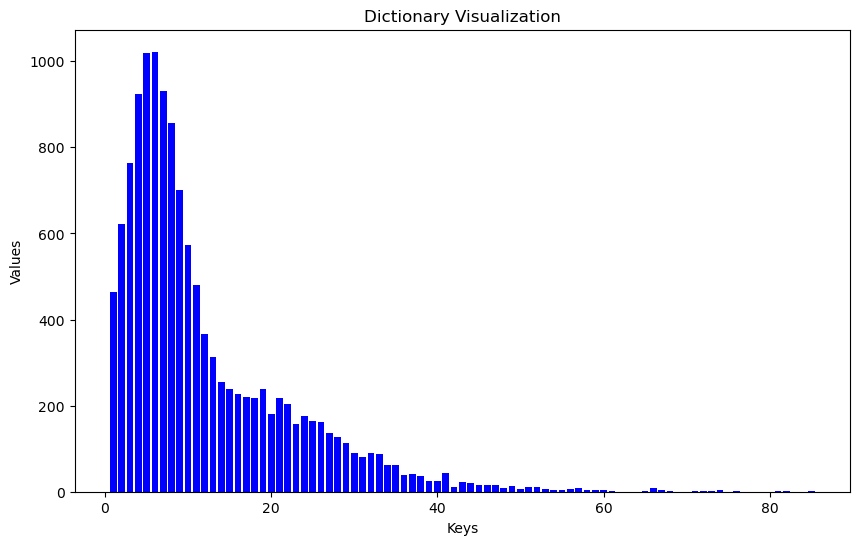

In [13]:
import matplotlib.pyplot as plt

keys = list(d.keys())
values = list(d.values())

plt.figure(figsize=(10, 6))

# Create bar chart
plt.bar(keys, values, color='blue')

# Add title and labels
plt.title('Dictionary Visualization')
plt.xlabel('Keys')
plt.ylabel('Values')
plt.show()

In [14]:
example_text = 'I will watch Memento tonight. Do you'
bert_input = tokenizer(example_text,padding='max_length', max_length = 10,
                       truncation=True, return_tensors="pt")


print(bert_input['input_ids'])
print(bert_input['token_type_ids'])
print(bert_input['attention_mask'])
tensor([[  101,   146,  1209,  2824,  2508, 26173,  3568,   102,     0,     0]])
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0]])

tensor([[  101,  1045,  2097,  3422,  2033, 23065,  3892,  1012,  2079,   102]])
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0]])

### NORMALIZING EACH ESSAY SET VALUE BETWEEN 0 AND 1

In [15]:
# Change the range to cover all 8 essay sets
for essay_set in range(1, 9):
    temp = temp_df[temp_df['essay_set'] == essay_set]
    min_value = temp['domain1_score'].min()
    max_value = temp['domain1_score'].max()
    print(min_value, max_value)
    temp_df.loc[temp_df['essay_set'] == essay_set, 'normalized_score'] = (temp['domain1_score'] - min_value) / (max_value - min_value)

# print(temp_df)

2.0 12.0
1.0 6.0
0.0 3.0
0.0 3.0
0.0 4.0
0.0 4.0
2.0 20.0
10.0 20.0


C:\Users\pchhl\AppData\Local\Temp\ipykernel_25820\3294479561.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.loc[temp_df['essay_set'] == essay_set, 'normalized_score'] = (temp['domain1_score'] - min_value) / (max_value - min_value)


In [16]:
for essay_set in range(1, 9):
    temp = temp_df[temp_df['essay_set'] == essay_set]
    min_value = temp['normalized_score'].min()
    max_value = temp['normalized_score'].max()
    print(min_value, max_value)

0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0


In [17]:
temp_df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6,normalized_score
0,1,1,dear local newspaper i think effects computers...,4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6
1,2,1,dear caps1 caps2 i believe that using computer...,5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7
2,3,1,dear caps1 caps2 caps3 more and more people us...,4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5
3,4,1,dear local newspaper caps1 i have found that m...,5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8
4,5,1,dear location1 i know having computers has a p...,4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6


In [18]:
text = "Hello, how are you?"
inputs = tokenizer(text, return_tensors="pt").to(device)
outputs = model(**inputs)


In [273]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


### WORD EMBEDDINGS FROM PENULTIMATE LAYER OF BERT MODEL

In [20]:
class BertSentenceEmbedding(nn.Module):
    def __init__(self, pretrained_model_name='bert-base-uncased'):
        super(BertSentenceEmbedding, self).__init__()  # Call the super class's __init__ first

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.tokenizer = BertTokenizer.from_pretrained(pretrained_model_name)
        self.model = BertModel.from_pretrained(pretrained_model_name, output_hidden_states=True)
        self.model.eval()


    def get_embedding(self, text):
        sentences = sent_tokenize(text)
        sentence_embeddings = []

        for sentence in sentences:
            processed_sentence = pipeline(sentence)
            inputs = self.tokenizer(sentence, return_tensors="pt", truncation=True, padding=True, max_length=512)
            with torch.no_grad():
                outputs = self.model(**inputs.to(self.device))

            # Use the last four layers' hidden states
            hidden_states = outputs.hidden_states[-4:]
            # print("hidden_states :", hidden_states[0].cpu().numpy().shape)


            # Concatenate the hidden states from the last four layers along the second dimension
            concatenated_hidden_states = torch.cat(hidden_states, dim=1)
            # print("concatenated_hidden_states :",concatenated_hidden_states.shape)


            # Compute the mean of all tokens embeddings for this sentence
            sentence_embedding = torch.mean(concatenated_hidden_states, dim=1).squeeze().cpu().numpy()
            # print("sentence_embedding :",sentence_embedding.shape)

            sentence_embeddings.append(sentence_embedding)

        return np.array(sentence_embeddings)

# Assuming you've defined device somewhere above
bert_embedder = BertSentenceEmbedding().to(device)
essay = df['essay'][0]
embeddings = bert_embedder.get_embedding(essay)
print(embeddings.shape)  # It should print (number_of_sentences_in_essay, 768)


(10, 768)


In [ ]:
# class BertSentenceEmbedding(nn.Module):
#     def __init__(self, pretrained_model_name='bert-base-uncased'):
#         super(BertSentenceEmbedding, self).__init__()  # Call the super class's __init__ first

#         self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#         self.tokenizer = BertTokenizer.from_pretrained(pretrained_model_name)
#         self.model = BertModel.from_pretrained(pretrained_model_name, output_hidden_states=True)
#         self.model.eval()

#     def get_embedding(self, text):

#         # Tokenize the essay into sentences
#         sentences = sent_tokenize(text)

#         # List to hold embeddings for each sentence
#         sentence_embeddings = []

#         for sentence in sentences:
#             # I noticed you were using a "pipeline" function that was not defined in the given code
#             processed_sentence = pipeline(sentence)
#             inputs = self.tokenizer(sentence, return_tensors="pt", truncation=True, padding=True, max_length=512)
#             with torch.no_grad():
#                 outputs = self.model(**inputs.to(self.device))

#             # Use the penultimate layer's hidden states
#             hidden_states = outputs.hidden_states[-2]

#             # Compute the mean of all tokens embeddings for this sentence
#             sentence_embedding = torch.mean(hidden_states, dim=1).squeeze().cpu().numpy()
#             sentence_embeddings.append(sentence_embedding)

#         return np.array(sentence_embeddings)  # Return embeddings for all sentences in the essay

# # Assuming you've defined device somewhere above
# bert_embedder = BertSentenceEmbedding().to(device)
# essay = df['essay'][0]
# embeddings = bert_embedder.get_embedding(essay)
# print(embeddings.shape)  # It should print (number_of_sentences_in_essay, 768)


In [ ]:
type(embeddings)

numpy.ndarray

### SEMANTIC MODEL

In [22]:
class SemanticScore(nn.Module):
    def __init__(self):
        super(SemanticScore, self).__init__()

        self.bert_emb_dim = 768
        self.dropout_prob = 0.5
        self.lstm_hidden_size = 1024
        self.lstm_layers_num = 1
        self.fnn_hidden_size = []
        self.bidirectional = False

        self.lstm = nn.LSTM(self.bert_emb_dim,
                            self.lstm_hidden_size,
                            self.lstm_layers_num,
                            bidirectional=self.bidirectional,
                            batch_first=True)
        self.dropout = nn.Dropout(self.dropout_prob)

        in_features = self.lstm_hidden_size * 2 if self.bidirectional else self.lstm_hidden_size
        layers = []
        for hs in self.fnn_hidden_size:
            layers.append(nn.Linear(in_features, hs))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(self.dropout_prob))
            in_features = hs

        layers.append(nn.Linear(in_features, 400))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(self.dropout_prob))
        layers.append(nn.Linear(400, 1))
        layers.append(nn.Sigmoid())
        self.fnn = nn.Sequential(*layers)

    def forward(self, batch_doc_encodes, batch_doc_sent_nums):
        packed_input = pack_padded_sequence(batch_doc_encodes, batch_doc_sent_nums, batch_first=True, enforce_sorted=False)
        packed_output, _ = self.lstm(packed_input)
        output, _ = pad_packed_sequence(packed_output, batch_first=True)
        logits = self.fnn(output[:, -1, :]) # Using the output of the last timestep
        return logits.squeeze(-1)

### PROMPTS CORRESPONDING TO EACH SET FROM 1 TO 8

In [23]:
prompts = [
    """More and more people use computers, but not everyone agrees that this benefits society.
    Those who support advances in technology believe that computers have a positive effect on people.
    They teach hand-eye coordination, give people the ability to learn about faraway places and people, and
    even allow people to talk online with other people. Others have different ideas. Some experts are concerned
    that people are spending too much time on their computers and less time exercising, enjoying nature, and interacting with family and friends.
    Write a letter to your local newspaper in which you state your opinion on the effects computers have on people. Persuade the readers to agree with you.
""" ,

    """Censorship in the Libraries
    All of us can think of a book that we hope none of our children or any other children have taken off the shelf. But if I have the right to remove that book from the shelf --
    that work I abhor -- then you also have exactly the same right and so does everyone else. And then we have no books left on the shelf for any of us." --Katherine Paterson, Author
    Write a persuasive essay to a newspaper reflecting your vies on censorship in libraries. Do you believe that certain materials, such as books, music, movies, magazines, etc.,
    should be removed from the shelves if they are found offensive? Support your position with convincing arguments from your own experience, observations, and/or reading.
""",

      """ROUGH ROAD AHEAD: Do Not Exceed Posted Speed Limit
    FORGET THAT OLD SAYING ABOUT NEVER taking candy from strangers. No, a better piece of advice for the solo cyclist would be, “Never accept travel advice from a collection of old-timers who haven’t left the confines of their porches since Carter was in office.” It’s not that a group of old guys doesn’t know the terrain. With age comes wisdom and all that, but the world is a fluid place. Things change.
    At a reservoir campground outside of Lodi, California, I enjoyed the serenity of an early-summer evening and some lively conversation with these old codgers. What I shouldn’t have done was let them have a peek at my map. Like a foolish youth, the next morning I followed their advice and launched out at first light along a “shortcut” that was to slice away hours from my ride to Yosemite National Park.
    They’d sounded so sure of themselves when pointing out landmarks and spouting off towns I would come to along this breezy jaunt. Things began well enough. I rode into the morning with strong legs and a smile on my face. About forty miles into the pedal, I arrived at the first “town.” This place might have been a thriving little spot at one time—say, before the last world war—but on that morning it fit the traditional definition of a ghost town. I chuckled, checked my water supply, and moved on. The sun was beginning to beat down, but I barely noticed it. The cool pines and rushing rivers of Yosemite had my name written all over them.
    Twenty miles up the road, I came to a fork of sorts. One ramshackle shed, several rusty pumps, and a corral that couldn’t hold in the
    lamest mule greeted me. This sight was troubling. I had been hitting my water bottles pretty regularly, and I was traveling through the high deserts of California in June.
    I got down on my hands and knees, working the handle of the rusted water pump with all my strength. A tarlike substance oozed out, followed by
    brackish water feeling somewhere in the neighborhood of two hundred degrees. I pumped that handle for several minutes, but the water
    wouldn’t cool down. It didn’t matter. When I tried a drop or two, it had the flavor of battery acid.
    The old guys had sworn the next town was only eighteen miles down the road. I could make that! I would conserve my water and go inward for an hour or so—a test of my inner spirit.
    Not two miles into this next section of the ride, I noticed the terrain changing. Flat road was replaced by short, rolling hills.
    After I had crested the first few of these, a large highway sign jumped out at me. It read: ROUGH ROAD AHEAD: DO NOT EXCEED POSTED SPEED LIMIT.
    The speed limit was 55 mph. I was doing a water-depleting 12 mph. Sometimes life can feel so cruel.
    I toiled on. At some point, tumbleweeds crossed my path and a ridiculously large snake—it really did look like a diamondback—blocked the majority of the pavement in front of me.
    I eased past, trying to keep my balance in my dehydrated state.
    The water bottles contained only a few tantalizing sips. Wide rings of dried sweat circled my shirt, and the growing realization that I could drop from heatstroke on a gorgeous day in June simply because I listened to some gentlemen who hadn’t been off their porch in decades, caused me to laugh.
    It was a sad, hopeless laugh, mind you, but at least I still had the energy to feel sorry for myself. There was no one in sight, not a building, car, or structure of any kind. I began breaking the ride down into distances I could see on the horizon, telling myself that if I could make it that far, I’d be fi ne.
    Over one long, crippling hill, a building came into view. I wiped the sweat from my eyes to make sure it wasn’t a mirage, and tried not to get too excited. With what I believed was my last burst of energy, I maneuvered down the hill.
    In an ironic twist that should please all sadists reading this, the building—abandoned years earlier, by the looks of it—had been a Welch’s Grape Juice factory and bottling plant. A sandblasted picture of a young boy pouring a refreshing glass of juice into his mouth could still be seen.
    I hung my head.
    That smoky blues tune “Summertime” rattled around in the dry honeycombs of my deteriorating brain.
    I got back on the bike, but not before I gathered up a few pebbles and stuck them in my mouth. I’d read once that sucking on stones helps take your mind off thirst by allowing what spit you have left to circulate. With any luck I’d hit a bump and lodge one in my throat.
    It didn’t really matter. I was going to die and the birds would pick me clean, leaving only some expensive outdoor gear and a diary with the last entry in praise of old men, their wisdom, and their keen sense of direction. I made a mental note to change that paragraph if it looked like I was going to lose consciousness for the last time.
    Somehow, I climbed away from the abandoned factory of juices and dreams, slowly gaining elevation while losing hope. Then, as easily as rounding a bend, my troubles, thirst, and fear were all behind me.
    GARY AND WILBER’S FISH CAMP—IF YOU WANT BAIT FOR THE BIG ONES, WE’RE YOUR BEST BET!
    “And the only bet,” I remember thinking.
    As I stumbled into a rather modern bathroom and drank deeply from the sink, I had an overwhelming urge to seek out Gary and Wilber, kiss them, and buy some bait—any bait, even though I didn’t own a rod or reel.
    An old guy sitting in a chair under some shade nodded in my direction. Cool water dripped from my head as I slumped against the wall beside him.
    “Where you headed in such a hurry?”
    “Yosemite,” I whispered.
    “Know the best way to get there?”
    I watched him from the corner of my eye for a long moment. He was even older than the group I’d listened to in Lodi.
    “Yes, sir! I own a very good map.”
    And I promised myself right then that I’d always stick to it in the future.
    Write a response that explains how the features of the setting affect the cyclist. In your response, include examples from the essay that support your conclusion.
    """,

    """Read the last paragraph of the story.
    "When they come back, Saeng vowed silently to herself, in the spring, when the snows melt and the geese return and this hibiscus is budding, then I will take that test again."
    Write a response that explains why the author concludes the story with this paragraph. In your response, include details and examples from the story that support your ideas.
    """,

    """My parents, originally from Cuba, arrived in the United States in 1956. After living for a year in a furnished one-room apartment, twenty-one-year-old Rawedia Maria and twenty-seven-year-old Narciso Rodriguez, Sr., could afford to move into a modest, three-room apartment I would soon call home.
    In 1961, I was born into this simple house, situated in a two-family, blond-brick building in the Ironbound section of Newark, New Jersey. Within its walls, my young parents created our traditional Cuban home, the very heart of which was the kitchen. My parents both shared cooking duties and unwittingly passed on to me their rich culinary skills and a love of cooking that is still with me today (and for which I am eternally grateful). Passionate Cuban music (which I adore to this day) filled the air, mixing with the aromas of the kitchen. Here, the innocence of childhood, the congregation of family and friends, and endless celebrations that encompassed both, formed the backdrop to life in our warm home.
    Growing up in this environment instilled in me a great sense that “family” had nothing to do with being a blood relative. Quite the contrary, our neighborhood was made up of mostly Spanish, Cuban, and Italian immigrants at a time when overt racism was the norm and segregation prevailed in the United States. In our neighborhood, despite customs elsewhere, all of these cultures came together in great solidarity and friendship. It was a close-knit community of honest, hardworking immigrants who extended a hand to people who, while not necessarily their own kind, were clearly in need.
    Our landlord and his daughter, Alegria (my babysitter and first friend), lived above us, and Alegria graced our kitchen table for meals more often than not. Also at the table were Sergio and Edelmira, my surrogate grandparents who lived in the basement apartment. (I would not know my “real” grandparents, Narciso the Elder and Consuelo, until 1970 when they were allowed to leave Cuba.) My aunts Bertha and Juanita and my cousins Arnold, Maria, and Rosemary also all lived nearby and regularly joined us at our table. Countless extended family members came and went — and there was often someone staying with us temporarily until they were able to get back on their feet. My parents always kept their arms and their door open to the many people we considered family, knowing that they would do the same for us.
    My mother and father had come to this country with such courage, without any knowledge of the language or the culture. They came selflessly, as many immigrants do, to give their children a better life, even though it meant leaving behind their families, friends, and careers in the country they loved. They struggled both personally and financially, braving the harsh northern winters while yearning for their native tropics and facing cultural hardships. The barriers to work were strong and high, and my parents both had to accept that they might not be able to find the kind of jobs they deserved. In Cuba, Narciso, Sr., had worked in a laboratory and Rawedia Maria had studied chemical engineering. In the United States, they had to start their lives over entirely, taking whatever work they could find. The faith that this struggle would lead them and their children to better times drove them to endure these hard times.
    I will always be grateful to my parents for their love and sacrifice. I’ve often told them that what they did was a much more courageous thing than I could have ever done. I’ve often told them of my admiration for their strength and perseverance, and I’ve thanked them repeatedly. But, in reality, there is no way to express my gratitude for the spirit of generosity impressed upon me at such an early age and the demonstration of how important family and friends are. These are two lessons that my parents did not just tell me. They showed me with their lives, and these teachings have been the basis of my life.
    It was in this simple house that my parents welcomed other refugees to celebrate their arrival to this country and where I celebrated my first birthdays. It was in the warmth of the kitchen in this humble house where a Cuban feast (albeit a frugal Cuban feast) always filled the air with not just scent and music but life and love. It was here where I learned the real definition of “family.” And for this, I will never forget that house or its gracious neighborhood or the many things I learned there about how to love. I will never forget how my parents turned this simple house into a home.
    Describe the mood created by the author in the memoir. Support your answer with relevant and specific information from the memoir
""",

    """Based on the excerpt, describe the obstacles the builders of the Empire State Building faced in attempting to allow dirigibles to dock there.
    Support your answer with relevant and specific information from the excerpt.""",

    """Write about patience. Being patient means that you are understanding and tolerant. A patient person experience difficulties without complaining.
      Do only one of the following: write a story about a time when you were patient OR write a story about a time when someone you know was patient OR write a story in your own way about patience.
""",

    """We all understand the benefits of laughter. For example, someone once said, “Laughter is the shortest distance between two people.”
    Many other people believe that laughter is an important part of any relationship. Tell a true story in which laughter was one element or part."""
]

In [24]:
temp_df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6,normalized_score
0,1,1,dear local newspaper i think effects computers...,4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6
1,2,1,dear caps1 caps2 i believe that using computer...,5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7
2,3,1,dear caps1 caps2 caps3 more and more people us...,4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5
3,4,1,dear local newspaper caps1 i have found that m...,5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8
4,5,1,dear location1 i know having computers has a p...,4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6


### ADD PROMPTS TO DATAFRAME FOR EACH SET

In [25]:
prompt = list(prompts[sets - 1] for sets in temp_df['essay_set'])
custom_df = temp_df[['essay_id', 'essay_set', 'essay', 'normalized_score']]
custom_df['prompt'] = prompt
custom_df.reset_index(drop=True, inplace=True)

C:\Users\pchhl\AppData\Local\Temp\ipykernel_25820\3854521186.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  custom_df['prompt'] = prompt


In [26]:
# custom_df = read_asap_dataset(temp_df, prompts)

print(len(custom_df))

custom_df.head()

11981


,essay_id,essay_set,essay,normalized_score,prompt
0,1,1,dear local newspaper i think effects computers...,0.6,"More and more people use computers, but not ev..."
1,2,1,dear caps1 caps2 i believe that using computer...,0.7,"More and more people use computers, but not ev..."
2,3,1,dear caps1 caps2 caps3 more and more people us...,0.5,"More and more people use computers, but not ev..."
3,4,1,dear local newspaper caps1 i have found that m...,0.8,"More and more people use computers, but not ev..."
4,5,1,dear location1 i know having computers has a p...,0.6,"More and more people use computers, but not ev..."


In [27]:
np.unique(np.array(custom_df['essay_set']))

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

### PREPROCESSING ESSAY i.e. ESSAYS ARE CONVERTED INTO WORD EMBEDDINGS BEFORE PASSING IT TO SOME MODEL

In [28]:
def preprocess_essay(essays):
    # print(essays)
    essay_embeddings = [torch.tensor(bert_embedder.get_embedding(essay)) for essay in essays]

    # Find the maximum number of sentences in all essays
    max_sentences = max(embed.shape[0] for embed in essay_embeddings)

    # Calculate the number of dimensions (features) in the embeddings
    num_features = essay_embeddings[0].shape[1]  # Assumes all embeddings have the same number of features

    # Pad the sentence embeddings to have the same number of sentences
    padded_embeddings = []
    for embed in essay_embeddings:
        padding = max_sentences - embed.shape[0]
        padded_embed = torch.cat((embed, torch.zeros(padding, num_features)), dim=0)
        padded_embeddings.append(padded_embed)

    embeddings_batch = torch.stack(padded_embeddings)  # batch * sentences * num_features
    lengths_batch = torch.tensor([max_sentences] * len(essays), dtype=torch.int64)

    return embeddings_batch, lengths_batch




### DATALOADER WITH INITIAL DATASET

In [29]:
class CustomDataset(Dataset):
    def __init__(self, essay_id, essay_set, essay, prompt, normalized_score):
        self.essay_id = essay_id
        self.essay_set = essay_set
        self.essay = essay
        self.prompt = prompt
        self.normalized_score = normalized_score

    def __len__(self):
        return len(self.essay_id)

    def __getitem__(self, idx):
        essay_id, essay_set, essay, prompt, normalized_score = self.essay_id.iloc[idx], self.essay_set.iloc[idx], self.essay.iloc[idx], self.prompt.iloc[idx], self.normalized_score.iloc[idx]
        return essay_id, essay_set, essay, prompt, normalized_score

# # Create a DataLoader
custom_dataset = CustomDataset(custom_df['essay_id'], custom_df['essay_set'], custom_df['essay'], custom_df['prompt'], custom_df['normalized_score'])
dataloader = DataLoader(custom_dataset, batch_size=32, shuffle=True)



In [ ]:
for essay_id, essay_set, essays, normalized_score, prompt in dataloader:
    for essay in essays:
        print(essay)
    break

the mood created by the author in the memoir. growing up in this environment instilled in me a great sense that family had nothing the memoir life was hard. quite the contrary our neighborhood was made up of mostly spanish cuban and italian immigrants at a time when overt recism. in their neighborhood despite customs elsewhere all of these cultures came together in great solidary and friendship. over all these was hard for the author memoir
the mood that the author created in the memmoir was very thankful. he was very thankful for his parents coming to the caps1 from cuba. the opertunties it gave him a better education and to be successful. in the memmoir he was thankfull for al the people that helped him in this new country and supported him and his family as he did the same to the people that supoorted him. thankfull was the mood that narciso rodriguez showd in this memoir.
builders trying to allow dirigibles to dock ontop of the empire state building faced problems. the dirigibles w

In [ ]:
custom_df.head()

,essay_id,essay_set,essay,normalized_score,prompt
0,1,1,dear local newspaper i think effects computers...,0.6,"More and more people use computers, but not ev..."
1,2,1,dear caps1 caps2 i believe that using computer...,0.7,"More and more people use computers, but not ev..."
2,3,1,dear caps1 caps2 caps3 more and more people us...,0.5,"More and more people use computers, but not ev..."
3,4,1,dear local newspaper caps1 i have found that m...,0.8,"More and more people use computers, but not ev..."
4,5,1,dear location1 i know having computers has a p...,0.6,"More and more people use computers, but not ev..."


## SEMANTIC MODEL TRAINING

In [30]:
model_semantic=SemanticScore().to(device)
adam_optimizer=torch.optim.Adam(model_semantic.parameters(), lr=0.001)
criteria=torch.nn.MSELoss()

In [ ]:
from tqdm import tqdm
optimizer=adam_optimizer
train_loss = []

for epoch in tqdm(range(3)):
    out_loss = 0

    num_samples_processed_1=0

    for batch_idx, (essay_id, essay_set, essays, prompt, normalized_score) in (enumerate(dataloader)):

        # if torch.cuda.is_available():
        #     essay_id, essay_set, essays, prompt, normalized_score = essay_id.cuda(), essay_set.cuda(), essays.cuda(), prompt.cuda(), normalized_score.cuda()
        # normalized_score = normalized_score.to(device)

        # num_samples_processed_1 += essay_id.size(0)

        # if num_samples_processed_1 >= 5000:
        #   break

        optimizer.zero_grad()

        essays, lengths_batch = preprocess_essay(essays)
        essays = essays.to(device)
        normalized_score = normalized_score.to(device)
        # print(lengths_batch.dtype)
        # print(essays.dtype)
        out = model_semantic(essays, lengths_batch)


        out = out.float()
        normalized_score = normalized_score.float()

        loss = criteria(out, normalized_score)
        loss.backward()
        optimizer.step()

        out_loss += loss.item()

    train_loss.append(out_loss/len(dataloader))

100%|██████████| 3/3 [1:20:01<00:00, 1600.55s/it]


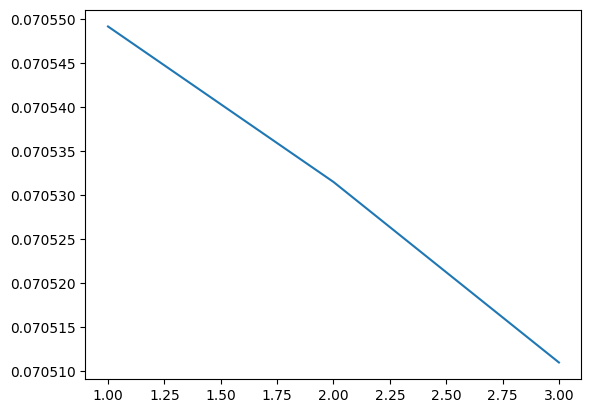

In [ ]:
epochs=[1,2,3]

plt.plot(epochs,train_loss)

In [ ]:
# torch.save(model_semantic.state_dict(),  "/content/drive/MyDrive/ire_v2t/semantic_model.pth")


In [31]:
# model_semantic.load_state_dict(torch.load("semantic_model_final.pth"),map_location=torch.device('cpu'))

# semantic_model_ = torch.load('semantic_model_final.pth', map_location=torch.device('cpu'))

model_semantic.load_state_dict(torch.load(r"semantic_model_final.pth",map_location=torch.device('cpu')))


# if 'model' in semantic_model_:
#     semantic_model_['model'] = semantic_model_['model'].to(torch.device('cpu'))
#     semantic_model_['model'].eval()

# semantic_model_.eval()

<All keys matched successfully>

### CREATING A NEW DATASET BY PERMUTING ESSAYS AND ASSIGNING ZERO GOLD SCORE TO PERMUTED ESSAYS

In [32]:
custom_df.head()

,essay_id,essay_set,essay,normalized_score,prompt
0,1,1,dear local newspaper i think effects computers...,0.6,"More and more people use computers, but not ev..."
1,2,1,dear caps1 caps2 i believe that using computer...,0.7,"More and more people use computers, but not ev..."
2,3,1,dear caps1 caps2 caps3 more and more people us...,0.5,"More and more people use computers, but not ev..."
3,4,1,dear local newspaper caps1 i have found that m...,0.8,"More and more people use computers, but not ev..."
4,5,1,dear location1 i know having computers has a p...,0.6,"More and more people use computers, but not ev..."


In [33]:
def permute_essay(essay):
    sentences = essay.split('. ')  # Splitting the essay into sentences using ". "
    random.shuffle(sentences)
    return '. '.join(sentences)

# Creating a new DataFrame for permuted essays
permuted_df = custom_df.copy()
permuted_df['essay'] = permuted_df['essay'].apply(permute_essay)
permuted_df['normalized_score'] = 0
permuted_df['essay_id'] = range(100000, 100000 + len(custom_df))

# Concatenating the original and permuted DataFrames
combined_df = pd.concat([custom_df[:1000], permuted_df[:1000]]).reset_index(drop=True)


In [34]:
combined_df.tail()

,essay_id,essay_set,essay,normalized_score,prompt
1995,100995,1,it caps1 is preinstalled into many organizatio...,0.0,"More and more people use computers, but not ev..."
1996,100996,1,there adveances in communication through compu...,0.0,"More and more people use computers, but not ev..."
1997,100997,1,computers can predict natural disasters and wi...,0.0,"More and more people use computers, but not ev..."
1998,100998,1,that is why you should have computers all the ...,0.0,"More and more people use computers, but not ev..."
1999,100999,1,they help us instanly when we have to find som...,0.0,"More and more people use computers, but not ev..."


In [35]:
combined_df = combined_df.sample(frac=1, random_state=42)

#### CREATING A DATALOADER FROM NEW DATASET

In [36]:

combined_dataset = CustomDataset(combined_df['essay_id'], combined_df['essay_set'], combined_df['essay'], combined_df['prompt'], combined_df['normalized_score'])

combined_dataloader = DataLoader(combined_dataset, batch_size=32, shuffle=True)

## COHERENCE MODEL TRAINING

In [ ]:
class CoherenceScore(nn.Module):
    def __init__(self):
        super(CoherenceScore, self).__init__()

        self.bert_emb_dim = 768
        self.dropout_prob = 0.5
        self.lstm_hidden_size = 1024
        self.lstm_layers_num = 2
        self.fnn_hidden_size = []
        self.bidirectional = False

        self.lstm = nn.LSTM(self.bert_emb_dim,
                            self.lstm_hidden_size,
                            self.lstm_layers_num,
                            bidirectional=self.bidirectional,
                            batch_first=True)
        self.dropout = nn.Dropout(self.dropout_prob)

        in_features = self.lstm_hidden_size * 2 if self.bidirectional else self.lstm_hidden_size
        layers = []
        # for hs in self.fnn_hidden_size:
        #     layers.append(nn.Linear(in_features, hs))
        #     layers.append(nn.ReLU())
        #     layers.append(nn.Dropout(self.dropout_prob))
        #     in_features = hs

        layers.append(nn.Linear(in_features, 400))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(self.dropout_prob))
        layers.append(nn.Linear(400, 1))
        layers.append(nn.Sigmoid())
        self.fnn = nn.Sequential(*layers)

    def forward(self, batch_doc_encodes, batch_doc_sent_nums):
        packed_input = pack_padded_sequence(batch_doc_encodes, batch_doc_sent_nums, batch_first=True, enforce_sorted=False)
        # print(packed_input.data.shape,"packed_input")
        packed_output, _ = self.lstm(packed_input)
        # print(packed_output.data.shape,"packed_out")
        output, _ = pad_packed_sequence(packed_output, batch_first=True)
        logits = self.fnn(output[:, -1, :]) # Using the output of the last timestep
        return logits.squeeze(-1)





In [37]:
model_coher=CoherenceScore().to(device)
adam_optimizer_coher=torch.optim.Adam(model_coher.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)
criteria=torch.nn.MSELoss()

In [ ]:
from tqdm import tqdm
optimizer=adam_optimizer_coher
batch_size = 32
train_loss_coher = []

for epoch in tqdm(range(5)):
    out_loss = 0
    # num_samples_processed_2=0

    for batch_idx, (essay_id, essay_set, essays, prompt, normalized_score) in (enumerate(combined_dataloader)):

        # if torch.cuda.is_available():
        #     essay_id, essay_set, essays, prompt, normalized_score = essay_id.cuda(), essay_set.cuda(), essays.cuda(), prompt.cuda(), normalized_score.cuda()
        # normalized_score = normalized_score.to(device)


        num_samples_processed_2 += essay_id.size(0)

        if num_samples_processed_2 >= 10000:
          break

        optimizer.zero_grad()

        essays, lengths_batch = preprocess_essay(essays)
        essays = essays.to(device)
        normalized_score = normalized_score.to(device)
        # print(lengths_batch.dtype)
        # print(essays.dtype)
        out = model_coher(essays, lengths_batch)


        out = out.float()
        normalized_score = normalized_score.float()

        loss = criteria(out, normalized_score)
        loss.backward()
        optimizer.step()

        out_loss += loss.item()
        # print(f"Epoch [{epoch + 1}/5], Batch [{batch_idx + 1}/{len(combined_dataloader)}], Batch Loss: {loss.item():.4f}")



    train_loss_coher.append(out_loss/len(combined_dataloader))

100%|██████████| 5/5 [44:45<00:00, 537.15s/it]


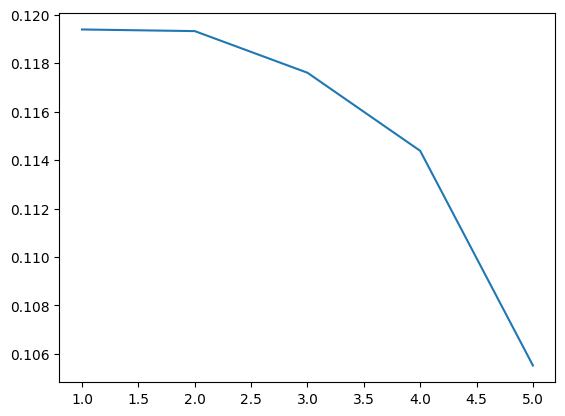

In [ ]:
epochs=[1,2,3,4,5]
plt.plot(epochs,train_loss_coher)

In [ ]:
# torch.save(model_coher.state_dict(),  "/content/drive/MyDrive/ire_v2t/coherence_model.pth")

In [38]:
# coher_model_ = torch.load('coherence_model_final.pth', map_location=torch.device('cpu'))

model_coher.load_state_dict(torch.load(r"coherence_model_final.pth",map_location=torch.device('cpu')))

# if 'model' in coher_model_:
#     coher_model_['model'] = coher_model_['model'].to(torch.device('cpu'))
#     coher_model_['model'].eval()

<All keys matched successfully>

In [ ]:
print(train_loss)
print(train_loss_coher)

[0.005422969174649671, 0.005878951654176368, 0.005782355919967745, 0.005795177073530027, 0.0054640802909161285]
[0.11938978388668998, 0.11932287980166692, 0.11760396238357301, 0.11438029886238159, 0.10552108003979638]


### CREATING DATASET FOR PROMPT RELEVANT SCORE

In [39]:
data = []

# For each essay, combine with a random set of prompts
for index, row in custom_df.iterrows():

    num_prompts = np.random.randint(1, 4)

    sample_prompts = custom_df[custom_df['essay_set'] != row['essay_set']].sample(num_prompts)

    for _, prompt_row in sample_prompts.iterrows():
        new_row = row.copy()
        new_row['essay'] = prompt_row['prompt'] + "." + row['essay']
        new_row['normalized_score'] = 0
        data.append(new_row)

result_df = pd.DataFrame(data).reset_index(drop=True)


In [40]:
prompt_df=custom_df.copy();
prompt_df['essay'] = prompt_df['prompt'] + " " + prompt_df['essay']

final_prompt_df = pd.concat([prompt_df[:1000], result_df[:1000]], ignore_index=True)

In [41]:
prompt_df=custom_df.copy();
prompt_df['essay'] = prompt_df['prompt'] + " " + prompt_df['essay']

final_prompt_df = pd.concat([prompt_df[:1000], result_df[:1000]], ignore_index=True)
final_prompt_df = final_prompt_df.sample(frac=1, random_state=42)

In [42]:
len(final_prompt_df[final_prompt_df['normalized_score'] == 0.0])

1006

In [53]:
final_prompt_df.tail()

,essay_id,essay_set,essay,normalized_score,prompt
1130,66,1,"Read the last paragraph of the story.\n ""Wh...",0.0,"More and more people use computers, but not ev..."
1294,147,1,Censorship in the Libraries\n All of us can...,0.0,"More and more people use computers, but not ev..."
860,863,1,"More and more people use computers, but not ev...",0.8,"More and more people use computers, but not ev..."
1459,232,1,Censorship in the Libraries\n All of us can...,0.0,"More and more people use computers, but not ev..."
1126,64,1,Censorship in the Libraries\n All of us can...,0.0,"More and more people use computers, but not ev..."


#### CREATING A DATALOADER FOR PROMPT RELEVANCE MODEL

In [43]:
prompt_dataset = CustomDataset(final_prompt_df['essay_id'], final_prompt_df['essay_set'], final_prompt_df['essay'], final_prompt_df['prompt'], final_prompt_df['normalized_score'])
prompt_dataloader = DataLoader(prompt_dataset, batch_size=64, shuffle=True)

## PROMPT RELEVANCE MODEL TRAINING

In [44]:
class PromptEmbedding(nn.Module):
    def __init__(self, pretrained_model_name='bert-base-uncased'):
        super(PromptEmbedding, self).__init__()  # Call the super class's __init_ first

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.tokenizer = BertTokenizer.from_pretrained(pretrained_model_name)
        self.model = BertModel.from_pretrained(pretrained_model_name, output_hidden_states=True)
        self.model.eval()


    def get_embedding(self, prompt, essay):
        essay = sent_tokenize(essay)
        sentence_embeddings = []

        for sentence in essay:
            processed_sentence = pipeline(sentence)
            inputs = self.tokenizer(prompt, sentence, return_tensors="pt", truncation=True, padding=True, max_length=512)
            with torch.no_grad():
                outputs = self.model(**inputs.to(self.device))

            hidden_states = outputs.hidden_states[-4:]
            # print("hidden_states :",hidden_states[0].shape)

            # Concatenate the hidden states along the third dimension
            concatenated_hidden_states = torch.cat(hidden_states, dim=1)
            # print("concatenated_hidden_states :",concatenated_hidden_states.shape)

            # Compute the mean of all tokens embeddings for this sentence along the second dimension
            sentence_embedding = torch.mean(concatenated_hidden_states, dim=1).squeeze().cpu().numpy()
            # print("sentence_embedding :",sentence_embedding.shape)

            sentence_embeddings.append(sentence_embedding)

        return np.array(sentence_embeddings)


In [45]:
prompt_embedder = PromptEmbedding().to(device)


In [46]:
def prompt_essay(prompts, essays):
    # print(essays)
    essay_embeddings = [torch.tensor(prompt_embedder.get_embedding(prompt, essay)) for prompt, essay in zip(prompts, essays)]

    # Find the maximum number of sentences in all essays
    max_sentences = max(embed.shape[0] for embed in essay_embeddings)

    # Calculate the number of dimensions (features) in the embeddings
    num_features = essay_embeddings[0].shape[1]  # Assumes all embeddings have the same number of features

    # Pad the sentence embeddings to have the same number of sentences
    padded_embeddings = []
    for embed in essay_embeddings:
        padding = max_sentences - embed.shape[0]
        padded_embed = torch.cat((embed, torch.zeros(padding, num_features)), dim=0)
        padded_embeddings.append(padded_embed)

    embeddings_batch = torch.stack(padded_embeddings)  # batch * sentences * num_features
    lengths_batch = torch.tensor([max_sentences] * len(essays), dtype=torch.int64)

    return embeddings_batch, lengths_batch


In [47]:
class PromptScore(nn.Module):
    def __init__(self):
        super(PromptScore, self).__init__()
        self.bert_emb_dim = 768
        self.dropout_prob = 0.5
        self.lstm_hidden_size = 1024
        self.lstm_layers_num = 1
        self.fnn_hidden_size = []
        self.bidirectional = False

        self.lstm = nn.LSTM(self.bert_emb_dim,
                            self.lstm_hidden_size,
                            self.lstm_layers_num,
                            bidirectional=self.bidirectional,
                            batch_first=True)
        self.dropout = nn.Dropout(self.dropout_prob)

        in_features = self.lstm_hidden_size * 2 if self.bidirectional else self.lstm_hidden_size
        layers = []
        for hs in self.fnn_hidden_size:
            layers.append(nn.Linear(in_features, hs))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(self.dropout_prob))
            in_features = hs

        layers.append(nn.Linear(in_features, 400))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(self.dropout_prob))
        layers.append(nn.Linear(400, 1))
        layers.append(nn.Sigmoid())
        self.fnn = nn.Sequential(*layers)

    def forward(self, batch_doc_encodes, batch_doc_sent_nums):
        packed_input = pack_padded_sequence(batch_doc_encodes, batch_doc_sent_nums, batch_first=True, enforce_sorted=False)
        packed_output, _ = self.lstm(packed_input)
        output, _ = pad_packed_sequence(packed_output, batch_first=True)
        logits = self.fnn(output[:, -1, :]) # Using the output of the last timestep
        return logits.squeeze(-1)


In [48]:
model_prompt=PromptScore().to(device)
adam_optimizer_prompt=torch.optim.Adam(model_prompt.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)
criteria=torch.nn.MSELoss()

In [ ]:
optimizer=adam_optimizer_prompt
batch_size = 32
train_loss_ = []
final_loss=[]
epochs = 3
import tqdm as tqdm_module  # Change the name to avoid conflict

for epoch in tqdm_module.tqdm(range(epochs)):
    out_loss = 0
    batch_loss=[]
    num_samples_processed=0

    for essay_id, essay_set, essays, prompt, normalized_score in prompt_dataloader:

        num_samples_processed += essay_id.size(0)

        if num_samples_processed >= 12000:
          break
        optimizer.zero_grad()

        essays, lengths_batch = prompt_essay(prompt, essays)
        essays = essays.to(device)
        normalized_score = normalized_score.to(device)
        # print(essays.is_cuda,lengths_batch.is_cuda)

        out = model_prompt(essays, lengths_batch)

        out = out.float()
        normalized_score = normalized_score.float()

        loss = criteria(out, normalized_score)
        loss.backward()
        optimizer.step()

        out_loss += loss.item()
        # print(f"Epoch [{epoch + 1}/5], Batch [{batch_idx + 1}/{len(prompt_dataloader)}], Batch Loss: {loss.item():.4f}")


    # final_loss.append(batch_loss)
    train_loss_.append(out_loss/len(prompt_dataloader))

100%|██████████| 3/3 [57:59<00:00, 1159.73s/it]


[0.11201139172864338, 0.10900232385075281, 0.10886628015173806]


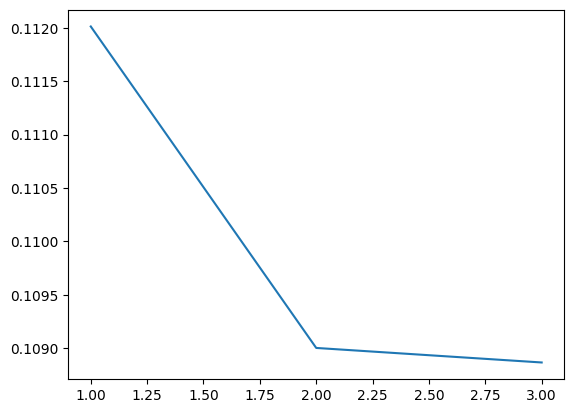

In [ ]:
epochs=[1,2,3]
print(train_loss_)
plt.plot(epochs,train_loss_)

In [ ]:
# torch.save(model_prompt.state_dict(),  "/content/drive/MyDrive/ire_v2t/prompt_model1.pth")


In [49]:
# model_prompt.load_state_dict(torch.load("/content/drive/MyDrive/ire_v2t/prompt_model_final.pth"))
# prompt_model_ = torch.load('prompt_model_final.pth', map_location=torch.device('cpu'))
model_prompt.load_state_dict(torch.load(r"prompt_model_final.pth",map_location=torch.device('cpu')))


<All keys matched successfully>

## HANDCRAFTED FEATURES (WORD COUNT,CHARACTER COUNT,MEAN LENGTH ,VARIANCE SCORE,GRAMMATICAL SCORE)

---



In [50]:
text = "Your the best but their are allso. good abvfgc!"
text = ['dear local newspaper i think effects computers have on people are great learning skillsaffects because they give us time to chat with friendsnew people helps us learn about the globeastronomy and keeps us out of troble thing about dont you think so how would you feel if your teenager is always on the phone with friends do you ever time to chat with your friends or buisness partner about things. well now theres a new way to chat the computer theirs plenty of sites on the internet to do so organization1 organization2 caps1 facebook myspace ect. just think now while your setting up meeting with your boss on the computer your teenager is having fun on the phone not rushing to get off cause you want to use it. how did you learn about other countrysstates outside of yours well i have by computerinternet its a new way to learn about what going on in our time you might think your child spends a lot of time on the computer but ask them so question about the economy sea floor spreading or even about the date1s youll be surprise at how much heshe knows. believe it or not the computer is much interesting then in class all day reading out of books. if your child is home on your computer or at a local library its better than being out with friends being fresh or being perpressured to doing something they know isnt right. you might not know where your child is caps2 forbidde in a hospital bed because of a driveby. rather than your child on the computer learning chatting or just playing games safe and sound in your home or community place. now i hope you have reached a point to understand and agree with me because computers can have great effects on you or child because it gives us time to chat with friendsnew people helps us learn about the globe and believe or not keeps us out of troble. thank you for listening.']
text = text[0]
def get_grammatical_score(text, tool=tool):
    size = len(text.split())
    num = len(tool.check(text))
    # print(size, num)
    return (size - num) / size

def get_word_count(text):
    return len(text.split())

def get_char_count(text):
    return len(text)

def get_mean_score(text):
    words = text.split()
    word_lengths = [len(word) for word in words]
    mean_word_length = sum(word_lengths) / len(word_lengths)
    return mean_word_length

def get_variance_score(text):
    words = text.split()
    word_lengths = [len(word) for word in words]
    mean_word_length = sum(word_lengths) / len(word_lengths)
    variance_word_length = sum((length - mean_word_length) ** 2 for length in word_lengths) / len(word_lengths)
    return variance_word_length

print(get_mean_score(text))
print(get_variance_score(text))
print(get_grammatical_score(text))
print(get_word_count(text) )
print(get_char_count(text))

4.43026706231454
5.924662539953674
0.8783382789317508
337
1829


In [272]:
main_data = pd.DataFrame()
from tqdm import tqdm
total_rows_123=0

for essay_id, essay_set, essays, prompt, normalized_score in tqdm(dataloader):
    # num_samples_processed += essay_id.size(0)

    total_rows_123 += essay_id.size(0)

    if total_rows_123 >= 5000:
          break

    means, variances, grammaticals, word_counts, char_counts = [], [], [], [], []
    for i in range(essay_id.size(0)):
        means.append(get_mean_score(essays[i]))
        variances.append(get_variance_score(essays[i]))
        grammaticals.append(get_grammatical_score(essays[i]))
        word_counts.append(get_word_count(essays[i]))
        char_counts.append(get_char_count(essays[i]))


    val = []
    for i in range(essay_id.size(0)):
        # print(prompt[i])
        # print(essays[i])
        val.append(prompt[i]+"."+essays[i])

    # val = prompt+"."+essays
    val, lengths_batch = preprocess_essay(val)
    val = val.to(device)
    essays, lengths_batch = preprocess_essay(essays)
    essays = essays.to(device)
    out_semantic = model_semantic(essays, lengths_batch)
    out_coher = model_coher(essays, lengths_batch)
    # normalized_score = normalized_score.to(device)

    out_prompt = model_prompt(val, lengths_batch)

    out_semantic = out_semantic.cpu().detach().numpy()
    out_coher = out_coher.cpu().detach().numpy()
    out_prompt = out_prompt.cpu().detach().numpy()
    normalized_score = normalized_score.cpu().detach().numpy()

    # print(normalized_score_np.is_cuda, word_counts.is_cuda)
    temp_df = pd.DataFrame({
        'means': means,
        'variances': variances,
        'grammaticals': grammaticals,
        'word_counts': word_counts,
        'char_counts': char_counts,
        'out_semantic': out_semantic,
        'out_coher': out_coher,
        'out_prompt': out_prompt,
        'normalized_score': normalized_score
      })

    main_data = pd.concat([main_data, temp_df], ignore_index=True)

    # break
    # print(type(out_semantic), out_semantic.shape)

In [ ]:
print(len(main_data))
main_data.head()

448


,means,variances,grammaticals,word_counts,char_counts,out_semantic,out_coher,out_prompt,normalized_score
0,4.251572,3.710296,0.886792,159,834,0.503148,0.250939,0.001317,1.0
1,4.262391,4.415116,0.857143,343,1804,0.503094,0.496958,0.011970,0.6
2,4.889831,7.064134,0.889831,118,694,0.503148,0.497052,0.368822,0.5
3,4.238462,3.689290,0.915385,130,680,0.503148,0.250860,0.368800,0.0
4,4.277228,3.804333,0.900990,101,532,0.503148,0.497037,0.000722,0.5


In [ ]:

from sklearn.model_selection import train_test_split

X = main_data[['means', 'variances', 'grammaticals', 'word_counts', 'char_counts', 'out_semantic', 'out_coher', 'out_prompt']]
y = main_data['normalized_score']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
!pip install xgboost -q

### XG BOOST MODEL (SECOND STAGE)

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

param = {
    'max_depth': 3,
    'eta': 0.01,
    'objective': 'reg:squarederror'
}
num_round = 100

bst = xgb.train(param, dtrain, num_round, [(dtrain, 'train'), (dvalid, 'valid')])


[0]	train-rmse:0.25284	valid-rmse:0.24645
[1]	train-rmse:0.25193	valid-rmse:0.24547
[2]	train-rmse:0.25103	valid-rmse:0.24461
[3]	train-rmse:0.25014	valid-rmse:0.24376
[4]	train-rmse:0.24926	valid-rmse:0.24278
[5]	train-rmse:0.24840	valid-rmse:0.24196
[6]	train-rmse:0.24755	valid-rmse:0.24111
[7]	train-rmse:0.24672	valid-rmse:0.24027
[8]	train-rmse:0.24589	valid-rmse:0.23939
[9]	train-rmse:0.24508	valid-rmse:0.23858
[10]	train-rmse:0.24428	valid-rmse:0.23778
[11]	train-rmse:0.24349	valid-rmse:0.23694
[12]	train-rmse:0.24265	valid-rmse:0.23619
[13]	train-rmse:0.24183	valid-rmse:0.23545
[14]	train-rmse:0.24107	valid-rmse:0.23469
[15]	train-rmse:0.24027	valid-rmse:0.23389
[16]	train-rmse:0.23948	valid-rmse:0.23319
[17]	train-rmse:0.23870	valid-rmse:0.23250
[18]	train-rmse:0.23793	valid-rmse:0.23183
[19]	train-rmse:0.23723	valid-rmse:0.23113
[20]	train-rmse:0.23649	valid-rmse:0.23056
[21]	train-rmse:0.23575	valid-rmse:0.22993
[22]	train-rmse:0.23503	valid-rmse:0.22930
[23]	train-rmse:0.234

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[56]	train-rmse:0.21515	valid-rmse:0.21068
[57]	train-rmse:0.21469	valid-rmse:0.21013
[58]	train-rmse:0.21423	valid-rmse:0.20978
[59]	train-rmse:0.21375	valid-rmse:0.20930
[60]	train-rmse:0.21324	valid-rmse:0.20884
[61]	train-rmse:0.21280	valid-rmse:0.20832
[62]	train-rmse:0.21231	valid-rmse:0.20787
[63]	train-rmse:0.21191	valid-rmse:0.20738
[64]	train-rmse:0.21152	valid-rmse:0.20692
[65]	train-rmse:0.21109	valid-rmse:0.20650
[66]	train-rmse:0.21066	valid-rmse:0.20608
[67]	train-rmse:0.21021	valid-rmse:0.20569
[68]	train-rmse:0.20982	valid-rmse:0.20534
[69]	train-rmse:0.20936	valid-rmse:0.20500
[70]	train-rmse:0.20893	valid-rmse:0.20466
[71]	train-rmse:0.20853	valid-rmse:0.20439
[72]	train-rmse:0.20809	valid-rmse:0.20406
[73]	train-rmse:0.20765	valid-rmse:0.20374
[74]	train-rmse:0.20728	valid-rmse:0.20335
[75]	train-rmse:0.20691	valid-rmse:0.20301
[76]	train-rmse:0.20649	valid-rmse:0.20271
[77]	train-rmse:0.20615	valid-rmse:0.20230
[78]	train-rmse:0.20580	valid-rmse:0.20206
[79]	train-

In [ ]:
(X_valid)

,means,variances,grammaticals,word_counts,char_counts,out_semantic,out_coher,out_prompt
285,4.657343,4.840628,0.902098,143,808,0.503148,0.250880,0.003049
296,3.879032,4.719238,0.862903,248,1209,0.503147,0.251251,0.350609
117,4.572917,6.036350,0.927083,96,534,0.503148,0.250951,0.364186
346,4.330769,4.882899,0.869231,390,2078,0.503148,0.250902,0.363380
70,4.185393,4.510573,0.859551,178,922,0.503148,0.497050,0.364631
...,...,...,...,...,...,...,...,...
439,4.504000,5.945984,0.856000,125,687,0.503148,0.497052,0.368829
367,4.758621,6.458977,0.908046,174,1001,0.503148,0.497053,0.368818
57,4.342857,5.101497,0.914286,105,560,0.503146,0.251026,0.338358
429,4.654545,4.717025,0.927273,110,621,0.503148,0.497036,0.000965


In [ ]:
dpredict = xgb.DMatrix(X_valid)
y_pred = bst.predict(dpredict)
print(y_pred.shape)
print(y_valid.shape)

(90,)
(90,)


In [62]:
def get_final_score(essays, prompt):
    main_data = pd.DataFrame()

    means, variances, grammaticals, word_counts, char_counts = get_mean_score(essays[0]), get_variance_score(essays[0]), get_grammatical_score(essays[0]),get_word_count(essays[0]), get_char_count(essays[0])

    val = []
    for i in range(1):
        val.append(prompt[i]+"."+essays[i])

    val, lengths_batch = preprocess_essay(val)
    val = val.to(device)
    essays, lengths_batch = preprocess_essay(essays)
    essays = essays.to(device)
    out_semantic = model_semantic(essays, lengths_batch)
    out_coher = model_coher(essays, lengths_batch)

    out_prompt = model_prompt(val, lengths_batch)
    out_semantic = out_semantic.cpu().detach().numpy()
    out_coher = out_coher.cpu().detach().numpy()
    out_prompt = out_prompt.cpu().detach().numpy()

    main_data = pd.DataFrame()
    temp_df = pd.DataFrame({
        'means': means,
        'variances': variances,
        'grammaticals': grammaticals,
        'word_counts': word_counts,
        'char_counts': char_counts,
        'out_semantic': out_semantic[0],
        'out_coher': out_coher[0],
        'out_prompt': out_prompt[0],
        # 'normalized_score': normalized_score
      }, index=[0])

    main_data = pd.concat([main_data, temp_df], ignore_index=True)
    return main_data


In [ ]:
idx = 5
ess = [custom_df['essay'].iloc[idx]]
prp = [custom_df['prompt'].iloc[idx]]

print(ess)
print(prp)
output = get_final_score(ess, prp)
# print("OUTPUT : ", output.shape)
dpredict = xgb.DMatrix(output)
y_pred = bst.predict(dpredict)
print(np.round(y_pred*10))

['dear location1 i think that computers have a negative affect on us how many people have acess to a camputer daily in america.. num1 and how many people go on at least an hour a num2. that means that num3 people cant exercise are wasting many are have the posibility of physical caps1 that sound good to you think of everything you done when you write a letter. i got up and got all the materials and sit back down. after in done writing have to put all the materials away and then put the letter in the mailbox and walk all the way back. well this is what i had to do. now think how you write an email sitdown and move your fingers. do you see the difference caps2 instead of getting a good walk to your friends house to talk to you just in himer. did you know that you can literally but from on your computer. instead of around with this that can add anything you your computer gives away information they information lead to that and then everthing you have wouldbe gone. all this so you can go o

In [ ]:
dpredict = xgb.DMatrix(X_valid)
y_pred = bst.predict(dpredict)
print(y_pred.shape)
print(y_valid.shape)

(90,)
(90,)


In [ ]:
y_pred

array([0.72445637, 0.6331195 , 0.60143906, 0.6195788 , 0.6562967 ,
       0.40604752, 0.74283594, 0.6146975 , 0.3683233 , 0.62999195,
       0.53647196, 0.5170419 , 0.7223713 , 0.6562967 , 0.5287334 ,
       0.5901383 , 0.654788  , 0.58294   , 0.41709897, 0.7257834 ,
       0.7223713 , 0.5666761 , 0.53251123, 0.75335586, 0.5948929 ,
       0.69630176, 0.6011568 , 0.5299246 , 0.6331195 , 0.37191918,
       0.5616797 , 0.6146975 , 0.51065356, 0.5875014 , 0.6562967 ,
       0.63787466, 0.3898539 , 0.6011568 , 0.6390048 , 0.6390048 ,
       0.5345443 , 0.6562967 , 0.6592023 , 0.6011568 , 0.35558152,
       0.6011568 , 0.68200254, 0.63787466, 0.30846247, 0.6124769 ,
       0.38522696, 0.6562967 , 0.6011568 , 0.5089371 , 0.63965464,
       0.6179459 , 0.67081434, 0.5881908 , 0.6776051 , 0.73205024,
       0.6265197 , 0.5330021 , 0.69630176, 0.64509004, 0.61087674,
       0.64759463, 0.6011568 , 0.41311216, 0.6011568 , 0.70763475,
       0.5901395 , 0.6011568 , 0.7436579 , 0.72445637, 0.58323

In [223]:
import numpy as np

def compute_qwk(y_true, y_pred, max_rating=10, min_rating=0):
    # Construct confusion matrix
    conf_mat = np.zeros((max_rating + 1, max_rating + 1))
    for a, p in zip(y_true, y_pred):
        conf_mat[a][p] += 1

    # Compute observed and expected agreement
    num_ratings = max_rating - min_rating + 1
    O = 0.0
    E = 0.0
    for i in range(num_ratings):
        for j in range(num_ratings):
            # Calculate weight
            w = ((i - j) ** 2) / ((max_rating - min_rating) ** 2)
            O += w * conf_mat[i][j]
            E += w * (np.sum(conf_mat[i, :]) * np.sum(conf_mat[:, j])) / np.sum(conf_mat)

    # Compute QWK
    return 1.0 - O / E

# # Example usage
# y_true = np.array(y_valid)
# y_pred = np.array(y_pred)
# y_true = np.round(y_true*10).astype(int)
# y_pred = np.round(y_pred*10).astype(int)


# print(compute_qwk(y_true, y_pred))


In [ ]:
y_pred

array([7, 6, 6, 6, 7, 4, 7, 6, 4, 6, 5, 5, 7, 7, 5, 6, 7, 6, 4, 7, 7, 6,
       5, 8, 6, 7, 6, 5, 6, 4, 6, 6, 5, 6, 7, 6, 4, 6, 6, 6, 5, 7, 7, 6,
       4, 6, 7, 6, 3, 6, 4, 7, 6, 5, 6, 6, 7, 6, 7, 7, 6, 5, 7, 6, 6, 6,
       6, 4, 6, 7, 6, 6, 7, 7, 6, 6, 6, 5, 6, 6, 7, 6, 4, 6, 6, 6, 7, 6,
       7, 6])

In [ ]:
y_true = np.array(y_valid)
y_pred = np.array(y_pred)
for i in range(len(y_pred)):
    print(f"Predicted Score : {y_pred[i]} -> Real Score :  {np.round(y_true[i]*10)}")

Predicted Score : 7 -> Real Score :  7.0
Predicted Score : 6 -> Real Score :  10.0
Predicted Score : 6 -> Real Score :  7.0
Predicted Score : 6 -> Real Score :  7.0
Predicted Score : 7 -> Real Score :  2.0
Predicted Score : 4 -> Real Score :  3.0
Predicted Score : 7 -> Real Score :  8.0
Predicted Score : 6 -> Real Score :  6.0
Predicted Score : 4 -> Real Score :  2.0
Predicted Score : 6 -> Real Score :  7.0
Predicted Score : 5 -> Real Score :  6.0
Predicted Score : 5 -> Real Score :  3.0
Predicted Score : 7 -> Real Score :  8.0
Predicted Score : 7 -> Real Score :  8.0
Predicted Score : 5 -> Real Score :  5.0
Predicted Score : 6 -> Real Score :  7.0
Predicted Score : 7 -> Real Score :  7.0
Predicted Score : 6 -> Real Score :  8.0
Predicted Score : 4 -> Real Score :  0.0
Predicted Score : 7 -> Real Score :  7.0
Predicted Score : 7 -> Real Score :  8.0
Predicted Score : 6 -> Real Score :  5.0
Predicted Score : 5 -> Real Score :  3.0
Predicted Score : 8 -> Real Score :  10.0
Predicted Scor

### NOVELITY

#### Document and token LEVEL REPRESENTATION

In [ ]:
class EssayBERTModel(nn.Module):
    def __init__(self, bert_model_name='bert-base-uncased', regression_output_size=1):
        super(EssayBERTModel, self).__init__()

        # BERT model and tokenizer
        self.bert = BertModel.from_pretrained(bert_model_name)
        self.tokenizer = BertTokenizer.from_pretrained(bert_model_name)

        # Regression layer with dropout
        self.regression_layer = nn.Sequential(
            nn.Linear(2 * self.bert.config.hidden_size, 512),  # Adjust the size as needed
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(512, regression_output_size)
        )

    def forward(self, input_text):
        # Tokenize input essay
        tokens = self.tokenizer.encode_plus(input_text, add_special_tokens=True, return_tensors='pt', max_length=512, truncation=True, padding='max_length')
        input_ids = tokens['input_ids']
        token_type_ids = tokens['token_type_ids']
        attention_mask = tokens['attention_mask']

        # Obtain token-scale and document-scale representations
        outputs = self.bert(input_ids, token_type_ids=token_type_ids, attention_mask=attention_mask)

        # Max pooling over the sequence outputs for token-scale representation
        token_representation, _ = torch.max(outputs.last_hidden_state, dim=1)

        # Document-scale representation (pooler output)
        document_representation = outputs.pooler_output

        # Concatenate the two representations
        concatenated_representation = torch.cat([document_representation, token_representation], dim=1)

        # Pass through the regression layer
        output_scores = self.regression_layer(concatenated_representation)

        return output_scores

# Example usage
model = EssayBERTModel(regression_output_size=1)

# Input essay text
input_text = "Your essay text goes here."

# Obtain output scores
output_scores = model(input_text)

# Print the output scores
print("Output Scores:", output_scores)


#### SEGEMENT SCALE REPRESENTATION

In [ ]:
class SegmentScaleEssayModel(nn.Module):
    def __init__(self, bert_model, lstm_hidden_size, segment_scales):
        super(SegmentScaleEssayModel, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model)
        self.lstm = nn.LSTM(input_size=768, hidden_size=lstm_hidden_size, batch_first=True, dropout=0.1)
        self.attention_pooling = nn.Linear(lstm_hidden_size, 1)
        self.tanh = nn.Tanh()
        self.softmax = nn.Softmax(dim=1)
        self.segment_scales = segment_scales

        # Create dense regression layers for each segment-scale with dropout
        self.regression_layers = nn.ModuleList([nn.Sequential(
            nn.Linear(lstm_hidden_size, 512),  # Adjust the size as needed
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(512, 1)
        ) for _ in segment_scales])

    def forward(self, input_ids, attention_mask):
        # Step 1: BERT Processing
        print(input_ids.shape)
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        sequence_outputs = outputs.last_hidden_state

        print(sequence_outputs.shape)
        sequence_outputs = sequence_outputs.view(1, -1, 768)

        # Step 2: LSTM Processing
        lstm_outputs, _ = self.lstm(sequence_outputs)

        # Step 3: Attention Pooling
        attention_scores = self.tanh(self.attention_pooling(lstm_outputs))
        attention_weights = self.softmax(attention_scores)
        segment_scale_representation = torch.sum(attention_weights * lstm_outputs, dim=1)

        return segment_scale_representation

    def segment_scale_representation(self, input_text, max_tokens):
        # Tokenize and obtain input_ids, attention_mask
        tokenized_input = tokenizer(input_text, return_tensors='pt', max_length=max_tokens, truncation=True, padding='max_length')

        input_ids = tokenized_input['input_ids']
        attention_mask = tokenized_input['attention_mask']

        # Initialize a list to store segment representations and scores
        segment_representations = []
        segment_scores = []

        for scale in self.segment_scales:
            # Calculate the number of segments for each scale
            num_segments = (input_ids.size(1) + scale - 1) // scale

            # Pad the input_ids and attention_mask to fit the segments
            pad_tokens = num_segments * scale - input_ids.size(1)
            input_ids_padded = F.pad(input_ids, (0, pad_tokens), value=tokenizer.pad_token_id)
            attention_mask_padded = F.pad(attention_mask, (0, pad_tokens), value=0)

            # Reshape input_ids and attention_mask into segments
            segment_input_ids = input_ids_padded.view(-1, scale)
            segment_attention_mask = attention_mask_padded.view(-1, scale)

            # Forward pass through the model for each segment-scale
            segment_output = self.forward(segment_input_ids, segment_attention_mask)

            # print(segment_output.shape)
            segment_representations.append(segment_output)

            # Apply dense regression layer for each segment-scale
            segment_score = self.regression_layers[self.segment_scales.index(scale)](segment_output)
            # print(segment_score)
            segment_scores.append(segment_score)

        # Concatenate segment scores
        final_scores = torch.cat(segment_scores, dim=1)

        # Sum scores across segment-scales to get the final score
        final_score = torch.sum(final_scores, dim=1)

        return final_score

# Example usage:
model = SegmentScaleEssayModel(bert_model='bert-base-uncased', lstm_hidden_size=256, segment_scales=[5, 10, 25])
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Example essay
essay = "Your essay text goes here."

# Set the maximum number of tokens
max_tokens = 50

# Get the segment-scale essay representation
final_score = model.segment_scale_representation(essay, max_tokens)

print("Final essay score:", final_score)


#### Combined Representation

In [ ]:
class CombinedEssayModel(nn.Module):
    def __init__(self, bert_model, lstm_hidden_size, segment_scales, regression_output_size=1):
        super(CombinedEssayModel, self).__init__()

        # Segment-scale model
        self.segment_scale_model = SegmentScaleEssayModel(bert_model, lstm_hidden_size, segment_scales)

        # Document-scale and Token-scale model
        self.essay_bert_model = EssayBERTModel(bert_model, regression_output_size)

    def forward(self, input_text, max_tokens):
        # Get segment-scale representation
        segment_scale_representation_score = self.segment_scale_model.segment_scale_representation(input_text, max_tokens)

        # Get document-scale and token-scale representation
        essay_representation_score = self.essay_bert_model(input_text)

        score=essay_representation_score+segment_scale_representation_score
        # Combine the representations (you can use any operation that suits your task)

        return score

# Example usage:
combined_model = CombinedEssayModel(bert_model='bert-base-uncased', lstm_hidden_size=256, segment_scales=[5, 10, 25], regression_output_size=1)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Example essay
essay = "Your essay text goes here."

# Set the maximum number of tokens
max_tokens = 50

# Get the final combined essay representation
final_representation = combined_model(essay, max_tokens)

print("Final combined essay score:", final_representation)


#### LOSS FUNCTION CONSISTING OF MSE,SIM,MRR

In [51]:
class CustomLoss(nn.Module):
    def __init__(self, alpha, beta, gamma):
        super(CustomLoss, self).__init__()
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def forward(self, predicted_scores, labels):
        # Convert predicted_scores and labels to 1D tensors
        predicted_scores = predicted_scores.view(-1)
        labels = labels.view(-1)

        # SIM loss
        sim_loss = 1 - F.cosine_similarity(predicted_scores, labels, dim=0)

        # MR loss
        mr_loss = F.mse_loss(predicted_scores, labels)

        # Coherence loss
        coherence_loss = torch.mean(torch.abs(predicted_scores - labels))

        # Combine losses
        loss = self.alpha * sim_loss + self.beta * mr_loss + self.gamma * coherence_loss

        return loss


In [52]:
from tqdm import tqdm

In [ ]:
# model_combined = CombinedEssayModel(bert_model='bert-base-uncased', lstm_hidden_size=256, segment_scales=[20,50,100], regression_output_size=1)
# criterion = CustomLoss(0.5, 0.5, 0.2)

# max_tokens = 120

# learning_rate = 6e-5
# beta1 = 0.9
# beta2 = 0.999
# weight_decay = 0.005

# # Set up the optimizer
# optimizer_model = optim.Adam(model_combined.parameters(), lr=learning_rate, betas=(beta1, beta2), weight_decay=weight_decay)

# for epoch in range(1):
#     out_loss = 0

#     num_samples_processed_1=0

#     for batch_idx, (essay_id, essay_set, essays, prompt, normalized_score) in tqdm(enumerate(dataloader)):

#         # if torch.cuda.is_available():
#         #     essay_id, essay_set, essays, prompt, normalized_score = essay_id.cuda(), essay_set.cuda(), essays.cuda(), prompt.cuda(), normalized_score.cuda()
#         # normalized_score = normalized_score.to(device)



#         num_samples_processed_1 += essay_id.size(0)

#         if num_samples_processed_1 >= 1000:
#           break

#         optimizer_model.zero_grad()

#         # essays, lengths_batch = preprocess_essay(essays)
#         # essays = essays.to(device)
#         normalized_score = normalized_score.to(device)
#         normalized_score = normalized_score.view(1, -1)

#         # print(lengths_batch.dtype)
#         # print(essays.dtype)
#         # print(essays)

#         out = model_combined(essays, max_tokens)

#         # print(out)


#         out = out.float()
#         out = out.view(1, -1)

#         normalized_score = normalized_score.float()

#         loss = criterion(out, normalized_score)
#         loss.backward()
#         optimizer.step()

#         out_loss += loss.item()


#         print(f"Epoch [{epoch + 1}/5], Batch [{batch_idx + 1}/{len(dataloader)}], Batch Loss: {loss.item():.4f}")


#     # train_loss.append(out_loss/len(dataloader))


# # Save the best model
# # torch.save(model.state_dict(), 'best_model.pth')


In [53]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import BertModel, BertTokenizer

class SegmentScaleEssayModelo(nn.Module):
    def __init__(self, bert_model, lstm_hidden_size, segment_scales):
        super(SegmentScaleEssayModelo, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model)
        self.lstm = nn.LSTM(input_size=768, hidden_size=lstm_hidden_size, batch_first=True, dropout=0.1)
        self.attention_pooling = nn.Linear(lstm_hidden_size, 1)
        self.tanh = nn.Tanh()
        self.softmax = nn.Softmax(dim=1)
        self.segment_scales = segment_scales
        self.lstm_hidden=lstm_hidden_size

        for param in self.bert.parameters():
             param.requires_grad = False
        # Create dense regression layers for each segment-scale with dropout
        self.regression_layers = nn.ModuleList([nn.Sequential(
            nn.Linear(lstm_hidden_size, 512),  # Adjust the size as needed
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(512, 1)
        ) for _ in segment_scales])

    def forward(self, input_ids, attention_mask):

        batch_size, num_segments, max_tokens = input_ids.size()

        # Reshape input_ids and attention_mask for BERT processing
        input_ids_flat = input_ids.view(batch_size * num_segments, max_tokens)
        attention_mask_flat = attention_mask.view(batch_size * num_segments, max_tokens)

        # Step 1: BERT Processing
        outputs = self.bert(input_ids_flat, attention_mask=attention_mask_flat)
        sequence_outputs = outputs.last_hidden_state

        # Reshape sequence_outputs back to 3D
        sequence_outputs = sequence_outputs.view(batch_size, num_segments, max_tokens, -1)

        # Initialize a list to store segment outputs
        segment_outputs = []

        for segment_index in range(num_segments):
            # Select the current segment from the 3D tensor
            current_segment = sequence_outputs[:, segment_index, :, :]

            # Step 2: LSTM Processing for the current segment
            lstm_outputs, _ = self.lstm(current_segment)

            # Step 3: Attention Pooling for the current segment
            attention_scores = self.tanh(self.attention_pooling(lstm_outputs))
            attention_weights = self.softmax(attention_scores)
            segment_scale_representation = torch.sum(attention_weights * lstm_outputs, dim=1)

            # Append the segment representation to the list
            segment_outputs.append(segment_scale_representation)

        # Concatenate segment outputs to get the final representation

        final_representation = torch.cat(segment_outputs, dim=1)

        final_representation=final_representation.reshape(batch_size,num_segments,self.lstm_hidden)

        # print(final_representation.shape)

        return final_representation

    def segment_scale_representation(self, input_ids, attention_mask):
        # Forward pass through the model for each segment-scale

        segment_outputs = []
        for scale in self.segment_scales:
            # Calculate the number of segments for each scale
            num_segments = (input_ids.size(1) + scale - 1) // scale

            # Pad the input_ids and attention_mask to fit the segments
            pad_tokens = num_segments * scale - input_ids.size(1)
            input_ids_padded = F.pad(input_ids, (0, pad_tokens), value=tokenizer.pad_token_id)
            attention_mask_padded = F.pad(attention_mask, (0, pad_tokens), value=0)

            # Reshape input_ids and attention_mask into segments
            segment_input_ids = input_ids_padded.view(-1, num_segments, scale)  # Updated this line
            # print(scale)
            # print(segment_input_ids.shape)
            segment_attention_mask = attention_mask_padded.view(-1, num_segments, scale)  # Updated this line


            # Forward pass through the model for each segment-scale
            segment_output = self.forward(segment_input_ids, segment_attention_mask)
            segment_outputs.append(segment_output)

        # Concatenate segment outputs along the sequence dimension
        final_representation = torch.cat(segment_outputs, dim=1)

        # Apply dense regression layer for each segment-scale
        segment_scores = [layer(final_representation) for layer in self.regression_layers]

        # Concatenate segment scores
        final_scores = torch.cat(segment_scores, dim=1)

        # Sum scores across segment-scales to get the final score
        final_score = torch.mean(final_scores, dim=1)


        return final_score

# Example usage with batched input:
model = SegmentScaleEssayModelo(bert_model='bert-base-uncased', lstm_hidden_size=256, segment_scales=[5, 10, 25])
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Example essays
essays = ["Your essay text goes here.", "Another essay text."]

# Tokenize and obtain input_ids, attention_mask
tokenized_input = tokenizer(essays, return_tensors='pt', max_length=50, truncation=True, padding='max_length')

input_ids = tokenized_input['input_ids']
attention_mask = tokenized_input['attention_mask']

# Get the segment-scale essay representation for the batch
final_scores_batch = model.segment_scale_representation(input_ids, attention_mask)

print("Final essay scores (batch):", final_scores_batch)


c:\Users\pchhl\anaconda3\lib\site-packages\torch\nn\modules\rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Final essay scores (batch): tensor([[-0.0013],
        [-0.0023]], grad_fn=<MeanBackward1>)


In [56]:
class EssayBERTModel_(nn.Module):
    def __init__(self, bert_model_name='bert-base-uncased', regression_output_size=1):
        super(EssayBERTModel_, self).__init__()

        # BERT model and tokenizer
        self.bert = BertModel.from_pretrained(bert_model_name)
        self.tokenizer = BertTokenizer.from_pretrained(bert_model_name)

        for param in self.bert.parameters():
            param.requires_grad = False

        # Regression layer with dropout
        self.regression_layer = nn.Sequential(
            nn.Linear(2 * self.bert.config.hidden_size, 512),
            nn.ReLU(),
            # nn.Dropout(0.1),
            nn.Linear(512, regression_output_size)
        )

    def forward(self,essays):
        # Tokenize input essay

        tokenized_input = tokenizer(essays, return_tensors='pt', max_length=512, truncation=True, padding='max_length')

        input_ids = tokenized_input['input_ids']
        attention_mask = tokenized_input['attention_mask']

        batch_size, max_tokens = input_ids.size()

        # Add an extra dimension for num_segments
        input_ids = input_ids.unsqueeze(1)
        attention_mask = attention_mask.unsqueeze(1)

        # Reshape input_ids and attention_mask for BERT processing
        input_ids_flat = input_ids.view(batch_size * 1, max_tokens)
        attention_mask_flat = attention_mask.view(batch_size * 1, max_tokens)

        # Step 1: BERT Processing
        outputs = self.bert(input_ids_flat, attention_mask=attention_mask_flat)

        # Max pooling over the sequence outputs for token-scale representation
        token_representation, _ = torch.max(outputs.last_hidden_state, dim=1)

        # Document-scale representation (pooler output)
        document_representation = outputs.pooler_output

        # Concatenate the two representations
        concatenated_representation = torch.cat([document_representation, token_representation], dim=1)

        # Pass through the regression layer
        output_scores = self.regression_layer(concatenated_representation)

        return output_scores


model_essay = EssayBERTModel_(regression_output_size=1)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Example essays in a batch
essays = ["Your essay text goes here.", "Another essay text."]


# Get the model predictions for the batch
output_scores_batch = model_essay.forward(essays)

print("Output Scores (Batch):", output_scores_batch)

Output Scores (Batch): tensor([[-0.2355],
        [-0.2300]], grad_fn=<AddmmBackward0>)


In [57]:
class CombinedEssayModel_(nn.Module):
    def __init__(self, bert_model, lstm_hidden_size, segment_scales, regression_output_size=1):
        super(CombinedEssayModel_, self).__init__()

        self.tokenizer=BertTokenizer.from_pretrained('bert-base-uncased')

        # Segment-scale model
        self.segment_scale_model = SegmentScaleEssayModelo(bert_model, lstm_hidden_size, segment_scales)

        # Document-scale and Token-scale model
        self.essay_bert_model = EssayBERTModel_(bert_model, regression_output_size)

    def forward(self, input_text, max_tokens):

        tokenized_input = tokenizer(input_text, return_tensors='pt', max_length=max_tokens, truncation=True, padding='max_length')

        input_ids = tokenized_input['input_ids']
        attention_mask = tokenized_input['attention_mask']
        # Get segment-scale representation
        segment_scale_representation_score = self.segment_scale_model.segment_scale_representation(input_ids, attention_mask)

        # print(segment_scale_representation_score)
        # Get document-scale and token-scale representation
        essay_representation_score = self.essay_bert_model(input_text)

        # print(essay_representation_score)
        score=essay_representation_score+segment_scale_representation_score

        return score

In [58]:
combined_model = CombinedEssayModel_(bert_model='bert-base-uncased', lstm_hidden_size=256, segment_scales=[5, 10, 25], regression_output_size=1)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Example essay
essays = ["Your essay text goes here.", "Another essay text."]

# Set the maximum number of tokens
max_tokens = 50

# Get the final combined essay representation
final_representation = combined_model(essays, max_tokens)

print("Final combined essay score:", final_representation)


Final combined essay score: tensor([[-0.1233],
        [-0.0914]], grad_fn=<AddBackward0>)


In [59]:
# Initialize the model, criterion, and optimizer
model_combined = CombinedEssayModel_(bert_model='bert-base-uncased', lstm_hidden_size=256, segment_scales=[90,130], regression_output_size=1)
criterion = CustomLoss(0.33, 0.33, 0.34)

learning_rate = 6e-5
beta1 = 0.9
beta2 = 0.999
weight_decay = 0.005


train_loss_combine=[]
# Set up the optimizer
optimizer_model = optim.Adam(model_combined.parameters(), lr=learning_rate, betas=(beta1, beta2), weight_decay=weight_decay)


In [ ]:

# Training loop
for epoch in range(5):

    out_loss = 0
    num_samples_processed_1 = 0

    for batch_idx, (essay_id, essay_set, essays, prompt, normalized_score) in tqdm(enumerate(dataloader)):

        num_samples_processed_1 += essay_id.size(0)

        if num_samples_processed_1 >= 500:
            break

        optimizer_model.zero_grad()

        # normalized_score = normalized_score.to(device)
        # normalized_score = normalized_score.view(1, -1)

        out = model_combined(essays, 800)

        out=out.squeeze()

        # print(out)
        # print(normalized_score)
        out = out.float()
        # out = out.view(1, -1)

        normalized_score = normalized_score.float()

        loss = criterion(out, normalized_score)
        loss.backward()
        optimizer_model.step()

        out_loss += loss.item()

        # break
        print(f"Epoch [{epoch + 1}/5], Batch [{batch_idx + 1}/{len(dataloader)}], Batch Loss: {loss.item():.4f}")

    train_loss_combine.append(out_loss)
    # Save the model after every iteration
    torch.save(model_combined.state_dict(), f'model_epoch_{epoch + 10}.pt')

    # Save the final model after training
    if epoch == 4:  # Assuming you want to save the model after the last epoch
        torch.save(model_combined.state_dict(), 'final_model.pt')

# Save the entire model (including optimizer and other state)
torch.save({
    'epoch': 5,  # Assuming you trained for 5 epochs
    'model_state_dict': model_combined.state_dict(),
    'optimizer_state_dict': optimizer_model.state_dict(),
    'loss': out_loss / len(dataloader),
}, 'entire_model.pt')


c:\Users\pchhl\anaconda3\lib\site-packages\torch\nn\modules\rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
1it [00:32, 32.92s/it]

Epoch [1/5], Batch [1/1498], Batch Loss: 0.3040


2it [01:04, 32.08s/it]

Epoch [1/5], Batch [2/1498], Batch Loss: 0.0173


3it [01:36, 32.30s/it]

Epoch [1/5], Batch [3/1498], Batch Loss: 0.1252


4it [02:09, 32.50s/it]

Epoch [1/5], Batch [4/1498], Batch Loss: 0.1413


5it [02:42, 32.73s/it]

Epoch [1/5], Batch [5/1498], Batch Loss: 0.1367


6it [03:14, 32.48s/it]

Epoch [1/5], Batch [6/1498], Batch Loss: 0.0748


7it [03:46, 32.34s/it]

Epoch [1/5], Batch [7/1498], Batch Loss: 0.1808


8it [04:18, 32.05s/it]

Epoch [1/5], Batch [8/1498], Batch Loss: 0.1078


9it [04:50, 32.12s/it]

Epoch [1/5], Batch [9/1498], Batch Loss: 0.1009


10it [05:22, 32.13s/it]

Epoch [1/5], Batch [10/1498], Batch Loss: 0.1247


11it [05:54, 31.99s/it]

Epoch [1/5], Batch [11/1498], Batch Loss: 0.1244


12it [06:26, 31.96s/it]

Epoch [1/5], Batch [12/1498], Batch Loss: 0.0495


13it [06:57, 31.76s/it]

Epoch [1/5], Batch [13/1498], Batch Loss: 0.1278


14it [07:29, 31.69s/it]

Epoch [1/5], Batch [14/1498], Batch Loss: 0.0773


15it [08:00, 31.67s/it]

Epoch [1/5], Batch [15/1498], Batch Loss: 0.0829


16it [08:32, 31.61s/it]

Epoch [1/5], Batch [16/1498], Batch Loss: 0.1630


17it [09:03, 31.62s/it]

Epoch [1/5], Batch [17/1498], Batch Loss: 0.1147


18it [09:35, 31.58s/it]

Epoch [1/5], Batch [18/1498], Batch Loss: 0.1208


19it [10:07, 31.61s/it]

Epoch [1/5], Batch [19/1498], Batch Loss: 0.1146


20it [10:38, 31.61s/it]

Epoch [1/5], Batch [20/1498], Batch Loss: 0.1225


21it [11:11, 31.82s/it]

Epoch [1/5], Batch [21/1498], Batch Loss: 0.1856


22it [11:42, 31.62s/it]

Epoch [1/5], Batch [22/1498], Batch Loss: 0.1108


23it [12:12, 31.29s/it]

Epoch [1/5], Batch [23/1498], Batch Loss: 0.1352


24it [12:43, 31.17s/it]

Epoch [1/5], Batch [24/1498], Batch Loss: 0.0810


25it [13:14, 30.97s/it]

Epoch [1/5], Batch [25/1498], Batch Loss: 0.0892


26it [13:44, 30.85s/it]

Epoch [1/5], Batch [26/1498], Batch Loss: 0.1068


27it [14:15, 30.81s/it]

Epoch [1/5], Batch [27/1498], Batch Loss: 0.1496


28it [14:45, 30.71s/it]

Epoch [1/5], Batch [28/1498], Batch Loss: 0.1202


29it [15:16, 30.72s/it]

Epoch [1/5], Batch [29/1498], Batch Loss: 0.0937


30it [15:47, 30.84s/it]

Epoch [1/5], Batch [30/1498], Batch Loss: 0.1145


31it [16:20, 31.43s/it]

Epoch [1/5], Batch [31/1498], Batch Loss: 0.0647


32it [16:53, 31.93s/it]

Epoch [1/5], Batch [32/1498], Batch Loss: 0.1488


33it [17:25, 31.99s/it]

Epoch [1/5], Batch [33/1498], Batch Loss: 0.1652


34it [17:56, 31.50s/it]

Epoch [1/5], Batch [34/1498], Batch Loss: 0.1080


35it [18:26, 31.05s/it]

Epoch [1/5], Batch [35/1498], Batch Loss: 0.0528


36it [18:56, 30.91s/it]

Epoch [1/5], Batch [36/1498], Batch Loss: 0.0632


37it [19:28, 31.13s/it]

Epoch [1/5], Batch [37/1498], Batch Loss: 0.0966


38it [19:57, 30.49s/it]

Epoch [1/5], Batch [38/1498], Batch Loss: 0.0492


39it [20:26, 30.12s/it]

Epoch [1/5], Batch [39/1498], Batch Loss: 0.1255


40it [20:56, 29.95s/it]

Epoch [1/5], Batch [40/1498], Batch Loss: 0.0826


41it [21:25, 29.75s/it]

Epoch [1/5], Batch [41/1498], Batch Loss: 0.0777


42it [21:54, 29.64s/it]

Epoch [1/5], Batch [42/1498], Batch Loss: 0.0715


43it [22:24, 29.59s/it]

Epoch [1/5], Batch [43/1498], Batch Loss: 0.0960


44it [22:53, 29.52s/it]

Epoch [1/5], Batch [44/1498], Batch Loss: 0.0627


45it [23:22, 29.30s/it]

Epoch [1/5], Batch [45/1498], Batch Loss: 0.1113


46it [23:51, 29.08s/it]

Epoch [1/5], Batch [46/1498], Batch Loss: 0.0880


47it [24:20, 29.08s/it]

Epoch [1/5], Batch [47/1498], Batch Loss: 0.0863


48it [24:49, 29.31s/it]

Epoch [1/5], Batch [48/1498], Batch Loss: 0.0482


49it [25:19, 29.49s/it]

Epoch [1/5], Batch [49/1498], Batch Loss: 0.0651


50it [25:49, 29.59s/it]

Epoch [1/5], Batch [50/1498], Batch Loss: 0.1251


51it [26:19, 29.65s/it]

Epoch [1/5], Batch [51/1498], Batch Loss: 0.1471


52it [26:49, 29.70s/it]

Epoch [1/5], Batch [52/1498], Batch Loss: 0.1049


53it [27:19, 29.76s/it]

Epoch [1/5], Batch [53/1498], Batch Loss: 0.0886


54it [27:48, 29.68s/it]

Epoch [1/5], Batch [54/1498], Batch Loss: 0.0440


55it [28:18, 29.72s/it]

Epoch [1/5], Batch [55/1498], Batch Loss: 0.0784


56it [28:52, 30.98s/it]

Epoch [1/5], Batch [56/1498], Batch Loss: 0.0420


57it [29:40, 36.03s/it]

Epoch [1/5], Batch [57/1498], Batch Loss: 0.0913


58it [30:27, 39.54s/it]

Epoch [1/5], Batch [58/1498], Batch Loss: 0.1132


59it [31:15, 41.89s/it]

Epoch [1/5], Batch [59/1498], Batch Loss: 0.0926


60it [31:48, 39.27s/it]

Epoch [1/5], Batch [60/1498], Batch Loss: 0.1142


61it [32:17, 36.10s/it]

Epoch [1/5], Batch [61/1498], Batch Loss: 0.0802


62it [32:44, 31.68s/it]

Epoch [1/5], Batch [62/1498], Batch Loss: 0.0667



1it [00:27, 27.12s/it]

Epoch [2/5], Batch [1/1498], Batch Loss: 0.1028


2it [00:58, 29.36s/it]

Epoch [2/5], Batch [2/1498], Batch Loss: 0.0985


3it [01:31, 31.22s/it]

Epoch [2/5], Batch [3/1498], Batch Loss: 0.0897


4it [02:04, 32.03s/it]

Epoch [2/5], Batch [4/1498], Batch Loss: 0.0788


5it [02:35, 31.51s/it]

Epoch [2/5], Batch [5/1498], Batch Loss: 0.0639


6it [03:06, 31.34s/it]

Epoch [2/5], Batch [6/1498], Batch Loss: 0.0767


7it [03:39, 31.86s/it]

Epoch [2/5], Batch [7/1498], Batch Loss: 0.0844


8it [04:11, 32.10s/it]

Epoch [2/5], Batch [8/1498], Batch Loss: 0.1010


9it [04:42, 31.69s/it]

Epoch [2/5], Batch [9/1498], Batch Loss: 0.1144


10it [05:13, 31.35s/it]

Epoch [2/5], Batch [10/1498], Batch Loss: 0.0720


11it [05:45, 31.69s/it]

Epoch [2/5], Batch [11/1498], Batch Loss: 0.0721


12it [06:18, 32.16s/it]

Epoch [2/5], Batch [12/1498], Batch Loss: 0.1064


13it [06:51, 32.38s/it]

Epoch [2/5], Batch [13/1498], Batch Loss: 0.1264


14it [07:22, 31.90s/it]

Epoch [2/5], Batch [14/1498], Batch Loss: 0.0658


15it [07:55, 32.10s/it]

Epoch [2/5], Batch [15/1498], Batch Loss: 0.0898


16it [08:26, 31.72s/it]

Epoch [2/5], Batch [16/1498], Batch Loss: 0.0741


17it [08:58, 31.80s/it]

Epoch [2/5], Batch [17/1498], Batch Loss: 0.1216


18it [09:31, 32.18s/it]

Epoch [2/5], Batch [18/1498], Batch Loss: 0.1106


19it [10:02, 32.04s/it]

Epoch [2/5], Batch [19/1498], Batch Loss: 0.1033


20it [10:33, 31.49s/it]

Epoch [2/5], Batch [20/1498], Batch Loss: 0.1278


21it [11:05, 31.78s/it]

Epoch [2/5], Batch [21/1498], Batch Loss: 0.1168


22it [11:36, 31.59s/it]

Epoch [2/5], Batch [22/1498], Batch Loss: 0.1037


23it [12:08, 31.73s/it]

Epoch [2/5], Batch [23/1498], Batch Loss: 0.0623


24it [12:41, 32.02s/it]

Epoch [2/5], Batch [24/1498], Batch Loss: 0.0701


25it [13:12, 31.60s/it]

Epoch [2/5], Batch [25/1498], Batch Loss: 0.1507


26it [13:42, 31.34s/it]

Epoch [2/5], Batch [26/1498], Batch Loss: 0.0782


27it [14:15, 31.71s/it]

Epoch [2/5], Batch [27/1498], Batch Loss: 0.0742


28it [14:48, 32.12s/it]

Epoch [2/5], Batch [28/1498], Batch Loss: 0.1148


29it [15:20, 32.26s/it]

Epoch [2/5], Batch [29/1498], Batch Loss: 0.0627


30it [15:52, 31.97s/it]

Epoch [2/5], Batch [30/1498], Batch Loss: 0.0807


31it [16:22, 31.57s/it]

Epoch [2/5], Batch [31/1498], Batch Loss: 0.0983


32it [16:55, 31.82s/it]

Epoch [2/5], Batch [32/1498], Batch Loss: 0.1148


33it [17:28, 32.23s/it]

Epoch [2/5], Batch [33/1498], Batch Loss: 0.1648


34it [18:01, 32.40s/it]

Epoch [2/5], Batch [34/1498], Batch Loss: 0.0997


35it [18:32, 32.12s/it]

Epoch [2/5], Batch [35/1498], Batch Loss: 0.0556


36it [19:03, 31.65s/it]

Epoch [2/5], Batch [36/1498], Batch Loss: 0.0672


37it [19:36, 31.97s/it]

Epoch [2/5], Batch [37/1498], Batch Loss: 0.0682


38it [20:08, 32.16s/it]

Epoch [2/5], Batch [38/1498], Batch Loss: 0.1274


39it [20:39, 31.91s/it]

Epoch [2/5], Batch [39/1498], Batch Loss: 0.0727


40it [21:10, 31.53s/it]

Epoch [2/5], Batch [40/1498], Batch Loss: 0.1002


41it [21:42, 31.69s/it]

Epoch [2/5], Batch [41/1498], Batch Loss: 0.2113


42it [22:15, 31.98s/it]

Epoch [2/5], Batch [42/1498], Batch Loss: 0.0637


43it [22:46, 31.82s/it]

Epoch [2/5], Batch [43/1498], Batch Loss: 0.0944


44it [23:17, 31.38s/it]

Epoch [2/5], Batch [44/1498], Batch Loss: 0.1283


45it [23:49, 31.76s/it]

Epoch [2/5], Batch [45/1498], Batch Loss: 0.1066


46it [24:22, 32.02s/it]

Epoch [2/5], Batch [46/1498], Batch Loss: 0.0898


47it [24:55, 32.35s/it]

Epoch [2/5], Batch [47/1498], Batch Loss: 0.1133


48it [25:27, 32.27s/it]

Epoch [2/5], Batch [48/1498], Batch Loss: 0.0961


49it [25:58, 31.80s/it]

Epoch [2/5], Batch [49/1498], Batch Loss: 0.0792


50it [26:29, 31.58s/it]

Epoch [2/5], Batch [50/1498], Batch Loss: 0.0732


51it [27:02, 32.11s/it]

Epoch [2/5], Batch [51/1498], Batch Loss: 0.0790


52it [27:34, 32.14s/it]

Epoch [2/5], Batch [52/1498], Batch Loss: 0.1197


53it [28:06, 31.96s/it]

Epoch [2/5], Batch [53/1498], Batch Loss: 0.1095


54it [28:37, 31.56s/it]

Epoch [2/5], Batch [54/1498], Batch Loss: 0.0990


55it [29:09, 31.93s/it]

Epoch [2/5], Batch [55/1498], Batch Loss: 0.0590


56it [29:43, 32.42s/it]

Epoch [2/5], Batch [56/1498], Batch Loss: 0.0980


57it [30:14, 31.92s/it]

Epoch [2/5], Batch [57/1498], Batch Loss: 0.0412


58it [30:44, 31.56s/it]

Epoch [2/5], Batch [58/1498], Batch Loss: 0.0546


59it [31:17, 31.80s/it]

Epoch [2/5], Batch [59/1498], Batch Loss: 0.1122


60it [31:50, 32.15s/it]

Epoch [2/5], Batch [60/1498], Batch Loss: 0.0633


61it [32:22, 32.28s/it]

Epoch [2/5], Batch [61/1498], Batch Loss: 0.0841


62it [32:54, 31.84s/it]

Epoch [2/5], Batch [62/1498], Batch Loss: 0.0829



1it [00:30, 30.47s/it]

Epoch [3/5], Batch [1/1498], Batch Loss: 0.0652


2it [01:03, 31.77s/it]

Epoch [3/5], Batch [2/1498], Batch Loss: 0.1342


3it [01:36, 32.62s/it]

Epoch [3/5], Batch [3/1498], Batch Loss: 0.0882


4it [02:07, 32.05s/it]

Epoch [3/5], Batch [4/1498], Batch Loss: 0.0901


5it [02:38, 31.49s/it]

Epoch [3/5], Batch [5/1498], Batch Loss: 0.0786


6it [03:10, 31.75s/it]

Epoch [3/5], Batch [6/1498], Batch Loss: 0.0713


7it [03:44, 32.30s/it]

Epoch [3/5], Batch [7/1498], Batch Loss: 0.1156


8it [04:16, 32.43s/it]

Epoch [3/5], Batch [8/1498], Batch Loss: 0.1022


9it [04:48, 32.15s/it]

Epoch [3/5], Batch [9/1498], Batch Loss: 0.1396


10it [05:18, 31.51s/it]

Epoch [3/5], Batch [10/1498], Batch Loss: 0.0599


11it [05:50, 31.81s/it]

Epoch [3/5], Batch [11/1498], Batch Loss: 0.0507


12it [06:24, 32.21s/it]

Epoch [3/5], Batch [12/1498], Batch Loss: 0.1202


13it [06:56, 32.38s/it]

Epoch [3/5], Batch [13/1498], Batch Loss: 0.1252


14it [07:28, 32.21s/it]

Epoch [3/5], Batch [14/1498], Batch Loss: 0.0796


15it [07:59, 31.79s/it]

Epoch [3/5], Batch [15/1498], Batch Loss: 0.0731


16it [08:31, 31.88s/it]

Epoch [3/5], Batch [16/1498], Batch Loss: 0.0917


17it [09:04, 32.18s/it]

Epoch [3/5], Batch [17/1498], Batch Loss: 0.0717


18it [09:36, 32.04s/it]

Epoch [3/5], Batch [18/1498], Batch Loss: 0.0901


19it [10:08, 32.00s/it]

Epoch [3/5], Batch [19/1498], Batch Loss: 0.0652


20it [10:38, 31.53s/it]

Epoch [3/5], Batch [20/1498], Batch Loss: 0.1004


21it [11:11, 32.00s/it]

Epoch [3/5], Batch [21/1498], Batch Loss: 0.1008


22it [11:43, 31.98s/it]

Epoch [3/5], Batch [22/1498], Batch Loss: 0.1848


23it [12:16, 32.28s/it]

Epoch [3/5], Batch [23/1498], Batch Loss: 0.0829


24it [12:48, 32.22s/it]

Epoch [3/5], Batch [24/1498], Batch Loss: 0.0718


25it [13:19, 31.81s/it]

Epoch [3/5], Batch [25/1498], Batch Loss: 0.1064


26it [13:50, 31.68s/it]

Epoch [3/5], Batch [26/1498], Batch Loss: 0.0977


27it [14:20, 31.11s/it]

Epoch [3/5], Batch [27/1498], Batch Loss: 0.0794


28it [14:45, 29.13s/it]

Epoch [3/5], Batch [28/1498], Batch Loss: 0.0821


29it [15:10, 28.05s/it]

Epoch [3/5], Batch [29/1498], Batch Loss: 0.0852


30it [15:37, 27.57s/it]

Epoch [3/5], Batch [30/1498], Batch Loss: 0.0499


31it [16:03, 27.16s/it]

Epoch [3/5], Batch [31/1498], Batch Loss: 0.1050


32it [16:28, 26.67s/it]

Epoch [3/5], Batch [32/1498], Batch Loss: 0.0928


33it [16:53, 26.18s/it]

Epoch [3/5], Batch [33/1498], Batch Loss: 0.0807


34it [17:19, 26.00s/it]

Epoch [3/5], Batch [34/1498], Batch Loss: 0.1013


35it [17:44, 25.81s/it]

Epoch [3/5], Batch [35/1498], Batch Loss: 0.1521


36it [18:10, 25.66s/it]

Epoch [3/5], Batch [36/1498], Batch Loss: 0.0814


37it [18:36, 25.80s/it]

Epoch [3/5], Batch [37/1498], Batch Loss: 0.0757


38it [19:06, 27.17s/it]

Epoch [3/5], Batch [38/1498], Batch Loss: 0.0683


39it [19:32, 26.78s/it]

Epoch [3/5], Batch [39/1498], Batch Loss: 0.1099


40it [20:03, 27.97s/it]

Epoch [3/5], Batch [40/1498], Batch Loss: 0.1358


41it [20:33, 28.52s/it]

Epoch [3/5], Batch [41/1498], Batch Loss: 0.0754


42it [21:04, 29.27s/it]

Epoch [3/5], Batch [42/1498], Batch Loss: 0.0838


43it [21:34, 29.58s/it]

Epoch [3/5], Batch [43/1498], Batch Loss: 0.1008


44it [22:04, 29.75s/it]

Epoch [3/5], Batch [44/1498], Batch Loss: 0.1107


45it [22:34, 29.94s/it]

Epoch [3/5], Batch [45/1498], Batch Loss: 0.1163


46it [23:00, 28.68s/it]

Epoch [3/5], Batch [46/1498], Batch Loss: 0.0699


47it [23:26, 27.96s/it]

Epoch [3/5], Batch [47/1498], Batch Loss: 0.0831


48it [23:51, 27.09s/it]

Epoch [3/5], Batch [48/1498], Batch Loss: 0.1295


49it [24:16, 26.46s/it]

Epoch [3/5], Batch [49/1498], Batch Loss: 0.1429


50it [24:41, 26.00s/it]

Epoch [3/5], Batch [50/1498], Batch Loss: 0.0865


51it [25:06, 25.70s/it]

Epoch [3/5], Batch [51/1498], Batch Loss: 0.0439


52it [25:32, 25.60s/it]

Epoch [3/5], Batch [52/1498], Batch Loss: 0.0360


53it [25:57, 25.54s/it]

Epoch [3/5], Batch [53/1498], Batch Loss: 0.0593


54it [26:21, 25.17s/it]

Epoch [3/5], Batch [54/1498], Batch Loss: 0.0433


55it [26:46, 25.14s/it]

Epoch [3/5], Batch [55/1498], Batch Loss: 0.1153


56it [27:12, 25.10s/it]

Epoch [3/5], Batch [56/1498], Batch Loss: 0.0730


57it [27:36, 25.03s/it]

Epoch [3/5], Batch [57/1498], Batch Loss: 0.0395


58it [28:01, 25.04s/it]

Epoch [3/5], Batch [58/1498], Batch Loss: 0.0675


59it [28:26, 24.82s/it]

Epoch [3/5], Batch [59/1498], Batch Loss: 0.0565


60it [28:51, 24.95s/it]

Epoch [3/5], Batch [60/1498], Batch Loss: 0.0799


61it [29:16, 25.07s/it]

Epoch [3/5], Batch [61/1498], Batch Loss: 0.1338


62it [29:42, 28.75s/it]

Epoch [3/5], Batch [62/1498], Batch Loss: 0.0913



1it [00:27, 27.83s/it]

Epoch [4/5], Batch [1/1498], Batch Loss: 0.0944


2it [00:53, 26.69s/it]

Epoch [4/5], Batch [2/1498], Batch Loss: 0.0938


3it [01:19, 26.29s/it]

Epoch [4/5], Batch [3/1498], Batch Loss: 0.1013


4it [01:48, 27.31s/it]

Epoch [4/5], Batch [4/1498], Batch Loss: 0.0989


5it [02:16, 27.73s/it]

Epoch [4/5], Batch [5/1498], Batch Loss: 0.0922


6it [02:41, 26.54s/it]

Epoch [4/5], Batch [6/1498], Batch Loss: 0.0711


7it [03:08, 26.89s/it]

Epoch [4/5], Batch [7/1498], Batch Loss: 0.0708


8it [03:41, 28.76s/it]

Epoch [4/5], Batch [8/1498], Batch Loss: 0.1307


9it [04:14, 30.00s/it]

Epoch [4/5], Batch [9/1498], Batch Loss: 0.0868


10it [04:44, 29.99s/it]

Epoch [4/5], Batch [10/1498], Batch Loss: 0.0790


11it [05:16, 30.84s/it]

Epoch [4/5], Batch [11/1498], Batch Loss: 0.1979


12it [05:49, 31.30s/it]

Epoch [4/5], Batch [12/1498], Batch Loss: 0.1224


13it [06:22, 31.77s/it]

Epoch [4/5], Batch [13/1498], Batch Loss: 0.0836


14it [06:53, 31.74s/it]

Epoch [4/5], Batch [14/1498], Batch Loss: 0.0593


15it [07:24, 31.55s/it]

Epoch [4/5], Batch [15/1498], Batch Loss: 0.1408


16it [07:58, 32.10s/it]

Epoch [4/5], Batch [16/1498], Batch Loss: 0.1581


17it [08:29, 31.83s/it]

Epoch [4/5], Batch [17/1498], Batch Loss: 0.0754


18it [09:02, 32.07s/it]

Epoch [4/5], Batch [18/1498], Batch Loss: 0.0802


19it [09:33, 31.97s/it]

Epoch [4/5], Batch [19/1498], Batch Loss: 0.1587


20it [10:07, 32.37s/it]

Epoch [4/5], Batch [20/1498], Batch Loss: 0.0815


21it [10:39, 32.25s/it]

Epoch [4/5], Batch [21/1498], Batch Loss: 0.0734


22it [11:12, 32.64s/it]

Epoch [4/5], Batch [22/1498], Batch Loss: 0.1083


23it [11:45, 32.58s/it]

Epoch [4/5], Batch [23/1498], Batch Loss: 0.0744


24it [12:17, 32.64s/it]

Epoch [4/5], Batch [24/1498], Batch Loss: 0.0812


25it [12:49, 32.26s/it]

Epoch [4/5], Batch [25/1498], Batch Loss: 0.0585


26it [13:20, 31.95s/it]

Epoch [4/5], Batch [26/1498], Batch Loss: 0.1016


27it [13:54, 32.51s/it]

Epoch [4/5], Batch [27/1498], Batch Loss: 0.1097


28it [14:26, 32.50s/it]

Epoch [4/5], Batch [28/1498], Batch Loss: 0.0624


29it [14:59, 32.60s/it]

Epoch [4/5], Batch [29/1498], Batch Loss: 0.2167


30it [15:31, 32.24s/it]

Epoch [4/5], Batch [30/1498], Batch Loss: 0.0527


31it [16:02, 32.01s/it]

Epoch [4/5], Batch [31/1498], Batch Loss: 0.0985


32it [16:34, 32.08s/it]

Epoch [4/5], Batch [32/1498], Batch Loss: 0.0482


33it [17:07, 32.26s/it]

Epoch [4/5], Batch [33/1498], Batch Loss: 0.0870


34it [17:40, 32.57s/it]

Epoch [4/5], Batch [34/1498], Batch Loss: 0.1031


35it [18:13, 32.49s/it]

Epoch [4/5], Batch [35/1498], Batch Loss: 0.1076


36it [18:45, 32.60s/it]

Epoch [4/5], Batch [36/1498], Batch Loss: 0.1110


37it [19:17, 32.31s/it]

Epoch [4/5], Batch [37/1498], Batch Loss: 0.0977


38it [19:48, 32.04s/it]

Epoch [4/5], Batch [38/1498], Batch Loss: 0.0585


39it [20:22, 32.48s/it]

Epoch [4/5], Batch [39/1498], Batch Loss: 0.0549


40it [20:55, 32.53s/it]

Epoch [4/5], Batch [40/1498], Batch Loss: 0.0942


41it [21:28, 32.68s/it]

Epoch [4/5], Batch [41/1498], Batch Loss: 0.0441


42it [21:58, 32.05s/it]

Epoch [4/5], Batch [42/1498], Batch Loss: 0.0388


43it [22:31, 32.32s/it]

Epoch [4/5], Batch [43/1498], Batch Loss: 0.0697


44it [23:03, 32.12s/it]

Epoch [4/5], Batch [44/1498], Batch Loss: 0.1427


45it [23:35, 32.12s/it]

Epoch [4/5], Batch [45/1498], Batch Loss: 0.0443


46it [24:08, 32.36s/it]

Epoch [4/5], Batch [46/1498], Batch Loss: 0.0757


47it [24:40, 32.39s/it]

Epoch [4/5], Batch [47/1498], Batch Loss: 0.1096


48it [25:13, 32.62s/it]

Epoch [4/5], Batch [48/1498], Batch Loss: 0.1447


49it [25:39, 30.55s/it]

Epoch [4/5], Batch [49/1498], Batch Loss: 0.0327


50it [26:04, 28.83s/it]

Epoch [4/5], Batch [50/1498], Batch Loss: 0.0623


51it [26:30, 28.00s/it]

Epoch [4/5], Batch [51/1498], Batch Loss: 0.0586


52it [26:56, 27.33s/it]

Epoch [4/5], Batch [52/1498], Batch Loss: 0.0526


53it [27:25, 27.83s/it]

Epoch [4/5], Batch [53/1498], Batch Loss: 0.0488


54it [27:53, 28.01s/it]

Epoch [4/5], Batch [54/1498], Batch Loss: 0.0853


55it [28:21, 28.01s/it]

Epoch [4/5], Batch [55/1498], Batch Loss: 0.0436


56it [28:46, 27.12s/it]

Epoch [4/5], Batch [56/1498], Batch Loss: 0.0956


57it [29:14, 27.19s/it]

Epoch [4/5], Batch [57/1498], Batch Loss: 0.0362


58it [29:40, 26.91s/it]

Epoch [4/5], Batch [58/1498], Batch Loss: 0.1004


59it [30:10, 27.97s/it]

Epoch [4/5], Batch [59/1498], Batch Loss: 0.0878


60it [30:40, 28.60s/it]

Epoch [4/5], Batch [60/1498], Batch Loss: 0.1114


61it [31:09, 28.48s/it]

Epoch [4/5], Batch [61/1498], Batch Loss: 0.0485


62it [31:37, 30.61s/it]

Epoch [4/5], Batch [62/1498], Batch Loss: 0.0606



1it [00:28, 28.15s/it]

Epoch [5/5], Batch [1/1498], Batch Loss: 0.0995


2it [00:53, 26.47s/it]

Epoch [5/5], Batch [2/1498], Batch Loss: 0.0934


3it [01:25, 28.92s/it]

Epoch [5/5], Batch [3/1498], Batch Loss: 0.0912


4it [01:52, 28.12s/it]

Epoch [5/5], Batch [4/1498], Batch Loss: 0.0583


5it [02:19, 27.99s/it]

Epoch [5/5], Batch [5/1498], Batch Loss: 0.0984


6it [02:45, 27.20s/it]

Epoch [5/5], Batch [6/1498], Batch Loss: 0.0723


7it [03:12, 27.04s/it]

Epoch [5/5], Batch [7/1498], Batch Loss: 0.0550


8it [03:38, 26.78s/it]

Epoch [5/5], Batch [8/1498], Batch Loss: 0.0460


9it [04:05, 26.79s/it]

Epoch [5/5], Batch [9/1498], Batch Loss: 0.0460


10it [04:29, 26.07s/it]

Epoch [5/5], Batch [10/1498], Batch Loss: 0.0498


11it [04:58, 26.82s/it]

Epoch [5/5], Batch [11/1498], Batch Loss: 0.0605


12it [05:25, 26.82s/it]

Epoch [5/5], Batch [12/1498], Batch Loss: 0.0403


13it [05:49, 26.13s/it]

Epoch [5/5], Batch [13/1498], Batch Loss: 0.0932


14it [06:17, 26.75s/it]

Epoch [5/5], Batch [14/1498], Batch Loss: 0.0730


15it [06:45, 26.90s/it]

Epoch [5/5], Batch [15/1498], Batch Loss: 0.1060


16it [07:09, 26.14s/it]

Epoch [5/5], Batch [16/1498], Batch Loss: 0.1005


17it [07:37, 26.64s/it]

Epoch [5/5], Batch [17/1498], Batch Loss: 0.0914


18it [08:07, 27.82s/it]

Epoch [5/5], Batch [18/1498], Batch Loss: 0.0702


19it [08:37, 28.48s/it]

Epoch [5/5], Batch [19/1498], Batch Loss: 0.1136


20it [09:10, 29.82s/it]

Epoch [5/5], Batch [20/1498], Batch Loss: 0.1304


21it [09:44, 31.11s/it]

Epoch [5/5], Batch [21/1498], Batch Loss: 0.1604


22it [10:16, 31.16s/it]

Epoch [5/5], Batch [22/1498], Batch Loss: 0.0627


23it [10:46, 30.91s/it]

Epoch [5/5], Batch [23/1498], Batch Loss: 0.0584


24it [11:19, 31.46s/it]

Epoch [5/5], Batch [24/1498], Batch Loss: 0.0697


25it [11:49, 31.12s/it]

Epoch [5/5], Batch [25/1498], Batch Loss: 0.0764


26it [12:17, 30.01s/it]

Epoch [5/5], Batch [26/1498], Batch Loss: 0.0883


27it [12:44, 29.10s/it]

Epoch [5/5], Batch [27/1498], Batch Loss: 0.0576


28it [13:12, 28.92s/it]

Epoch [5/5], Batch [28/1498], Batch Loss: 0.0716


29it [13:41, 29.06s/it]

Epoch [5/5], Batch [29/1498], Batch Loss: 0.0505


30it [14:10, 28.90s/it]

Epoch [5/5], Batch [30/1498], Batch Loss: 0.0550


31it [14:41, 29.56s/it]

Epoch [5/5], Batch [31/1498], Batch Loss: 0.0434


32it [15:12, 30.02s/it]

Epoch [5/5], Batch [32/1498], Batch Loss: 0.1340


33it [15:40, 29.31s/it]

Epoch [5/5], Batch [33/1498], Batch Loss: 0.0753


34it [16:07, 28.82s/it]

Epoch [5/5], Batch [34/1498], Batch Loss: 0.0880


35it [16:34, 28.03s/it]

Epoch [5/5], Batch [35/1498], Batch Loss: 0.1265


36it [17:00, 27.46s/it]

Epoch [5/5], Batch [36/1498], Batch Loss: 0.1134


37it [17:25, 26.67s/it]

Epoch [5/5], Batch [37/1498], Batch Loss: 0.0662


38it [17:51, 26.67s/it]

Epoch [5/5], Batch [38/1498], Batch Loss: 0.0653


39it [18:21, 27.64s/it]

Epoch [5/5], Batch [39/1498], Batch Loss: 0.1347


40it [18:53, 28.87s/it]

Epoch [5/5], Batch [40/1498], Batch Loss: 0.0905


41it [19:24, 29.39s/it]

Epoch [5/5], Batch [41/1498], Batch Loss: 0.1677


42it [19:57, 30.63s/it]

Epoch [5/5], Batch [42/1498], Batch Loss: 0.0909


43it [20:30, 31.43s/it]

Epoch [5/5], Batch [43/1498], Batch Loss: 0.1311


44it [21:02, 31.47s/it]

Epoch [5/5], Batch [44/1498], Batch Loss: 0.0765


45it [21:32, 30.98s/it]

Epoch [5/5], Batch [45/1498], Batch Loss: 0.0577


46it [21:59, 29.76s/it]

Epoch [5/5], Batch [46/1498], Batch Loss: 0.1067


47it [22:29, 29.90s/it]

Epoch [5/5], Batch [47/1498], Batch Loss: 0.0513


48it [23:00, 30.20s/it]

Epoch [5/5], Batch [48/1498], Batch Loss: 0.0589


49it [23:27, 29.41s/it]

Epoch [5/5], Batch [49/1498], Batch Loss: 0.0935


50it [23:58, 29.89s/it]

Epoch [5/5], Batch [50/1498], Batch Loss: 0.1332


51it [24:30, 30.42s/it]

Epoch [5/5], Batch [51/1498], Batch Loss: 0.0566


52it [24:57, 29.52s/it]

Epoch [5/5], Batch [52/1498], Batch Loss: 0.0629


53it [25:28, 29.86s/it]

Epoch [5/5], Batch [53/1498], Batch Loss: 0.0323


54it [25:56, 29.32s/it]

Epoch [5/5], Batch [54/1498], Batch Loss: 0.0967


55it [26:21, 28.00s/it]

Epoch [5/5], Batch [55/1498], Batch Loss: 0.1040


56it [26:49, 27.97s/it]

Epoch [5/5], Batch [56/1498], Batch Loss: 0.0991


57it [27:20, 28.80s/it]

Epoch [5/5], Batch [57/1498], Batch Loss: 0.0718


58it [27:50, 29.10s/it]

Epoch [5/5], Batch [58/1498], Batch Loss: 0.0605


59it [28:16, 28.32s/it]

Epoch [5/5], Batch [59/1498], Batch Loss: 0.0747


60it [28:44, 28.28s/it]

Epoch [5/5], Batch [60/1498], Batch Loss: 0.0971


61it [29:13, 28.42s/it]

Epoch [5/5], Batch [61/1498], Batch Loss: 0.1003


62it [29:43, 28.77s/it]

Epoch [5/5], Batch [62/1498], Batch Loss: 0.0667


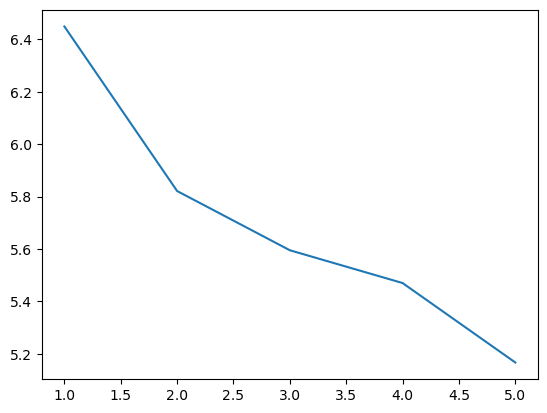

In [ ]:
plt.plot([1,2,3,4,5],train_loss_combine)

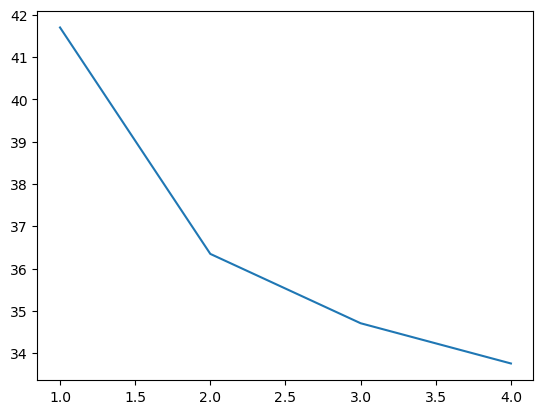

In [ ]:
plt.plot([1,2,3,4],train_loss_combine)

In [60]:
# model_combined.load_state_dict(torch.load("/content/drive/MyDrive/ire_v2t/entire_model.pt"))

# model_combined.eval()

loaded_model_checkpoint = torch.load('entire_model.pt', map_location=torch.device('cpu'))

# Assuming 'model_state_dict' is the key for your model
loaded_model_state_dict = loaded_model_checkpoint['model_state_dict']

# Now, you need to create an instance of your model and load the state dictionary
# Replace 'YourModelClass' with the actual class of your model
model_combined.load_state_dict(loaded_model_state_dict)



<All keys matched successfully>

In [ ]:
for batch_idx, (essay_id, essay_set, essays, prompt, normalized_score) in tqdm(enumerate(dataloader)):
    x = model_combined(essays,800)
    break

0it [02:55, ?it/s]


In [ ]:
for batch_idx, (essay_id, essay_set, essays, prompt, normalized_score) in tqdm(enumerate(dataloader)):
    y = normalized_score
    break

0it [00:00, ?it/s]


In [ ]:
x

tensor([[0.4576],
        [0.5561],
        [0.2083],
        [0.6316],
        [0.0641],
        [0.3843],
        [0.7712],
        [0.6273],
        [0.3556],
        [0.6836],
        [0.5091],
        [0.6014],
        [0.6097],
        [0.6902],
        [0.5522],
        [0.3617],
        [0.5664],
        [0.5959],
        [0.3753],
        [0.7696],
        [0.4606],
        [0.7146],
        [0.3165],
        [0.6356],
        [0.6674],
        [0.8357],
        [0.6473],
        [0.7392],
        [0.6404],
        [0.6453],
        [0.6600],
        [0.6721]], grad_fn=<AddBackward0>)

In [ ]:
for v1, v2 in zip(x, y):
    print("Real : ", v2, "pred : ", v1)

Real :  tensor(1., dtype=torch.float64) pred :  tensor([0.4576], grad_fn=<UnbindBackward0>)
Real :  tensor(1., dtype=torch.float64) pred :  tensor([0.5561], grad_fn=<UnbindBackward0>)
Real :  tensor(0.6000, dtype=torch.float64) pred :  tensor([0.2083], grad_fn=<UnbindBackward0>)
Real :  tensor(0.6667, dtype=torch.float64) pred :  tensor([0.6316], grad_fn=<UnbindBackward0>)
Real :  tensor(0.7000, dtype=torch.float64) pred :  tensor([0.0641], grad_fn=<UnbindBackward0>)
Real :  tensor(0.6667, dtype=torch.float64) pred :  tensor([0.3843], grad_fn=<UnbindBackward0>)
Real :  tensor(1., dtype=torch.float64) pred :  tensor([0.7712], grad_fn=<UnbindBackward0>)
Real :  tensor(0.5000, dtype=torch.float64) pred :  tensor([0.6273], grad_fn=<UnbindBackward0>)
Real :  tensor(0.2000, dtype=torch.float64) pred :  tensor([0.3556], grad_fn=<UnbindBackward0>)
Real :  tensor(0.5000, dtype=torch.float64) pred :  tensor([0.6836], grad_fn=<UnbindBackward0>)
Real :  tensor(0.5000, dtype=torch.float64) pred :  

Coherence NLI

In [61]:
bert = BertModel.from_pretrained('bert-base-uncased')
# bert_tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

cls = bert_tokenizer.cls_token
sep = bert_tokenizer.sep_token
pad = bert_tokenizer.pad_token
unk = bert_tokenizer.unk_token

cls_id = bert_tokenizer.cls_token_id
sep_id = bert_tokenizer.sep_token_id
pad_id = bert_tokenizer.pad_token_id
unk_id = bert_tokenizer.unk_token_id
print(cls_id,sep_id,pad_id,unk_id)

101 102 0 100


In [62]:
#Helper functions for pre-processing
def limit_sentence_length(sentence):
  sentence = sentence.split()
  sentence = sentence[:128]
  return " ".join(sentence)

def get_token_type(sentence,num):
  return [num]*len(sentence)


In [63]:
#Model
class Bert_Model(nn.Module):
  def __init__(self,output_dim):
    super().__init__()
    self.bert = bert
    embedding_dim = bert.config.to_dict()['hidden_size']
    self.out = nn.Linear(embedding_dim, output_dim)
  def forward(self, seq, attention_mask, token_type):
    embeddings = self.bert(input_ids = seq, attention_mask = attention_mask, token_type_ids= token_type)[1]
    return self.out(embeddings)


In [64]:
bert_model_snli = Bert_Model(3).to(device)
bert_model_snli.load_state_dict(torch.load(r"bert_model_snli.pth",map_location=torch.device('cpu')))
optimizer_snli = AdamW(bert_model_snli.parameters(),lr=2e-5,eps=1e-6,correct_bias=False)
criterion_snli = nn.CrossEntropyLoss().to(device)


c:\Users\pchhl\anaconda3\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [65]:
def predict_inference(premise, hypothesis, bert_model):
    torch.cuda.empty_cache()
    bert_model.eval()
    premise = cls + ' ' + premise + ' ' + sep
    hypothesis = hypothesis + ' ' + sep

    premise_tokens = bert_tokenizer.tokenize(premise)
    hypothesis_tokens = bert_tokenizer.tokenize(hypothesis)

    premise_token_type = get_token_type(premise_tokens,0)
    hypothesis_token_type = get_token_type(hypothesis_tokens,1)
    # print(premise_token_type, hypothesis_token_type)
    seq = premise_tokens + hypothesis_tokens
    seq = bert_tokenizer.convert_tokens_to_ids(seq)
    # print(seq)
    tokens_type = premise_token_type + hypothesis_token_type
    attention_mask = get_token_type(seq,1)

    seq = torch.LongTensor(seq).unsqueeze(0).to(device)
    tokens_type = torch.LongTensor(tokens_type).unsqueeze(0).to(device)
    attention_mask = torch.LongTensor(attention_mask).unsqueeze(0).to(device)

    prediction = bert_model(seq, attention_mask, tokens_type)
    prediction = F.softmax(prediction, dim=-1)

    return prediction[0, 0].item()

In [66]:
premise = 'A soccer game with multiple males playing.'
hypothesis = 'Some men are playing a sport.'

print(predict_inference(premise, hypothesis,bert_model_snli))

0.9508330821990967


In [67]:

def coherence_score_snli(essay):
    paragraphs = essay.split('\n\n')
    final_sum = 0
    for paragraph in paragraphs:
        sentences = sent_tokenize(paragraph)
        # print(sentences)
        size = len(sentences)-1
        # print(size)
        sum = 0
        for i in range(size):
            x = predict_inference(sentences[i], sentences[i+1], bert_model_snli)
            # print(sentences[i], sentences[i+1], x)
            sum += x
        # print(sum, size, "score :",sum / size)
        final_sum += sum / max(1, size)

    # print("final_sum :", final_sum/len(paragraphs))
    return final_sum/len(paragraphs)


# essay = """In the rapidly evolving landscape of technology, Artificial Intelligence (AI) stands out as a revolutionary force with the potential to reshape every aspect of human life. From intelligent virtual assistants and autonomous vehicles to sophisticated medical diagnostics, AI has transcended the realm of science fiction, becoming an integral part of our daily existence. This essay explores the impact of artificial intelligence on various domains and discusses both its promises and challenges. At its core, AI refers to the development of computer systems that can perform tasks that typically require human intelligence. These tasks include learning from experience (machine learning), understanding natural language, recognizing patterns, and solving complex problems. The power of AI lies in its ability to process vast amounts of data, learn from it, and make informed decisions without explicit programming. One of the most visible manifestations of AI in our lives is through virtual assistants like Siri, Alexa, and Google Assistant. These systems use natural language processing and machine learning algorithms to understand and respond to user queries, making our interactions with technology more intuitive and user-friendly. Similarly, AI has transformed industries such as healthcare, finance, and manufacturing, enhancing efficiency and productivity. In healthcare, AI plays a crucial role in medical imaging analysis, disease diagnosis, and drug discovery. Machine learning algorithms can analyze medical images, detect anomalies, and assist healthcare professionals in making more accurate and timely decisions. In finance, AI algorithms are employed for fraud detection, risk assessment, and algorithmic trading, contributing to the stability and security of financial systems. However, the widespread adoption of AI also raises ethical and societal concerns. The deployment of AI in decision-making processes, such as hiring, lending, and law enforcement, has raised questions about bias and fairness. Ensuring transparency, accountability, and ethical considerations in AI systems is crucial to avoid reinforcing existing societal inequalities. Moreover, there are concerns about job displacement as automation and AI technologies continue to advance. While AI has the potential to create new job opportunities, it is essential to address the skills gap and provide education and training to empower the workforce for the jobs of the future. The development of AI also poses challenges related to privacy and security. As AI systems rely on massive datasets for training, protecting sensitive information from misuse and ensuring robust cybersecurity measures become paramount. In conclusion, artificial intelligence is a transformative force that holds immense potential for positive impact across various domains. Its ability to process data, learn from experience, and make intelligent decisions opens up new possibilities for innovation and efficiency. However, ethical considerations, societal impacts, and the need for responsible development and deployment are critical aspects that must be carefully navigated to harness the full benefits of AI while addressing its challenges. As we move forward into an AI-driven future, it is imperative to strike a balance that maximizes the positive contributions of AI while safeguarding the well-being of individuals and society as a whole"""
# print(coherence_score_snli(essay))


# essay = "Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the economy, sea floor spreading or even about the @DATE1's you'll be surprise at how much he/she knows. Believe it or not the computer is much interesting then in class all day reading out of books. If your child is home on your computer or at a local library, it's better than being out with friends being fresh, or being perpressured to doing something they know isnt right. You might not know where your child is, @CAPS2 forbidde in a hospital bed because of a drive-by. Rather than your child on the computer learning, chatting or just playing games, safe and sound in your home or community place. Now I hope you have reached a point to understand and agree with me, because computers can have great effects on you or child because it gives us time to chat with friends/new people, helps us learn about the globe and believe or not keeps us out of troble. Thank you for listening."
# print(coherence_score_snli(essay))

essay = 'the mood created by the author in the memoir was a mood of admiration. i think it was a mood of admiration because narciso admires the fact that his mother and father both left their families friends and careers in the country they loved. caps1 mood that the memoir sets is the mood of family and friends. i think the memoir sets the mood family and friend because it talks alot about the meaning of family for example in paragraph num1 the author says growing up in this environment instilled in me a great sense that family had nothing to do with being blood relative. that means that even though someone is not blood related to you can love them just as much as if they were. caps1 thing the memoir said was i learned the real definition of family. and for this i will never forget that house or its gracious neighbor hood or the many things i learned there about how to love. i will never forget how my parents turned this simple house into a home. this means that his parents turned a small house into a welcoming. loving place that holds so many memories.'
print(coherence_score_snli(essay))

0.17029417385088486


In [86]:
from transformers import DPRContextEncoder, DPRContextEncoderTokenizer

context_encoder_model_name = 'facebook/dpr-ctx_encoder-multiset-base'
context_encoder_tokenizer = DPRContextEncoderTokenizer.from_pretrained(context_encoder_model_name)
context_encoder_model = DPRContextEncoder.from_pretrained(context_encoder_model_name)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DPRQuestionEncoderTokenizer'. 
The class this function is called from is 'DPRContextEncoderTokenizer'.
Some weights of the model checkpoint at facebook/dpr-ctx_encoder-multiset-base were not used when initializing DPRContextEncoder: ['ctx_encoder.bert_model.pooler.dense.bias', 'ctx_encoder.bert_model.pooler.dense.weight']
- This IS expected if you are initializing DPRContextEncoder from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DPRContextEncoder from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification mode

RANKED MODEL

In [ ]:
import re
import random as scale

# file type contains {'bert-base-uncased', 'roberta-base', 'xlnet-base-cased'}
file = 'bert-base-uncased'
bert_tokenizer = BertTokenizer.from_pretrained(file, sep_token='[SEP]')
url_replacer = '<url>'
num_regex = re.compile('^[+-]?[0-9]+\.?[0-9]*$')
ref_scores_dtype = 'int32'

MAX_SENTLEN = 50
MAX_SENTNUM = 100

asap_ranges = {
    0: (-60, 60),
    1: (-10, 10),
    2: (-5, 5),
    3: (-3, 3),
    4: (-3, 3),
    5: (-4, 4),
    6: (-4, 4),
    7: (-30, 30),
    8: (-60, 60)
}
def get_ref_dtype():
    return ref_scores_dtype


def tokenize(string):
    tokens = nltk.word_tokenize(string)
    for index, token in enumerate(tokens):
        if token == '@' and (index+1) < len(tokens):
            tokens[index+1] = '@' + re.sub('[0-9]+.*', '', tokens[index+1])
            tokens.pop(index)
    return tokens


def get_score_range(prompt_id):
    return asap_ranges[prompt_id]

def scaled_value(low, high):
    return scale.uniform(low, high)

import re
# import nltk

# Download the necessary resource if not already downloaded
# nltk.download('punkt')

def text_tokenizer(text, replace_url_flag=True, tokenize_sent_flag=True, create_vocab_flag=True):
    text = replace_url(text)
    text = text.replace(u'"', u'')

    if "..." in text:
        text = re.sub(r'\.{3,}(\s+\.{3,})*', '...', text)
    if "??" in text:
        text = re.sub(r'\?{2,}(\s+\?{2,})*', '?', text)
    if "!!" in text:
        text = re.sub(r'\!{2,}(\s+\!{2,})*', '!', text)

    # Use nltk word tokenizer
    tokens = nltk.word_tokenize(text)

    if tokenize_sent_flag:
        punctuation = '.!,;:?"\'、，；'
        text = " ".join(tokens)
        text_nopun = re.sub(r'[{}]+'.format(punctuation), '', text)
        sent_tokens = text_nopun


        return sent_tokens
    else:
        raise NotImplementedError

def read_input_essay(input):
    

    data_id = []

    # tokenize text into sentences
    sent_tokens = text_tokenizer(input, replace_url_flag=True, tokenize_sent_flag=True)
    tokenized_text = bert_tokenizer.tokenize(sent_tokens)
    max_num = 512
    indexed_tokens = bert_tokenizer.convert_tokens_to_ids(tokenized_text)


    data_id.append(indexed_tokens)


    return data_id

import numpy as np
import math

def padding_sentence_sequences_input(index_sequences, maxnum, post_padding=True):


    index_sequences = np.array(index_sequences)
    num_seq = math.ceil((index_sequences.size) / maxnum)
    index_sequences = index_sequences.flatten()

    X = np.empty([num_seq, maxnum], dtype=np.int32)
    mask = np.zeros([num_seq, maxnum], dtype=np.float32)

    j = 0

    for i in range(0, len(index_sequences), maxnum):
        # Get a slice of elements for the current row
        row = index_sequences[i:i + maxnum]

        # If the row is shorter than maxnum, set values and mask for padding
        X[j, :len(row)] = row
        X[j, len(row):] = 1
        mask[j, :len(row)] = 1
        mask[j, len(row):] = 0

        j += 1

    return X, mask

def prepare_sentence_data(input):
    
    data = read_input_essay(input)

    X_data,mask = padding_sentence_sequences_input(data, max_num, post_padding=True)


    return X_data,mask

# from transformers import BertModel

file = 'bert-base-uncased'
bert_model = BertModel.from_pretrained(file)



class mlp(nn.Module):
    def __init__(self, in_f, out_f):
        super(mlp, self).__init__()
        self.layer1 = nn.Linear(in_f, 768)
        self.active = nn.Tanh()
        self.layer2 = nn.Linear(768, out_f)

    def forward(self, x):
        out = self.layer1(x)

        return out


class npcr_model(nn.Module):
    def __init__(self, maxSq=512):
        super(npcr_model, self).__init__()

        self.embedding = bert_model
        self.dropout = nn.Dropout(0.5)

        self.nn1 = nn.Linear(768, 768)
        self.output = nn.Linear(768, 1, bias=False)

        self.init_weights()

    def init_weights(self):
        """
        Here we reproduce Keras default initialization weights for consistency with Keras version
        """
        ih = (param.data for name, param in self.named_parameters() if 'weight_ih' in name)
        hh = (param.data for name, param in self.named_parameters() if 'weight_hh' in name)
        b = (param.data for name, param in self.named_parameters() if 'bias_ih' in name or 'bias_hh' in name)
        # nn.init.uniform(self.embed.weight.data, a=-0.5, b=0.5)
        for t in ih:
            nn.init.xavier_uniform_(t)
        for t in hh:
            nn.init.orthogonal_(t)
        for t in b:
            nn.init.constant_(t, 0)

    def forward(self, x0, x1):
        x0_embed = self.embedding(x0)[1]
        x1_embed = self.embedding(x1)[1]

        # the linear layer nn1 can be replaced by MLP(the above or overwite by yourself)
        x0_nn1 = self.nn1(x0_embed)
        x1_nn1 = self.nn1(x1_embed)

        x0_nn1_d = self.dropout(x0_nn1)
        x1_nn1_d = self.dropout(x1_nn1)

        diff_x = (x0_nn1_d - x1_nn1_d)
        y = self.output(diff_x)

        y = torch.sigmoid(y)

        return y

model = npcr_model(512)

def replace_url(text):
    replaced_text = re.sub('(http[s]?://)?((www)\.)?([a-zA-Z0-9]+)\.{1}((com)(\.(cn))?|(org))', url_replacer, text)
    return replaced_text
max_num = 512
def is_number(token):
    return bool(num_regex.match(token))
# .cuda()
# For PyTorch model
import torch


model = torch.load('testrank_core_bert.prompt1.pt', map_location=torch.device('cpu'))
# model = torch.load('testrank_core_bert.prompt1.pt')
# model = model.to(device)

# Function to convert model prediction to a score
def convert_prediction_to_score(prediction):

    scaled_factor = scaled_value(0, 10)
    final_score = scaled_factor*prediction*2
    return final_score

def predict_score(essay_text, reference_text, model):
    # Prepare input data
    tensor_input,mask_input = prepare_sentence_data(essay_text)
    tensor_reference,mask_reference = prepare_sentence_data(reference_text)

    # Extract only the first sequence
    tensor_input = torch.tensor(tensor_input)
    mask_input = torch.tensor(mask_input)
    tensor_reference = torch.tensor(tensor_reference)
    mask_reference = torch.tensor(mask_reference)

    # Move tensors to the specified device
    tensor_input = tensor_input.to(device)
    mask_input = mask_input.to(device)
    tensor_reference = tensor_reference.to(device)
    mask_reference = mask_reference.to(device)

    size = tensor_input.size()

    # Use the loaded model to make predictions
    with torch.no_grad():
        prediction = model(tensor_input, tensor_reference)


    # Convert the model's prediction to a score
    predicted_score = convert_prediction_to_score(prediction[0].item())

    return predicted_score


# from Reference import list
lst =["the world. This is why chatting is the best setting. Computer helps the world in many ways. It helps kids if they need to research something. It helps the cops catch the bad people. The computer helps parents get from their children by vaction ads. This is has the computer helps the world. The computer does benifit our society. It has change the world. You can do many things on it. On the computer, you can chat with people from anywhere. The computer helps the world everyday. This is how the computer benifits our society.","Dear Newspaper, I think computers are great. There really helpful. They can teach us about things. Also they have fun games and websites which is always a plus. Computers are helpful in lots of things, like if you need to look something up for school you can just easily go on the computer and find it also some teachers have websites now where insted of bringing a big social studies book home, you can go on the internet and use the online book. Did you know that @PERCENT1 of @CAPS1 students rather use the internet book then taking the actual one home. Also if you forgot to write down your homework theres a website to lookup all the homework you have. Also computers can teach us things. There are websites that have math games and school related things. Also you can easilly go on google and look up things and they can give you thousands of information. Lastly the internet is a good source for fun they have millions of games on the internet and also fun websites like facebook. Did you know @PERCENT2 of @CAPS1 students use the computer for the games and online talking. This also gives kids lots of things to do on a rainy day. So weither your using the internet for it's helpfulness its resources, or just for the fun games and websites. Computers are really helpful.","Although some people believe that computers turn us children into zombies, I believe that they effect us in a posotive way. Computers can help us explore far away places that we @MONTH1 never go to. Maybe help us connect with an old friend or just a little help on homeworks. One reason why I think computers are only helping us is they help us explore othe places. I know for a fact that every kid dreams of a place that they would love to visit. But not at all of us can afford to travel far away. Most families however, do have computers. With these computers, kids with a parents permission, can use the internet to learn tons of cool facts about their place. ""I have always wanted to go to @LOCATION1 but my parents just don't have the proper incomg"" said @PERSON1 of @CAPS1-@CAPS2 @CAPS3 school @CAPS4 I used my @CAPS6 and the internet to discover. HUNDREDS of amazing facts on it."" @CAPS4 as you can see computers can help people realize their dreams. Another reason why I","said @PERSON1 of @CAPS1-@CAPS2 @CAPS3 school @CAPS4 I used my @CAPS6 and the internet to discover. HUNDREDS of amazing facts on it."" @CAPS4 as you can see computers can help people realize their dreams. Another reason why I think computers are good is they help you connect with friends. If you are like me, you like to talk to your friends. A @CAPS5! But sometimes they are too far away to call if you don't want to pay for it. A solution a new wonderful machine called. The @CAPS6! You can chat long distances without being for it. This is especially good for me because not too long ago, one of my best friends moved away to @LOCATION2. I thoughy I would never talk to him again. Then I learned about @CAPS7 @CAPS8. It allows you to talk whenever you want, whenever you want! Now, me and my friend can stay in touch and @CAPS4 can you! My finale reason as to why I think computers are good is they can help you on homework too. Even have a tricky math problem you couldn't figure out? How about the capital of a state that visit, slipped your mined? Well the @CAPS6 can solve both of those problems and more! @PERCENT1 of computers these days come with soft wear in them that comes with a calculator. For the other @PERCENT1 you can download and install softwear onto your @CAPS6 for a low price. And every @CAPS6 made in this world has internet capabilities. All's you need to do is it on and get ready for a ride! @CAPS4 don'y worry about too much @CAPS6 use, because computers can only help us not hurt us. @CAPS4 remember, computers help us live our dreams to the full extent. they also help us connect with no another, and help us excel in school. @CAPS4 get on, and get goin. Have you used your @CAPS6 today?","Dear local newspaper, @CAPS1 you know how long you go on the computer for? Well get up and go outside. Thats one of my reasons why I think people spend to much time on it my other reason is your eyesit can go bad. Its a nice sunny day dont wast your time on the computer! Go outside! All, kids @CAPS1 is sit on the computer all day not getting exercis. Did you know @NUM1 out of @NUM2 kids that sit on the computers all day gain at least @NUM3? @PERSON1 told me that. I mean I believe him because its true kids dont get up.There missing a nice day out would you wanna miss a nice sunny day? My finall reason is kids eyesight can go bad. I mean having them stare at a screen all day, thats bad. @PERSON1 told me if your on the computer for @NUM4 hours on the computer for @NUM4 hours straight your eyes can get worst. I remember a tiny when I was on the computer for @NUM4 1/@NUM4 hours my eyes were killing me everything I blink. I know the computer is fun playing games, talking to friends but you should take a break and @CAPS1 something ples. In conclusion just go outside and have fun! @CAPS1 you want to wast a nice sunny day by staying in doors hurting your eyes? I know I @CAPS1!"]

# Move the model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
loaded_model = model.to(device)


def vaibhav(input):
    score = []
    for i,reference_essay in enumerate(lst):
            predicted_score = predict_score(input, reference_essay, loaded_model)
            score.append(predicted_score)

    final =  ((sum(score)/len(score)))/10
    # print("Score of the essay is : ",final)
    return final


def get_final_score_vaibhav(essays):
    main_data = pd.DataFrame()
    essays = [essays]
    prompt = [prompt]


    main_data = pd.DataFrame()
    temp_df = pd.DataFrame({
        'score_vaibhav' : vaibhav(essays[0]),
        # 'normalized_score': normalized_score
      }, index=[0])

    main_data = pd.concat([main_data, temp_df], ignore_index=True)
    return main_data


#### LOADING MODELS

In [68]:
main_data = pd.DataFrame()

total_rows_123=0

for essay_id, essay_set, essays, prompt, normalized_score in tqdm(dataloader):
    total_rows_123 += essay_id.size(0)

    if total_rows_123 >= 1000:
          break

        
    # encoded_prompt = context_encoder_tokenizer(prompt, return_tensors='pt', padding=True, truncation=True)
    # prompt_tokens = context_encoder_model(**encoded_prompt).pooler_output

    # essays_dpr=list(essays)
    # document_embeddings_batch = context_encoder_tokenizer(essays_dpr, return_tensors='pt', padding=True, truncation=True)
    # document_embeddings_batch = context_encoder_model(**document_embeddings_batch).pooler_output

    # with torch.no_grad():
    #     prompt_embedding = model(**prompt_tokens).last_hidden_state.mean(dim=1)
    #     essay_embedding = model(**document_embeddings_batch).last_hidden_state.mean(dim=1)

    # # Calculate similarity (cosine similarity in this case)
    # dpr_score = torch.nn.functional.cosine_similarity(prompt_embedding, essay_embedding).item()
    # print(type(essays))
    means, variances, grammaticals, word_counts, char_counts, coherence_score_nli, val =[], [], [], [], [], [], []
    for index in range(len(essays)):
        # print(essays[index])
        means.append(get_mean_score(essays[index]))
        variances.append(get_variance_score(essays[index]))
        grammaticals.append(get_grammatical_score(essays[index]))
        word_counts.append(get_word_count(essays[index]))
        char_counts.append(get_char_count(essays[index]))
        coherence_score_nli.append(coherence_score_snli(essays[index]))
        val.append(prompt[index]+"."+essays[index])

    combined_score = model_combined(essays,800)
    combined_score = [item.item() for item in combined_score]

    val, lengths_batch = preprocess_essay(val)
    # val = val.to(device)
    essays, lengths_batch = preprocess_essay(essays)
    # essays = essays.to(device)

    out_semantic = model_semantic(essays, lengths_batch)
    out_coher = model_coher(essays, lengths_batch)
    # mittal_sahab_score = mittal_is_a_model(essay)
    # normalized_score = normalized_score.to(device)

    out_prompt = model_prompt(val, lengths_batch)

    out_semantic = out_semantic.cpu().detach().numpy()
    out_coher = out_coher.cpu().detach().numpy()
    out_prompt = out_prompt.cpu().detach().numpy()
    normalized_score = normalized_score.cpu().detach().numpy()


    # mittal_sahab = mittal_sahab_score().cpu().detach().numpy()


    # print(normalized_score_np.is_cuda, word_counts.is_cuda)

    # Print the shapes of arrays before creating the DataFrame
    print("Shapes before creating DataFrame:")
    print("out_semantic:", out_semantic)
    print("out_coher:", out_coher)
    print("out_prompt:", out_prompt)
    print("combined_score:", combined_score)
    print("coherence_score_nli:", coherence_score_nli)
    print("normalized_score:", normalized_score)

    # Create the DataFrame
    temp_df = pd.DataFrame({
        'means': means,
        'variances': variances,
        'grammaticals': grammaticals,
        'word_counts': word_counts,
        'char_counts': char_counts,
        'out_semantic': np.squeeze(out_semantic),
        'out_coher': np.squeeze(out_coher),
        'out_prompt': np.squeeze(out_prompt),
        'combined_score' : np.squeeze(combined_score),
        'coherence_score_nli' : np.squeeze(coherence_score_nli),
        'normalized_score': np.squeeze(normalized_score)
    })
    main_data = pd.concat([main_data, temp_df], ignore_index=True)
    
main_data.to_csv('main_data.csv', index=False)


  0%|          | 1/375 [03:30<21:49:18, 210.05s/it]

Shapes before creating DataFrame:
out_semantic: [0.5041676  0.5058102  0.502608   0.50287455 0.50404686 0.50277233
 0.50056565 0.5020878  0.5010128  0.503953   0.5014078  0.50247675
 0.5045078  0.50253713 0.5027312  0.5011677  0.5047954  0.5013811
 0.50262076 0.5020898  0.5041601  0.5029414  0.5050386  0.5051391
 0.5047843  0.50509703 0.50239867 0.50468963 0.50275725 0.5047855
 0.50498825 0.5026075 ]
out_coher: [0.20128092 0.25307566 0.3057093  0.25506708 0.486871   0.28607333
 0.49314734 0.2623561  0.49528807 0.48553845 0.29493693 0.4938039
 0.25549588 0.28205845 0.26798272 0.21793818 0.49968788 0.22260246
 0.49619412 0.3018118  0.24301194 0.48705998 0.21740443 0.35942394
 0.23218921 0.520518   0.5018147  0.50791806 0.24308681 0.47924337
 0.4979789  0.33004555]
out_prompt: [3.7481838e-01 3.3711219e-01 3.5261744e-01 1.6347622e-03 5.9876265e-04
 8.8455759e-02 4.3537896e-04 3.0506713e-02 2.2002889e-04 9.7791723e-04
 1.2113331e-03 4.9347960e-04 2.3321380e-01 3.9572718e-05 5.6572873e-03
 3

  1%|          | 2/375 [07:00<21:45:27, 209.99s/it]

Shapes before creating DataFrame:
out_semantic: [0.50195634 0.50283825 0.50206286 0.5018214  0.5044791  0.5060237
 0.5060105  0.505131   0.5045028  0.5009789  0.5004945  0.500899
 0.506553   0.5048256  0.5014836  0.5006048  0.50181043 0.5057422
 0.5049106  0.5001196  0.5025507  0.5001426  0.504355   0.5025994
 0.5026567  0.50396544 0.50178224 0.50338495 0.5062427  0.5015843
 0.50428295 0.5044761 ]
out_coher: [0.27353266 0.28895065 0.51333785 0.4977665  0.47825173 0.1866511
 0.3003453  0.4805716  0.21293339 0.50281715 0.5044949  0.48646092
 0.23832285 0.49989364 0.48328513 0.20883188 0.2128558  0.27511472
 0.506421   0.24195035 0.50893205 0.24842139 0.49660793 0.50077254
 0.20818193 0.15969677 0.35215387 0.5213442  0.27518004 0.48956728
 0.24001464 0.28714016]
out_prompt: [3.8168782e-01 3.6919311e-01 5.4765709e-02 2.1706663e-04 8.2059741e-02
 4.3425080e-03 6.4740749e-04 3.1072509e-01 9.4798929e-04 5.1836896e-04
 1.0416515e-01 2.3699630e-04 3.4353736e-01 3.6868864e-01 1.5264735e-01
 3.80

  1%|          | 3/375 [10:13<20:55:45, 202.54s/it]

Shapes before creating DataFrame:
out_semantic: [0.5038754  0.5047081  0.50483525 0.501616   0.5023313  0.50302935
 0.50651187 0.50722605 0.5003463  0.50342387 0.5004033  0.5086954
 0.4996521  0.5041163  0.5030865  0.504545   0.49995363 0.49388197
 0.50634474 0.50375015 0.5037394  0.5037652  0.49822786 0.5018451
 0.50365996 0.5028655  0.50623566 0.50372934 0.5034286  0.49971393
 0.5043417  0.505206  ]
out_coher: [0.49701285 0.30287424 0.24867696 0.4939459  0.24378747 0.2007252
 0.50329244 0.5090041  0.29975808 0.22154742 0.5157145  0.50380087
 0.42291284 0.25354356 0.49590722 0.5023525  0.52209383 0.46966738
 0.27739727 0.26849863 0.49192095 0.49476674 0.27433544 0.4979245
 0.23336434 0.48385927 0.2155025  0.21329747 0.37895668 0.51243526
 0.23130523 0.4853448 ]
out_prompt: [3.1208005e-03 6.9638086e-03 3.6201063e-01 2.9628402e-01 1.0678002e-01
 7.2220587e-03 1.1940798e-03 9.6981442e-03 3.6162813e-03 3.7402523e-01
 3.5537845e-01 4.8658168e-03 2.6868465e-05 4.1036230e-01 1.0981938e-03
 4

  1%|          | 4/375 [13:42<21:08:40, 205.18s/it]

Shapes before creating DataFrame:
out_semantic: [0.50306916 0.50068057 0.5058496  0.504758   0.5038954  0.50461924
 0.5019042  0.50255346 0.5034965  0.49885985 0.50266594 0.5020915
 0.5009798  0.50136834 0.50069535 0.504953   0.5028172  0.5044715
 0.50051075 0.5049442  0.5028525  0.49328253 0.5020175  0.50448674
 0.5013468  0.5019502  0.5043612  0.50113434 0.50142175 0.50650305
 0.50372595 0.50295   ]
out_coher: [0.49605027 0.20978342 0.22859216 0.23277217 0.27950144 0.28386027
 0.2105453  0.20300959 0.5059921  0.49642256 0.27083147 0.26943952
 0.5143301  0.25643036 0.20159145 0.2259805  0.49104574 0.30640435
 0.24104436 0.24861515 0.24861382 0.41727608 0.24322708 0.25241113
 0.48595354 0.18963791 0.48485252 0.19018894 0.17918631 0.49456298
 0.48975822 0.501661  ]
out_prompt: [3.3486354e-01 4.3410607e-04 1.4388168e-03 3.4933361e-01 3.6769563e-01
 3.6407551e-01 3.6710027e-01 1.3395338e-01 1.3142708e-03 3.4096646e-01
 1.1128543e-03 1.4391498e-03 1.6292739e-01 3.7149999e-01 9.8700970e-03


  1%|▏         | 5/375 [17:13<21:18:26, 207.31s/it]

Shapes before creating DataFrame:
out_semantic: [0.50055844 0.49944332 0.50032234 0.5021193  0.5032242  0.50050396
 0.50569177 0.4920254  0.5024821  0.5038018  0.50326246 0.5032311
 0.5065999  0.5050708  0.5073802  0.5014173  0.5030377  0.50268984
 0.50373846 0.5028733  0.5010309  0.50401014 0.50526786 0.5035871
 0.50481313 0.50015014 0.50570637 0.50615484 0.50107026 0.50301987
 0.50221115 0.5051882 ]
out_coher: [0.50253296 0.25059667 0.17756182 0.4997006  0.21937269 0.2198983
 0.50231296 0.3293674  0.24464247 0.32947046 0.50181353 0.24653304
 0.24194016 0.51400983 0.1973884  0.47816497 0.51499885 0.47962573
 0.5103975  0.21027973 0.28378758 0.245397   0.2401445  0.24917229
 0.47861448 0.40361148 0.21163084 0.5033299  0.4841402  0.25602087
 0.27358583 0.50025225]
out_prompt: [3.4572239e-04 1.5862143e-01 9.6345879e-04 3.8491634e-01 3.4966657e-01
 3.5046434e-01 5.9543923e-02 1.1910956e-03 8.1805832e-04 3.7117296e-01
 3.5243246e-01 1.3120086e-01 3.6868286e-01 3.6522627e-03 1.4164593e-03
 

  2%|▏         | 6/375 [20:16<20:23:33, 198.95s/it]

Shapes before creating DataFrame:
out_semantic: [0.50324804 0.50947803 0.5044832  0.5042509  0.50504315 0.50138474
 0.50550455 0.5062647  0.50404215 0.50234187 0.4990321  0.5030232
 0.5017519  0.50337267 0.498706   0.5028516  0.50081444 0.5064656
 0.50477976 0.5045509  0.5027393  0.5061717  0.50439054 0.5065653
 0.5058003  0.50478166 0.502493   0.50166374 0.49902165 0.50486755
 0.505068   0.5042761 ]
out_coher: [0.48433462 0.20711361 0.20885387 0.50712407 0.22889476 0.51094574
 0.285769   0.21630403 0.5076762  0.4925852  0.2839048  0.29609662
 0.48242754 0.48804477 0.25972337 0.50081617 0.2757927  0.27194345
 0.28526786 0.4966437  0.28098372 0.4777677  0.495429   0.27992323
 0.21733926 0.51426387 0.22133923 0.22166325 0.49315175 0.21119143
 0.5050091  0.48671213]
out_prompt: [3.7373704e-01 3.7495074e-01 7.7302760e-04 1.5599023e-01 2.3894746e-02
 3.7713712e-01 3.7073958e-01 3.7275773e-01 1.8476482e-04 3.6119402e-04
 4.0983484e-04 3.9452240e-01 3.5346285e-01 1.3493121e-02 2.6431354e-02
 

  2%|▏         | 7/375 [23:30<20:09:05, 197.14s/it]

Shapes before creating DataFrame:
out_semantic: [0.4981102  0.50395054 0.50510234 0.5062168  0.5044323  0.5017649
 0.50412256 0.50298727 0.50177294 0.5005379  0.5025836  0.5042765
 0.50281054 0.5000427  0.50382835 0.5030029  0.5043332  0.5046169
 0.5049817  0.49814686 0.50238425 0.5007963  0.5004261  0.50509804
 0.50452137 0.50048083 0.50422966 0.50190777 0.50456375 0.5034171
 0.5002416  0.5047075 ]
out_coher: [0.21006149 0.41474247 0.25210774 0.48805913 0.22219439 0.2381349
 0.30278045 0.49887726 0.5037335  0.48760986 0.5060668  0.25025982
 0.48287818 0.26372358 0.49140346 0.22680572 0.22293374 0.4981465
 0.24430175 0.2733209  0.21936406 0.50343096 0.4972926  0.23243879
 0.50197613 0.48419094 0.50262916 0.4955593  0.4893228  0.47380605
 0.29623154 0.20918964]
out_prompt: [9.2006335e-03 9.9827834e-05 2.1461423e-03 3.5625613e-01 3.3004364e-01
 3.5126069e-01 1.2503625e-03 3.5568607e-01 3.5528424e-01 4.7444501e-03
 4.8729384e-04 3.5137492e-01 7.0664245e-03 3.8067216e-01 1.4433084e-03
 2.4

  2%|▏         | 8/375 [26:56<20:24:13, 200.15s/it]

Shapes before creating DataFrame:
out_semantic: [0.50231683 0.50589174 0.50118303 0.5031869  0.5019471  0.505782
 0.50428474 0.5054589  0.49978462 0.50403094 0.5075097  0.50384575
 0.49840817 0.5043646  0.50317794 0.5019296  0.50163764 0.50007385
 0.50502306 0.50324684 0.5002696  0.5045333  0.5035324  0.5021492
 0.50246066 0.50483865 0.4994061  0.50424725 0.5038579  0.5004523
 0.501888   0.50123155]
out_coher: [0.5085158  0.2479236  0.260184   0.21995826 0.49136275 0.50122726
 0.2009056  0.50618076 0.29743102 0.3089583  0.4870553  0.21759799
 0.4962032  0.51291806 0.23486307 0.48359907 0.5110454  0.20727879
 0.29316542 0.49619165 0.5154281  0.22478072 0.24430475 0.51368076
 0.49418917 0.50223464 0.30540255 0.31970227 0.2884814  0.24548163
 0.33599094 0.22921658]
out_prompt: [1.5223774e-03 3.0670220e-01 3.8489074e-01 3.7937275e-01 1.9109958e-04
 2.1391321e-02 7.7213137e-03 3.5965586e-01 1.4183730e-02 1.3278226e-03
 1.2886796e-02 3.5206714e-01 1.1706623e-02 5.0549641e-02 9.0443790e-02
 4

  2%|▏         | 9/375 [30:19<20:25:03, 200.83s/it]

Shapes before creating DataFrame:
out_semantic: [0.5018625  0.50550115 0.50203454 0.50617903 0.5037906  0.5026193
 0.50397074 0.5044152  0.49818668 0.501886   0.50440556 0.5037108
 0.50479656 0.50240004 0.5027331  0.5042888  0.50611067 0.50119567
 0.50143695 0.5026636  0.5017979  0.5043445  0.4999746  0.503511
 0.500204   0.5045779  0.5016654  0.5047843  0.5045473  0.50471604
 0.50174093 0.49991715]
out_coher: [0.50656635 0.51894796 0.48525667 0.5052192  0.49720186 0.47561455
 0.21561319 0.20928545 0.4525625  0.29054794 0.49013874 0.48041308
 0.25894558 0.49824616 0.52416015 0.50487256 0.49233034 0.49868554
 0.507329   0.49370077 0.49861816 0.49656114 0.5207955  0.23165433
 0.31727928 0.49876484 0.2941964  0.23073383 0.26167467 0.27463564
 0.49170792 0.5062575 ]
out_prompt: [1.74950121e-03 1.67261076e-03 3.64520936e-03 1.62373134e-03
 1.53397977e-01 8.33479688e-03 1.82315484e-01 3.74921918e-01
 1.71761676e-05 6.60721511e-02 1.11567148e-03 1.66586608e-01
 4.16502468e-02 3.56847495e-01 1

  3%|▎         | 10/375 [33:35<20:13:55, 199.55s/it]

Shapes before creating DataFrame:
out_semantic: [0.50258267 0.50521976 0.502338   0.5000316  0.50691247 0.5029654
 0.5032367  0.50228876 0.5049792  0.50149864 0.5021549  0.5019183
 0.5035301  0.50275046 0.5006272  0.50180686 0.5019928  0.500003
 0.50262684 0.49671793 0.5030164  0.50338876 0.50180334 0.500743
 0.5012648  0.49785253 0.50232506 0.4999907  0.50302255 0.50129694
 0.501369   0.5022761 ]
out_coher: [0.22621417 0.29860282 0.18744975 0.22676903 0.22391924 0.24984568
 0.22111808 0.50087774 0.48968387 0.49805441 0.23923326 0.33074117
 0.49900487 0.2730146  0.28381655 0.49810374 0.18005016 0.50926477
 0.22411987 0.45546332 0.33877295 0.48908523 0.2777849  0.27986854
 0.49229378 0.49326536 0.22391014 0.23219594 0.2678133  0.4955852
 0.49711448 0.3203557 ]
out_prompt: [2.8949194e-03 2.9172949e-03 1.0685103e-03 3.5064816e-01 3.6450997e-01
 3.8151407e-01 3.7278804e-01 1.5295533e-03 5.3815143e-03 3.4662017e-01
 3.5154521e-01 3.6148456e-01 3.3369783e-01 1.6217668e-03 3.1059053e-02
 3.69

  3%|▎         | 11/375 [36:50<20:02:22, 198.20s/it]

Shapes before creating DataFrame:
out_semantic: [0.5044783  0.50406003 0.5021276  0.5032503  0.5032067  0.5045532
 0.5024672  0.50422364 0.5007823  0.5014801  0.50618327 0.5015655
 0.50394136 0.4929577  0.5028419  0.4989763  0.5057106  0.5016847
 0.50375545 0.50108564 0.5030851  0.5034282  0.5053034  0.50192845
 0.49805796 0.50591594 0.50601774 0.50581855 0.50709426 0.5003737
 0.50670385 0.503857  ]
out_coher: [0.21958616 0.3176106  0.29812318 0.25589916 0.2659053  0.26223657
 0.48166144 0.25789487 0.28317842 0.47214776 0.49742684 0.48366553
 0.20818377 0.4932988  0.28228647 0.5156321  0.48427066 0.49968952
 0.22334924 0.30369264 0.31492686 0.25922757 0.2429658  0.2408038
 0.1969537  0.266142   0.51506287 0.3397854  0.49398825 0.25694475
 0.48067427 0.26981813]
out_prompt: [3.0401018e-03 2.9187459e-03 5.4208864e-02 4.7077560e-03 3.6060995e-01
 3.5461074e-01 5.4482516e-04 9.3217718e-04 1.8947282e-04 1.6652431e-01
 1.8986908e-04 3.6886823e-01 3.6406806e-01 1.8026156e-03 3.8052809e-01
 1.

  3%|▎         | 12/375 [40:01<19:45:08, 195.89s/it]

Shapes before creating DataFrame:
out_semantic: [0.5058807  0.5045242  0.500466   0.5064343  0.50408614 0.50410444
 0.5026066  0.49989745 0.49747244 0.5026473  0.50272304 0.49985126
 0.501221   0.5059108  0.50434214 0.5022532  0.5039096  0.49381608
 0.50457644 0.50284433 0.5004862  0.5018046  0.5023606  0.50569487
 0.5058801  0.5020712  0.50095844 0.5037749  0.50339234 0.5003043
 0.502797   0.5047165 ]
out_coher: [0.22602703 0.26982033 0.49127764 0.19358931 0.27572763 0.2699618
 0.49725464 0.4959583  0.21987185 0.25771457 0.49714193 0.21443616
 0.4887475  0.49975157 0.2836566  0.49845874 0.30137488 0.48713675
 0.23688953 0.36578855 0.49296442 0.49865407 0.5049536  0.48630416
 0.49169964 0.25069505 0.2029411  0.19006199 0.49672675 0.49695563
 0.22900853 0.22444887]
out_prompt: [3.5611421e-01 5.2963677e-03 3.7739107e-01 3.6987683e-01 3.6948088e-01
 5.5566714e-03 1.2214885e-03 1.9508241e-03 2.6847634e-03 6.0600862e-02
 3.6183128e-01 2.9695482e-04 3.6351237e-01 3.6629659e-01 3.6550751e-01


  3%|▎         | 13/375 [43:12<19:33:42, 194.54s/it]

Shapes before creating DataFrame:
out_semantic: [0.50180846 0.499012   0.5005315  0.5031914  0.50564617 0.5091898
 0.50489926 0.50324744 0.50019187 0.50623554 0.5000247  0.5077564
 0.50276506 0.50163954 0.5025069  0.5030624  0.503891   0.50417596
 0.50369436 0.50348514 0.5026028  0.50517386 0.501477   0.5083819
 0.50093305 0.49976826 0.5038923  0.5023505  0.50490844 0.5033444
 0.50489676 0.50203466]
out_coher: [0.50416887 0.4965349  0.24985665 0.47612375 0.17923214 0.49608552
 0.2599534  0.49572963 0.50318617 0.2100008  0.23282997 0.5004165
 0.4993193  0.4955771  0.2778042  0.4934933  0.49081755 0.32540667
 0.25752756 0.26296192 0.49202222 0.25056705 0.2580356  0.26817292
 0.4935459  0.20278078 0.2816224  0.21188195 0.49016643 0.29084015
 0.4942006  0.5157762 ]
out_prompt: [1.6563419e-02 3.6173677e-01 3.9311070e-03 3.5685551e-01 2.6084015e-03
 1.2539944e-04 1.7745914e-03 5.1677241e-03 3.6749497e-01 3.4029958e-01
 3.8026899e-01 3.7875500e-01 2.7751553e-01 1.6701877e-02 3.6570325e-01
 3.

  4%|▎         | 14/375 [46:20<19:17:20, 192.36s/it]

Shapes before creating DataFrame:
out_semantic: [0.50829375 0.50604576 0.5030597  0.5067113  0.50365055 0.5022154
 0.5017775  0.5010622  0.5029102  0.5025347  0.50364    0.5006757
 0.5049438  0.50247586 0.5000267  0.50283587 0.5032957  0.50099593
 0.5010402  0.5023413  0.5028098  0.5024447  0.50223297 0.48764026
 0.5031956  0.5017667  0.5026088  0.49895725 0.5058145  0.50540197
 0.49867624 0.5038331 ]
out_coher: [0.4904998  0.355604   0.49710315 0.2178143  0.2599214  0.5018909
 0.29421744 0.5022805  0.4883902  0.23976834 0.4954819  0.25944015
 0.19485848 0.48338616 0.23028019 0.4705422  0.29243213 0.2523409
 0.2655893  0.2164173  0.48079905 0.49111202 0.4892823  0.5051634
 0.49151155 0.27462578 0.23850489 0.27063793 0.18854041 0.3221288
 0.5146522  0.4786297 ]
out_prompt: [5.3296058e-04 1.1435242e-01 3.6683488e-01 1.0453286e-02 3.7093970e-01
 2.2216540e-04 4.4901641e-03 3.5295856e-01 9.6891570e-04 3.3548307e-01
 3.3452582e-01 2.6456648e-03 4.6116137e-03 4.7493340e-03 3.6157441e-01
 6.1

  4%|▍         | 15/375 [49:33<19:15:18, 192.55s/it]

Shapes before creating DataFrame:
out_semantic: [0.5063936  0.5019981  0.50554556 0.5036537  0.50332236 0.5022053
 0.5017217  0.50011885 0.5045343  0.50418144 0.5031655  0.5033021
 0.5029082  0.5026891  0.50174063 0.5038907  0.50556695 0.50512344
 0.5024897  0.5034367  0.50273204 0.49903283 0.5026353  0.5036661
 0.50447965 0.5073133  0.5035828  0.50095373 0.5059788  0.5028765
 0.50385237 0.49889714]
out_coher: [0.49407804 0.31187618 0.49422094 0.48689666 0.21818903 0.23291865
 0.22860976 0.3044328  0.4914709  0.21723437 0.22264089 0.30096298
 0.5121983  0.3426042  0.22311893 0.22286594 0.48754117 0.20387904
 0.25414267 0.3349728  0.49658373 0.3325213  0.4997056  0.24568944
 0.49735498 0.5032826  0.29491094 0.24091311 0.50773424 0.4923475
 0.25375682 0.23532876]
out_prompt: [2.3222029e-04 5.3333357e-04 3.2783241e-03 8.3310843e-02 8.4520597e-04
 2.3696512e-04 9.0668537e-04 5.1216024e-04 2.4244425e-04 3.4580150e-01
 8.1305165e-04 3.9048907e-01 8.5421040e-04 1.6185587e-04 1.3413114e-03
 3.

  4%|▍         | 16/375 [52:56<19:31:52, 195.86s/it]

Shapes before creating DataFrame:
out_semantic: [0.49929425 0.49918333 0.50299317 0.5014509  0.5058923  0.5007369
 0.50005645 0.50442857 0.49833283 0.501417   0.5021144  0.5005854
 0.5040647  0.503189   0.5046176  0.51177186 0.50148225 0.506306
 0.5070398  0.5040992  0.50485224 0.5040805  0.5069239  0.5017709
 0.5035082  0.49991608 0.5015258  0.5024203  0.5033041  0.5015035
 0.5022328  0.506745  ]
out_coher: [0.50983816 0.48787713 0.2044588  0.5161592  0.503963   0.28885266
 0.252746   0.29085758 0.49374133 0.19945358 0.48347932 0.2679416
 0.5013239  0.2523216  0.48402688 0.49419457 0.3014932  0.47812012
 0.26428545 0.3201935  0.48623398 0.292549   0.5190707  0.50678486
 0.2937894  0.29155228 0.49252674 0.49878564 0.48513263 0.19195549
 0.23912919 0.2647128 ]
out_prompt: [3.7334713e-01 9.5797731e-03 3.7383407e-01 3.8111585e-04 3.8014424e-01
 3.6505577e-01 2.0529267e-03 3.5720173e-01 5.0535781e-04 3.8689855e-01
 4.0650548e-04 2.1869589e-03 2.0656599e-04 9.4569701e-04 5.6252200e-02
 1.84

  5%|▍         | 17/375 [56:08<19:21:50, 194.72s/it]

Shapes before creating DataFrame:
out_semantic: [0.5015369  0.5042827  0.5036714  0.5040723  0.5029252  0.50261956
 0.50560945 0.50068533 0.50177777 0.502756   0.5039239  0.5005096
 0.50223756 0.5045953  0.5011911  0.5027377  0.5015124  0.50394726
 0.5040824  0.50207675 0.5025862  0.50350726 0.50333303 0.5015231
 0.5047618  0.5058656  0.50226617 0.5020219  0.50370723 0.5003616
 0.5057421  0.5001287 ]
out_coher: [0.24282649 0.24712521 0.2715522  0.2560396  0.29770175 0.49716833
 0.48871583 0.28713435 0.46009406 0.4790941  0.2355041  0.28678554
 0.5084246  0.5035665  0.2833904  0.23118967 0.32561687 0.2700177
 0.24820311 0.4923442  0.49822947 0.25031263 0.49462298 0.2378438
 0.48947936 0.30226576 0.48753852 0.236993   0.22555825 0.4980526
 0.3273291  0.2466299 ]
out_prompt: [1.2300136e-01 3.5112959e-01 3.3442491e-01 1.0474370e-03 1.9857509e-03
 2.8556149e-04 7.4106567e-02 3.8181928e-01 9.2771319e-05 1.0122266e-01
 2.1664198e-02 3.6730278e-01 3.9567956e-01 3.5967591e-01 3.5829616e-01
 3.6

  5%|▍         | 18/375 [59:14<19:02:44, 192.06s/it]

Shapes before creating DataFrame:
out_semantic: [0.5010613  0.5063695  0.5010437  0.50361836 0.50214857 0.5047692
 0.5033168  0.50642353 0.50389695 0.5067124  0.50165945 0.5087229
 0.50130546 0.5027792  0.49762547 0.5045017  0.50343084 0.50401294
 0.5029317  0.50075287 0.50411236 0.5050257  0.5037534  0.5015433
 0.5067598  0.5053708  0.5047306  0.4985409  0.5053367  0.50079036
 0.5040097  0.5027255 ]
out_coher: [0.5003565  0.18214925 0.5071582  0.510842   0.21151686 0.2136145
 0.28449368 0.2631962  0.29709497 0.24403873 0.29285344 0.5004888
 0.5154223  0.21126147 0.48751828 0.25471017 0.25817704 0.30955723
 0.21531928 0.24426968 0.22099216 0.28121674 0.3474404  0.5036003
 0.31874603 0.47753298 0.50227463 0.28904104 0.4905006  0.49874318
 0.29231733 0.49498045]
out_prompt: [3.70167464e-01 2.91817385e-04 3.52634698e-01 3.59345973e-01
 2.44264095e-03 3.71807516e-01 1.81624200e-02 1.03832655e-01
 1.82598387e-03 3.90813351e-01 2.01916378e-02 1.13124924e-03
 8.56009200e-02 1.19808035e-04 1.0

  5%|▌         | 19/375 [1:02:27<19:00:40, 192.25s/it]

Shapes before creating DataFrame:
out_semantic: [0.5021966  0.50337446 0.49977943 0.50437206 0.50172156 0.5048877
 0.50393045 0.51105845 0.5019751  0.50071156 0.5045664  0.50487155
 0.5025986  0.5046627  0.50475276 0.5025901  0.5021697  0.5000102
 0.5056624  0.5015065  0.5018215  0.5050165  0.50500757 0.5039015
 0.5037521  0.50264734 0.5041356  0.50226015 0.5064127  0.5013151
 0.5036005  0.5031135 ]
out_coher: [0.26661536 0.4867895  0.48976737 0.49267715 0.21908626 0.25634316
 0.30677256 0.4697142  0.49601033 0.22404619 0.23658085 0.49389946
 0.19444904 0.25425625 0.25978988 0.25914872 0.32880503 0.24241152
 0.5058063  0.25856003 0.2749936  0.2691346  0.25860676 0.50237775
 0.23311844 0.25633666 0.23467928 0.4789012  0.2315746  0.2146298
 0.49751145 0.49723092]
out_prompt: [3.51139337e-01 3.77476931e-01 1.97546557e-01 3.20112765e-01
 3.78985733e-01 2.38146214e-03 3.56038570e-01 3.44593078e-04
 6.21853746e-04 1.51830202e-03 3.73121083e-01 1.14830680e-01
 3.65323722e-01 1.54327616e-04 1.

  5%|▌         | 20/375 [1:05:34<18:47:52, 190.63s/it]

Shapes before creating DataFrame:
out_semantic: [0.49788982 0.5007817  0.50068957 0.50234514 0.50596076 0.5042434
 0.5045278  0.503044   0.5016294  0.5040087  0.50234026 0.5049634
 0.5017206  0.5035144  0.5012329  0.51165825 0.50735736 0.5073615
 0.4995986  0.5036622  0.50071454 0.50275934 0.504786   0.50192785
 0.5049615  0.5016003  0.50449044 0.50226206 0.4990802  0.50483567
 0.5052626  0.5020049 ]
out_coher: [0.22189248 0.4856402  0.23921917 0.48557955 0.47922918 0.5008269
 0.28655928 0.48028648 0.4931983  0.47063023 0.23708671 0.5031022
 0.5044988  0.29511198 0.23507188 0.5129557  0.23115124 0.49634367
 0.48016185 0.51036614 0.5096562  0.25404453 0.5169251  0.2598504
 0.16199455 0.2311194  0.5079929  0.48813707 0.26007348 0.29183832
 0.24024671 0.2560723 ]
out_prompt: [3.8937941e-01 2.7810148e-04 3.6691996e-01 3.6430657e-01 1.1290356e-01
 4.4927295e-02 3.7520489e-01 3.6770064e-01 3.6014131e-01 6.8584521e-04
 3.7861714e-01 3.5757846e-01 5.0283042e-03 3.9228759e-04 3.6453208e-01
 9.4

  6%|▌         | 21/375 [1:08:58<19:08:09, 194.60s/it]

Shapes before creating DataFrame:
out_semantic: [0.50098836 0.5024248  0.502895   0.497704   0.50426334 0.5032356
 0.5027512  0.50475305 0.4998608  0.50493    0.49991393 0.50047773
 0.5033576  0.5024517  0.5031811  0.50497556 0.5030247  0.504132
 0.50830513 0.50112474 0.5027008  0.5049577  0.5040089  0.504473
 0.50493497 0.50470656 0.50309795 0.50140196 0.5012773  0.50692374
 0.503107   0.5003958 ]
out_coher: [0.25729123 0.24637184 0.22334601 0.49087805 0.22073501 0.50099146
 0.24464116 0.51574606 0.23822637 0.48537815 0.27199107 0.2437412
 0.4914011  0.4895266  0.48967943 0.26282504 0.25745934 0.501947
 0.49214122 0.23077616 0.1969533  0.29881194 0.31885442 0.22781989
 0.25613394 0.23791474 0.48928264 0.29026616 0.2724033  0.5048684
 0.48449856 0.2921381 ]
out_prompt: [7.8249234e-04 1.8331838e-03 3.6914653e-01 3.7995511e-01 2.2336047e-03
 1.4012853e-04 3.8014311e-01 4.6447286e-04 2.7366498e-01 3.0340324e-04
 7.9908170e-04 3.8961676e-01 4.0470758e-03 3.5583746e-01 1.1174738e-03
 1.5176

  6%|▌         | 22/375 [1:12:13<19:06:49, 194.93s/it]

Shapes before creating DataFrame:
out_semantic: [0.5038755  0.5022137  0.50575864 0.501677   0.5021843  0.5049349
 0.49590254 0.50445914 0.5020949  0.5009735  0.503467   0.50545275
 0.5030255  0.5053604  0.5027192  0.5020637  0.5009661  0.5035765
 0.5017378  0.50145227 0.50086415 0.5023841  0.5036611  0.504826
 0.5024744  0.50030744 0.50516456 0.50563264 0.5016553  0.50414574
 0.50184333 0.5048761 ]
out_coher: [0.49207506 0.50718796 0.51048696 0.21586187 0.21799287 0.25251204
 0.29911304 0.23285554 0.2335872  0.28612548 0.26293766 0.49885517
 0.4874971  0.31717736 0.49994582 0.2831932  0.48645568 0.48281246
 0.4879299  0.25427204 0.5090946  0.48425165 0.50366217 0.21097812
 0.49357423 0.4991696  0.47716928 0.2255474  0.490653   0.48532838
 0.51555634 0.24779424]
out_prompt: [3.6283875e-01 3.6038259e-01 3.6502606e-01 3.7098476e-01 3.8767341e-01
 3.7557873e-01 1.1360272e-03 3.5843855e-01 9.3832304e-04 1.6178915e-02
 8.7676637e-02 3.7244767e-01 8.4552637e-05 3.6176038e-01 3.9049423e-01
 3

  6%|▌         | 23/375 [1:15:23<18:55:14, 193.51s/it]

Shapes before creating DataFrame:
out_semantic: [0.5058989  0.50218743 0.5013875  0.5026874  0.5046248  0.49988565
 0.50474113 0.5002123  0.50280523 0.5031738  0.50301176 0.4930554
 0.5053673  0.50249064 0.5035447  0.50270426 0.49921376 0.5033841
 0.4993849  0.50322694 0.5040305  0.50421    0.5030089  0.50079507
 0.5021172  0.50200677 0.5040353  0.50293016 0.50609815 0.5012473
 0.5059715  0.5025814 ]
out_coher: [0.5035321  0.50788504 0.19524264 0.48966628 0.4825272  0.4929479
 0.49532032 0.4811818  0.25801212 0.27625525 0.5034558  0.46663594
 0.48707283 0.49137795 0.5133412  0.19787073 0.49747714 0.26599255
 0.29795513 0.28112188 0.22147605 0.22158265 0.24541964 0.51039636
 0.5046177  0.5109407  0.27713987 0.50432676 0.5095418  0.25410143
 0.33635858 0.2576868 ]
out_prompt: [3.9753271e-03 2.8180424e-03 5.6351312e-03 6.7374550e-02 3.4314361e-01
 3.6303708e-01 1.6419885e-03 1.8255336e-03 3.6994657e-01 3.8787657e-01
 3.6636063e-01 3.2251398e-04 2.3336828e-02 4.0543830e-01 3.6244228e-01
 3

  6%|▋         | 24/375 [1:18:33<18:45:54, 192.46s/it]

Shapes before creating DataFrame:
out_semantic: [0.5014045  0.50249964 0.50364786 0.50503606 0.49758422 0.5009368
 0.50423485 0.50395983 0.5025797  0.5037915  0.50228935 0.5037629
 0.50441396 0.5016442  0.5047535  0.50314647 0.50292975 0.49983448
 0.5027352  0.5046232  0.5023671  0.5038838  0.5044613  0.5060565
 0.49934664 0.50415003 0.50081825 0.5005197  0.50125897 0.5022041
 0.50124055 0.50288564]
out_coher: [0.49882713 0.4893551  0.24436697 0.20299414 0.47432134 0.49739933
 0.49219966 0.23316747 0.24113466 0.5097162  0.276207   0.29761288
 0.28972277 0.21761605 0.2403904  0.30730775 0.26632714 0.20718478
 0.4930733  0.24835576 0.32461017 0.48716268 0.48308757 0.48050973
 0.49188483 0.2556685  0.4975891  0.5013767  0.20405366 0.51675624
 0.48514718 0.5104392 ]
out_prompt: [3.91609967e-01 2.60550017e-03 3.61826092e-01 1.11906428e-03
 2.10060226e-03 2.28041332e-04 3.58721405e-01 3.60557497e-01
 1.33160537e-03 3.88921857e-01 3.75652283e-01 9.41053673e-04
 9.43778362e-03 2.98738736e-03 3

  7%|▋         | 25/375 [1:21:36<18:24:52, 189.41s/it]

Shapes before creating DataFrame:
out_semantic: [0.5022333  0.5051001  0.50584596 0.49994147 0.50209445 0.5042052
 0.5029627  0.49188468 0.5016565  0.50341874 0.50251186 0.5044161
 0.506109   0.50263417 0.50515985 0.5032081  0.5026416  0.5040986
 0.50534374 0.50280374 0.5029026  0.5028321  0.5043789  0.5052613
 0.49938375 0.5043316  0.49999684 0.4991414  0.49680558 0.5051258
 0.50532955 0.5007408 ]
out_coher: [0.26638368 0.2568239  0.21690957 0.502578   0.30106798 0.18827851
 0.2941165  0.4731554  0.4974646  0.23366484 0.22033353 0.50225013
 0.50130355 0.33750895 0.2798113  0.49600726 0.4877475  0.2339511
 0.5074992  0.49413398 0.2389697  0.49185959 0.49409986 0.5033213
 0.23189808 0.26459935 0.21697061 0.20312175 0.22306326 0.49395525
 0.4832811  0.49221087]
out_prompt: [3.5629129e-01 1.5778684e-03 3.2028368e-01 3.7917992e-04 3.5144210e-01
 1.1662923e-03 3.6565128e-01 1.6058992e-04 3.6714381e-01 2.0897207e-03
 3.8391039e-01 5.6648288e-02 3.7394828e-01 3.5056326e-01 3.8385636e-01
 3.99

  7%|▋         | 26/375 [1:24:58<18:44:05, 193.25s/it]

Shapes before creating DataFrame:
out_semantic: [0.5022605  0.5060153  0.50377584 0.50274897 0.5036847  0.5010822
 0.5026792  0.5051304  0.50348884 0.5044244  0.5019787  0.503799
 0.503336   0.50346917 0.50585914 0.50389755 0.5042199  0.5046971
 0.50295675 0.5017685  0.4993338  0.49948496 0.5021139  0.505108
 0.50227815 0.49913302 0.50324744 0.5009176  0.50521135 0.506182
 0.50257367 0.5009516 ]
out_coher: [0.50385314 0.48534817 0.49097118 0.24236092 0.22623275 0.26565883
 0.34002736 0.50253457 0.2356325  0.26673913 0.27361462 0.25087547
 0.20796059 0.50958955 0.2215306  0.49286723 0.49866402 0.5154972
 0.24438797 0.5064444  0.48653722 0.26996404 0.50093687 0.2778219
 0.24797082 0.4983692  0.26826167 0.18191813 0.23514263 0.49589315
 0.22487478 0.49620783]
out_prompt: [0.3069251  0.09431928 0.02252548 0.00053598 0.37698105 0.3643977
 0.36892158 0.35251182 0.37014094 0.37785992 0.3533547  0.36148345
 0.3905121  0.37006402 0.21005414 0.00048225 0.04578428 0.00205576
 0.38358945 0.2434447

  7%|▋         | 27/375 [1:28:23<19:01:21, 196.79s/it]

Shapes before creating DataFrame:
out_semantic: [0.5029799  0.5008951  0.5004028  0.5034254  0.5019708  0.50404376
 0.5042142  0.5018428  0.50703806 0.50483143 0.50039524 0.50055224
 0.50383306 0.5072963  0.50359756 0.50688654 0.5060814  0.50482285
 0.50196964 0.49899513 0.50556034 0.50063866 0.5021313  0.50384206
 0.50514555 0.4961144  0.50215256 0.5026863  0.5082749  0.5031103
 0.5078617  0.50141245]
out_coher: [0.49034944 0.4896984  0.4922007  0.21171339 0.31332886 0.48729986
 0.49452734 0.48692232 0.47618195 0.2194721  0.2971199  0.29654613
 0.49189362 0.49137026 0.50225353 0.49967113 0.32761234 0.2500313
 0.20000637 0.22991869 0.21266544 0.25136384 0.48206922 0.50097287
 0.19803272 0.4677927  0.4989109  0.5065964  0.5176238  0.46874815
 0.50991935 0.5041255 ]
out_prompt: [2.4610346e-02 2.9575065e-04 5.0846180e-03 8.5741159e-04 1.6231022e-03
 1.0308057e-02 1.1134092e-02 3.6655888e-01 3.5390884e-01 3.4990239e-01
 3.7163535e-01 3.8009408e-01 3.5186866e-01 3.4669319e-01 1.2171025e-03


  7%|▋         | 28/375 [1:31:58<19:29:31, 202.22s/it]

Shapes before creating DataFrame:
out_semantic: [0.50384015 0.5007822  0.50678116 0.50200427 0.5043936  0.506788
 0.5010384  0.49821505 0.5077432  0.50192946 0.50330323 0.5021748
 0.49962428 0.5040414  0.5025998  0.5038471  0.50170815 0.5040411
 0.5045268  0.5003838  0.5033924  0.5061855  0.5108456  0.5020939
 0.50288063 0.5024276  0.50139475 0.50352466 0.49956456 0.50270534
 0.5037007  0.50383765]
out_coher: [0.17800906 0.2834837  0.21820858 0.2818753  0.49742565 0.51152647
 0.25428814 0.28496978 0.5185627  0.4979504  0.5045516  0.48849607
 0.21020249 0.2449876  0.18687123 0.4956578  0.4836207  0.4920776
 0.21973953 0.26454023 0.48719913 0.475994   0.50434476 0.4948667
 0.3084153  0.28824034 0.23860258 0.49350315 0.4867662  0.28700554
 0.27304104 0.5135756 ]
out_prompt: [3.5033658e-01 1.4170659e-03 3.7666979e-01 9.6551445e-04 5.0729315e-04
 4.2526435e-02 3.8104281e-01 3.7741476e-01 8.9306606e-04 1.4326315e-04
 2.7914131e-02 3.5928133e-01 5.0879043e-04 1.6944023e-02 1.3602911e-03
 3.59

  8%|▊         | 29/375 [1:35:18<19:22:18, 201.56s/it]

Shapes before creating DataFrame:
out_semantic: [0.5053224  0.49552172 0.5030713  0.5010986  0.5076731  0.5044379
 0.5011804  0.50515145 0.500204   0.50114524 0.5025707  0.50141287
 0.50634766 0.5003293  0.50331163 0.50532544 0.50364953 0.5039402
 0.5024997  0.507032   0.50541395 0.50002193 0.5010103  0.502322
 0.49834988 0.5010579  0.50166196 0.5015231  0.50416666 0.4992353
 0.503457   0.50544   ]
out_coher: [0.52417725 0.45817515 0.4951561  0.50588155 0.23117542 0.25153503
 0.21576348 0.2818396  0.4880345  0.1882119  0.21160835 0.362921
 0.48852277 0.50708103 0.2876585  0.52127737 0.49194565 0.5011318
 0.20549044 0.5116725  0.4890633  0.29736093 0.26643836 0.49426767
 0.5003954  0.26654884 0.50026935 0.5103642  0.5156141  0.5000658
 0.2802826  0.4920575 ]
out_prompt: [3.7685817e-01 8.1863807e-04 2.4809060e-01 3.5076037e-01 2.5630922e-03
 3.8060132e-01 3.8084811e-01 3.5366172e-01 3.8279900e-01 3.3737117e-01
 3.4859961e-01 1.8532287e-03 1.5110059e-01 3.3485913e-01 9.5081534e-03
 4.0722

  8%|▊         | 30/375 [1:38:30<19:02:50, 198.76s/it]

Shapes before creating DataFrame:
out_semantic: [0.5039781  0.5036723  0.50558895 0.49986425 0.5034545  0.50147516
 0.5034588  0.5004367  0.5056315  0.50552464 0.50202537 0.50474226
 0.5045134  0.5037374  0.50294685 0.5059867  0.5036397  0.5019913
 0.50291884 0.505299   0.500306   0.5012378  0.49865538 0.50213635
 0.49735638 0.5019653  0.50337607 0.5003822  0.50257117 0.50473994
 0.5012065  0.50166196]
out_coher: [0.48575747 0.28101236 0.22452241 0.2013095  0.2677858  0.22302282
 0.5090885  0.5106892  0.22661379 0.27425283 0.49527463 0.5074915
 0.20416237 0.50145614 0.17781025 0.16611922 0.25751358 0.27639365
 0.1982527  0.4872976  0.49198395 0.49694696 0.29739428 0.2279957
 0.26484573 0.28648803 0.2452449  0.50092536 0.24390443 0.18364617
 0.2396835  0.48269302]
out_prompt: [6.1800971e-04 3.6338887e-01 3.6852401e-01 4.5349519e-03 3.5709089e-01
 3.7442183e-01 3.0519912e-01 1.4169615e-02 5.5590790e-04 3.6742777e-01
 6.7356392e-03 3.7015024e-01 3.4504658e-01 3.9074329e-01 6.0996809e-03
 

  8%|▊         | 31/375 [1:41:42<18:48:43, 196.87s/it]

Shapes before creating DataFrame:
out_semantic: [0.5039272  0.5017827  0.5054774  0.5029224  0.50277764 0.50119025
 0.50113565 0.503494   0.49915463 0.50127333 0.5042491  0.5029451
 0.5076022  0.5025381  0.5062244  0.5014353  0.5071186  0.5028056
 0.5033664  0.5027902  0.50123155 0.50039685 0.49911317 0.5055391
 0.5044753  0.49960643 0.5061613  0.5025528  0.50218123 0.5039631
 0.5043261  0.5020492 ]
out_coher: [0.23015764 0.48301375 0.262086   0.5132246  0.51195693 0.50146925
 0.22357874 0.48642582 0.50273776 0.24214238 0.23284988 0.5136517
 0.28701544 0.28543374 0.24655165 0.4846202  0.26630908 0.2598139
 0.25945342 0.4964826  0.49672592 0.49585634 0.50399625 0.22846736
 0.29701647 0.2266567  0.17577438 0.33356    0.48921895 0.21096899
 0.5227372  0.4958975 ]
out_prompt: [3.9137354e-01 7.2959803e-02 3.7596461e-03 2.2785878e-04 3.4567219e-01
 7.4621348e-04 3.6845738e-01 2.5185937e-01 2.5370582e-03 3.7854874e-01
 2.9451502e-03 3.8272542e-01 9.6521089e-03 1.2139053e-03 3.8470969e-01
 1.7

In [70]:
main_data

,means,variances,grammaticals,word_counts,char_counts,out_semantic,out_coher,out_prompt,combined_score,coherence_score_nli,normalized_score
0,4.258621,4.726219,0.918103,232,1219,0.504168,0.201281,0.374818,0.808965,0.029003,1.000000
1,4.563265,4.841916,0.951020,245,1362,0.505810,0.253076,0.337112,0.750977,0.080821,1.000000
2,3.773585,5.043076,0.867925,53,252,0.502608,0.305709,0.352617,0.383006,0.000000,0.611111
3,4.276786,3.896604,0.848214,112,590,0.502875,0.255067,0.001635,0.491345,0.053883,0.500000
4,4.651961,6.192594,0.901961,408,2305,0.504047,0.486871,0.000599,0.621725,0.176764,0.700000
...,...,...,...,...,...,...,...,...,...,...,...
987,4.555147,5.835194,0.900735,272,1510,0.502553,0.333560,0.376964,0.533332,0.211508,0.500000
988,4.694444,6.989969,0.888889,72,409,0.502181,0.489219,0.000623,0.539181,0.281535,0.500000
989,4.291209,4.898714,0.923077,182,962,0.503963,0.210969,0.382674,0.653201,0.117835,1.000000
990,4.553191,5.566320,0.819149,94,521,0.504326,0.522737,0.000685,0.677738,0.007839,0.250000


In [69]:
# device = 'cuda'
# model = model.to(device)

In [ ]:
def get_final_score(essays, prompt):
    main_data = pd.DataFrame()

    means, variances, grammaticals, word_counts, char_counts = get_mean_score(essays[0]), get_variance_score(essays[0]), get_grammatical_score(essays[0]),get_word_count(essays[0]), get_char_count(essays[0])

    val = []
    for i in range(1):
        val.append(prompt[i]+"."+essays[i])

    val, lengths_batch = preprocess_essay(val)
    val = val.to(device)
    essays, lengths_batch = preprocess_essay(essays)
    essays = essays.to(device)
    out_semantic = model_semantic(essays, lengths_batch)
    out_coher = model_coher(essays, lengths_batch)

    out_prompt = model_prompt(val, lengths_batch)
    out_semantic = out_semantic.cpu().detach().numpy()
    out_coher = out_coher.cpu().detach().numpy()
    out_prompt = out_prompt.cpu().detach().numpy()

    coherence_nli = coherence_score_nli(essay)
    score_combined_score = combined_score(essay, 500)
    # score_vaibhav = mittal_is_a_model(essay)

    main_data = pd.DataFrame()
    temp_df = pd.DataFrame({
        'means': means,
        'variances': variances,
        'grammaticals': grammaticals,
        'word_counts': word_counts,
        'char_counts': char_counts,
        'out_semantic': out_semantic[0],
        'out_coher': out_coher[0],
        'out_prompt': out_prompt[0],
        'coherence_nli' : coherence_nli,
        'score_combined_score' : score_combined_score,
        # 'score_vaibhav' : score_vaibhav,
        # 'normalized_score': normalized_score
      }, index=[0])

    main_data = pd.concat([main_data, temp_df], ignore_index=True)
    return main_data


In [165]:
main_data_vaibhav = pd.DataFrame()

total_rows_123=0

for essay_id, essay_set, essays, prompt, normalized_score in tqdm(dataloader):
    total_rows_123 += essay_id.size(0)

    if total_rows_123 >= 1000:
          break

    vaibhav_lst =[]
    for index in range(len(essays)):
        vaibhav_lst.append(vaibhav(essays[index]))

    
    # print("normalized_score:", normalized_score)

    # Create the DataFrame
    temp_df = pd.DataFrame({
        'ranks': vaibhav_lst,
    })
    main_data_vaibhav = pd.concat([main_data_vaibhav, temp_df], ignore_index=True)
    
# main_data.to_csv('main_data.csv', index=False)


In [166]:
main_data_vaibhav

,ranks
0,4
1,4
2,5
3,4
4,10
...,...
379,5
380,5
381,5
382,8


In [191]:
final_dataframe = main_data[:384]
final_dataframe['ranks'] = main_data_vaibhav['ranks']/10
final_dataframe.to_csv("final_dataframe.csv")

C:\Users\pchhl\AppData\Local\Temp\ipykernel_25820\4213488995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataframe['ranks'] = main_data_vaibhav['ranks']/10


In [144]:
import sklearn
from sklearn.model_selection import train_test_split
# means	variances	grammaticals	word_counts	char_counts	out_semantic	out_coher	out_prompt	combined_score	coherence_score_nli	normalized_score
X = main_data[['means', 'variances', 'grammaticals', 'word_counts', 'char_counts', 'out_semantic', 'out_coher', 'out_prompt', 'combined_score', 'coherence_score_nli','ranks']]
y = main_data['normalized_score']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [145]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

param = {
    'max_depth': 3,
    'eta': 0.01,
    'objective': 'reg:squarederror'
}
num_round = 100

bst = xgb.train(param, dtrain, num_round, [(dtrain, 'train'), (dvalid, 'valid')])


[0]	train-rmse:0.24290	valid-rmse:0.27675
[1]	train-rmse:0.24166	valid-rmse:0.27547
[2]	train-rmse:0.24045	valid-rmse:0.27421
[3]	train-rmse:0.23925	valid-rmse:0.27297
[4]	train-rmse:0.23807	valid-rmse:0.27173
[5]	train-rmse:0.23691	valid-rmse:0.27053
[6]	train-rmse:0.23576	valid-rmse:0.26931
[7]	train-rmse:0.23463	valid-rmse:0.26810
[8]	train-rmse:0.23352	valid-rmse:0.26693
[9]	train-rmse:0.23241	valid-rmse:0.26575
[10]	train-rmse:0.23133	valid-rmse:0.26459
[11]	train-rmse:0.23026	valid-rmse:0.26345
[12]	train-rmse:0.22920	valid-rmse:0.26233
[13]	train-rmse:0.22816	valid-rmse:0.26126
[14]	train-rmse:0.22714	valid-rmse:0.26016
[15]	train-rmse:0.22613	valid-rmse:0.25908
[16]	train-rmse:0.22513	valid-rmse:0.25802
[17]	train-rmse:0.22416	valid-rmse:0.25700
[18]	train-rmse:0.22319	valid-rmse:0.25596
[19]	train-rmse:0.22224	valid-rmse:0.25494
[20]	train-rmse:0.22131	valid-rmse:0.25397
[21]	train-rmse:0.22037	valid-rmse:0.25296
[22]	train-rmse:0.21945	valid-rmse:0.25197
[23]	train-rmse:0.218

[56]	train-rmse:0.19496	valid-rmse:0.22520
[57]	train-rmse:0.19441	valid-rmse:0.22462
[58]	train-rmse:0.19387	valid-rmse:0.22398
[59]	train-rmse:0.19333	valid-rmse:0.22341
[60]	train-rmse:0.19280	valid-rmse:0.22280
[61]	train-rmse:0.19229	valid-rmse:0.22226
[62]	train-rmse:0.19177	valid-rmse:0.22173
[63]	train-rmse:0.19126	valid-rmse:0.22114
[64]	train-rmse:0.19076	valid-rmse:0.22068
[65]	train-rmse:0.19027	valid-rmse:0.22011
[66]	train-rmse:0.18978	valid-rmse:0.21966
[67]	train-rmse:0.18931	valid-rmse:0.21915
[68]	train-rmse:0.18883	valid-rmse:0.21860
[69]	train-rmse:0.18837	valid-rmse:0.21811
[70]	train-rmse:0.18791	valid-rmse:0.21767
[71]	train-rmse:0.18746	valid-rmse:0.21719
[72]	train-rmse:0.18702	valid-rmse:0.21673
[73]	train-rmse:0.18658	valid-rmse:0.21626
[74]	train-rmse:0.18614	valid-rmse:0.21575
[75]	train-rmse:0.18571	valid-rmse:0.21534
[76]	train-rmse:0.18529	valid-rmse:0.21490
[77]	train-rmse:0.18488	valid-rmse:0.21443
[78]	train-rmse:0.18448	valid-rmse:0.21401
[79]	train-

c:\Users\pchhl\anaconda3\lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


In [146]:
bst

In [147]:
(X_valid)


,means,variances,grammaticals,word_counts,char_counts,out_semantic,out_coher,out_prompt,combined_score,coherence_score_nli
213,4.954955,7.196169,0.891892,111,660,0.500796,0.503431,0.346328,0.684430,0.310375
331,5.120690,6.433710,0.887931,116,709,0.501566,0.483666,0.368868,0.784117,0.175243
501,4.313043,4.690410,0.939130,345,1832,0.504080,0.292549,0.346097,0.565251,0.143300
309,4.830409,6.374748,0.918129,171,996,0.503389,0.489085,0.369265,0.872319,0.098921
88,3.328125,2.230876,0.838542,192,830,0.503660,0.233364,0.381834,0.595867,0.170512
...,...,...,...,...,...,...,...,...,...,...
705,4.257840,4.435261,0.846690,287,1508,0.502187,0.507885,0.002818,0.535295,0.203311
305,4.990566,6.518779,0.896226,106,634,0.500003,0.509265,0.352399,0.494369,0.062507
809,4.138462,3.780828,0.923077,65,333,0.504424,0.266739,0.377860,0.428078,0.015809
237,3.828169,3.308502,0.847887,355,1713,0.504365,0.512918,0.050550,0.520719,0.327485


In [148]:
model_path = 'xgboost_model_.pth'
bst.save_model(model_path)

# Load the model later
loaded_model = xgb.Booster()
loaded_model.load_model(model_path)

# Now you can use the loaded_model for predictions
dpredict = xgb.DMatrix(X_valid)
predictions = loaded_model.predict(dpredict)

c:\Users\pchhl\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [23:33:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [274]:
dpredict = xgb.DMatrix(X_valid)
y_pred = bst.predict(dpredict)
# print(y_pred.shape)
# print(y_valid.shape)

In [133]:
def get_final_score(essays, prompt):
    main_data = pd.DataFrame()

    means, variances, grammaticals, word_counts, char_counts = get_mean_score(essays[0]), get_variance_score(essays[0]), get_grammatical_score(essays[0]),get_word_count(essays[0]), get_char_count(essays[0])

    val = []
    for i in range(1):
        val.append(prompt[i]+"."+essays[i])

    val, lengths_batch = preprocess_essay(val)
    val = val.to(device)
    essays, lengths_batch = preprocess_essay(essays)
    essays = essays.to(device)
    out_semantic = model_semantic(essays, lengths_batch)
    out_coher = model_coher(essays, lengths_batch)

    out_prompt = model_prompt(val, lengths_batch)
    out_semantic = out_semantic.cpu().detach().numpy()
    out_coher = out_coher.cpu().detach().numpy()
    out_prompt = out_prompt.cpu().detach().numpy()

    main_data = pd.DataFrame()
    temp_df = pd.DataFrame({
        'means': means,
        'variances': variances,
        'grammaticals': grammaticals,
        'word_counts': word_counts,
        'char_counts': char_counts,
        'out_semantic': out_semantic[0],
        'out_coher': out_coher[0],
        'out_prompt': out_prompt[0],
        # 'normalized_score': normalized_score
      }, index=[0])

    main_data = pd.concat([main_data, temp_df], ignore_index=True)
    return main_data


In [162]:
# get_final_score(essays, prompt)

In [118]:
y_pred

array([0.6534078 , 0.6685848 , 0.5662235 , 0.7438714 , 0.6241441 ,
       0.68078595, 0.68416196, 0.6890191 , 0.52516776, 0.640056  ,
       0.6700448 , 0.32127282, 0.68078595, 0.48067266, 0.6677401 ,
       0.32352638, 0.6481685 , 0.5472554 , 0.67674243, 0.6433277 ,
       0.66454893, 0.35765594, 0.68078595, 0.55290973, 0.5235108 ,
       0.66104245, 0.4181817 , 0.5235108 , 0.5183698 , 0.5239977 ,
       0.4937937 , 0.6734772 , 0.5840133 , 0.6530848 , 0.69923294,
       0.6249911 , 0.6555466 , 0.32453158, 0.52412045, 0.7015259 ,
       0.6765273 , 0.6433277 , 0.33486572, 0.5147451 , 0.66241014,
       0.6644684 , 0.5662235 , 0.6563565 , 0.7562974 , 0.6677401 ,
       0.5929126 , 0.5929126 , 0.5307187 , 0.43094075, 0.6700448 ,
       0.76540685, 0.625801  , 0.6717836 , 0.600708  , 0.48067266,
       0.59337485, 0.5248448 , 0.6241441 , 0.6677401 , 0.68416196,
       0.6433277 , 0.6433277 , 0.6156393 , 0.68416196, 0.32334176,
       0.6677401 , 0.7355087 , 0.75522983, 0.47501794, 0.59291

In [275]:
import numpy as np

def compute_qwk(y_true, y_pred, max_rating=10, min_rating=0):
    # Construct confusion matrix
    conf_mat = np.zeros((max_rating + 1, max_rating + 1))
    for a, p in zip(y_true, y_pred):
        conf_mat[a][p] += 1

    # Compute observed and expected agreement
    num_ratings = max_rating - min_rating + 1
    O = 0.0
    E = 0.0
    for i in range(num_ratings):
        for j in range(num_ratings):
            # Calculate weight
            w = ((i - j) ** 2) / ((max_rating - min_rating) ** 2)
            O += w * conf_mat[i][j]
            E += w * (np.sum(conf_mat[i, :]) * np.sum(conf_mat[:, j])) / np.sum(conf_mat)

    # Compute QWK
    return 1.0 - O / E

# Example usage
y_true = np.array(y_valid)
y_pred = np.array(y_pred)
y_true = np.round(y_true*10).astype(int)
y_pred = np.round(y_pred*10).astype(int)


print(compute_qwk(y_true, y_pred))


0.4838198825320863


In [120]:
y_pred

array([7, 7, 6, 7, 6, 7, 7, 7, 5, 6, 7, 3, 7, 5, 7, 3, 6, 5, 7, 6, 7, 4,
       7, 6, 5, 7, 4, 5, 5, 5, 5, 7, 6, 7, 7, 6, 7, 3, 5, 7, 7, 6, 3, 5,
       7, 7, 6, 7, 8, 7, 6, 6, 5, 4, 7, 8, 6, 7, 6, 5, 6, 5, 6, 7, 7, 6,
       6, 6, 7, 3, 7, 7, 8, 5, 6, 6, 6, 4, 8, 6, 6, 7, 7, 6, 7, 4, 6, 6,
       4, 7, 7, 7, 7, 7, 6, 7, 7, 5, 7, 4, 8, 6, 7, 7, 8, 7, 5, 5, 6, 8,
       6, 5, 7, 7, 6, 5, 7, 5, 6, 6, 7, 7, 6, 5, 3, 7, 5, 6, 5, 3, 7, 5,
       7, 7, 8, 5, 5, 4, 7, 6, 6, 7, 7, 4, 7, 5, 7, 4, 5, 4, 6, 4, 6, 7,
       7, 7, 6, 5, 7, 7, 7, 5, 7, 7, 4, 5, 5, 7, 7, 6, 6, 8, 6, 7, 7, 6,
       7, 7, 7, 6, 5, 8, 6, 4, 3, 6, 5, 4, 7, 6, 5, 6, 6, 5, 5, 5, 5, 6,
       4])

In [167]:
y_true = np.array(y_valid)
y_pred = np.array(y_pred)
count=0
for i in range(len(y_pred)):
    print(f"Predicted Score : {y_pred[i]} -> Real Score :  {np.round(y_true[i]*10)}")

print(count, len(y_pred))

Predicted Score : 7 -> Real Score :  8.0
Predicted Score : 7 -> Real Score :  7.0
Predicted Score : 5 -> Real Score :  5.0
Predicted Score : 7 -> Real Score :  8.0
Predicted Score : 3 -> Real Score :  2.0
Predicted Score : 7 -> Real Score :  8.0
Predicted Score : 5 -> Real Score :  4.0
Predicted Score : 3 -> Real Score :  3.0
Predicted Score : 6 -> Real Score :  7.0
Predicted Score : 5 -> Real Score :  6.0
Predicted Score : 7 -> Real Score :  6.0
Predicted Score : 6 -> Real Score :  7.0
Predicted Score : 6 -> Real Score :  5.0
Predicted Score : 5 -> Real Score :  4.0
Predicted Score : 7 -> Real Score :  8.0
Predicted Score : 4 -> Real Score :  3.0
Predicted Score : 5 -> Real Score :  6.0
Predicted Score : 5 -> Real Score :  4.0
Predicted Score : 5 -> Real Score :  6.0
Predicted Score : 5 -> Real Score :  6.0
Predicted Score : 7 -> Real Score :  8.0
Predicted Score : 7 -> Real Score :  8.0
Predicted Score : 5 -> Real Score :  4.0
Predicted Score : 6 -> Real Score :  6.0
Predicted Score 

In [183]:
from scipy.stats import kendalltau,spearmanr,pearsonr

def kendall_tau(y_true, y_pred):
    return kendalltau(y_true, y_pred)[0]

def spearman(y_true, y_pred):
    return spearmanr(y_true, y_pred)[0]

def pearson(y_true, y_pred):
    return pearsonr(y_true, y_pred)[0]


kendall_ta = kendall_tau(y_true, y_pred)
pearson_corr = pearson(y_true, y_pred)
spearma_corr = spearman(y_true, y_pred)


results_df = pd.DataFrame({
    'Kendall Tau': [kendall_ta],
    'Pearson Correlation': [pearson_corr],
    'Spearman Correlation': [spearma_corr],
})

print(results_df)

   Kendall Tau  Pearson Correlation  Spearman Correlation
0     0.633349             0.728448              0.762087


MODEL WITH DIFFERENT PARAMETERS

In [122]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [125]:
# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_test = X_valid
y_test = y_valid

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes):
        super(NeuralNetwork, self).__init__()
        self.weights = nn.ParameterList([
            nn.Parameter(torch.randn(input_size, hidden_sizes[0]))
        ])
        self.biases = nn.ParameterList([
            nn.Parameter(torch.zeros(hidden_sizes[0]))
        ])
        for i in range(1, len(hidden_sizes)):
            self.weights.append(nn.Parameter(torch.randn(hidden_sizes[i-1], hidden_sizes[i])))
            self.biases.append(nn.Parameter(torch.zeros(hidden_sizes[i])))
        self.output_layer = nn.Linear(hidden_sizes[-1], 1)

    def forward(self, x):
        for weight, bias in zip(self.weights, self.biases):
            x = torch.relu(x @ weight + bias)
        x = torch.sigmoid(self.output_layer(x))  # Apply sigmoid activation
        return x


input_size = X_train.shape[1]
hidden_sizes = [32, 16]
model_neural = NeuralNetwork(input_size, hidden_sizes)


criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 5
for epoch in range(epochs):
    # Forward pass
    outputs = model_neural(X_train_tensor)
    loss = criterion(outputs, y_train_tensor.view(-1, 1))

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print training loss every epoch
    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluate the model_neural on the test set
with torch.no_grad():
    test_outputs = model_neural(X_test_tensor)
    print("OUTPUTS : ")
    print(test_outputs)
    print("="*80)
    print(y_test_tensor.view(-1, 1))


with torch.no_grad():
    test_outputs = model_neural(X_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor.view(-1, 1))
    predictions = (test_outputs >= 0.5).float()  # Threshold at 0.5 for binary classification
    accuracy = (predictions == y_test_tensor.view(-1, 1)).float().mean()
    print(predictions,y_test_tensor.view(-1, 1))

    print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy.item():.4f}')

Epoch [1/5], Loss: 41.5945
Epoch [2/5], Loss: 41.5945
Epoch [3/5], Loss: 41.5945
Epoch [4/5], Loss: 41.5945
Epoch [5/5], Loss: 41.5945
OUTPUTS : 
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],


In [126]:
X_test_tensor

tensor([[4.9550e+00, 7.1962e+00, 8.9189e-01,  ..., 5.0343e-01, 3.4633e-01,
         6.8443e-01],
        [5.1207e+00, 6.4337e+00, 8.8793e-01,  ..., 4.8367e-01, 3.6887e-01,
         7.8412e-01],
        [4.3130e+00, 4.6904e+00, 9.3913e-01,  ..., 2.9255e-01, 3.4610e-01,
         5.6525e-01],
        ...,
        [4.1385e+00, 3.7808e+00, 9.2308e-01,  ..., 2.6674e-01, 3.7786e-01,
         4.2808e-01],
        [3.8282e+00, 3.3085e+00, 8.4789e-01,  ..., 5.1292e-01, 5.0550e-02,
         5.2072e-01],
        [5.1304e+00, 5.6352e+00, 8.4783e-01,  ..., 4.9307e-01, 1.0654e-04,
         2.4111e-01]])

In [136]:
def get_final_score(essays, prompt):
    main_data = pd.DataFrame()
    essays = [essays]
    prompt = [prompt]

        # coherence_score_nli.append(coherence_score_snli(essays[index]))
    # print(type(essays[0]))
    means, variances, grammaticals, word_counts, char_counts, coherence_nli = get_mean_score(essays[0]), get_variance_score(essays[0]), get_grammatical_score(essays[0]),get_word_count(essays[0]), get_char_count(essays[0]), coherence_score_snli(essays[0])

    val = []
    for i in range(1):
        val.append(prompt[i]+"."+essays[i])


    combined_score = model_combined(essays,300).cpu().detach().numpy()


    val, lengths_batch = preprocess_essay(val)
    val = val.to(device)
    essays, lengths_batch = preprocess_essay(essays)
    essays = essays.to(device)
    out_semantic = model_semantic(essays, lengths_batch)
    out_coher = model_coher(essays, lengths_batch)

    out_prompt = model_prompt(val, lengths_batch)
    out_semantic = out_semantic.cpu().detach().numpy()
    out_coher = out_coher.cpu().detach().numpy()
    out_prompt = out_prompt.cpu().detach().numpy()

    # coherence_nli = coherence_score_nli(essay)
    # score_vaibhav = mittal_is_a_model(essay)


    # print("Shapes before creating DataFrame:")
    # print("out_semantic:", out_semantic)
    # print("out_coher:", out_coher)
    # print("out_prompt:", out_prompt)
    # print("combined_score:", combined_score)
    # print("coherence_score_nli:", coherence_nli)
    # print("normalized_score:", normalized_score)

    main_data = pd.DataFrame()
    temp_df = pd.DataFrame({
        'means': means,
        'variances': variances,
        'grammaticals': grammaticals,
        'word_counts': word_counts,
        'char_counts': char_counts,
        'out_semantic': out_semantic[0],
        'out_coher': out_coher[0],
        'out_prompt': out_prompt[0],
        'coherence_nli' : coherence_nli,
        'combined_score' : combined_score[0][0],
        # 'score_vaibhav' : score_vaibhav,
        # 'normalized_score': normalized_score
      }, index=[0])

    main_data = pd.concat([main_data, temp_df], ignore_index=True)
    return main_data


In [ ]:
import numpy as np

def compute_qwk(y_true, y_pred, max_rating=10, min_rating=0):
    # Construct confusion matrix
    conf_mat = np.zeros((max_rating + 1, max_rating + 1))
    for a, p in zip(y_true, y_pred):
        conf_mat[a][p] += 1

    # Compute observed and expected agreement
    num_ratings = max_rating - min_rating + 1
    O = 0.0
    E = 0.0
    for i in range(num_ratings):
        for j in range(num_ratings):
            # Calculate weight
            w = ((i - j) ** 2) / ((max_rating - min_rating) ** 2)
            O += w * conf_mat[i][j]
            E += w * (np.sum(conf_mat[i, :]) * np.sum(conf_mat[:, j])) / np.sum(conf_mat)

    # Compute QWK
    return 1.0 - O / E

# Example usage
y_true = np.array(y_valid)
y_pred = np.array(y_pred)
y_true = np.round(y_true*10).astype(int)
y_pred = np.round(y_pred*10).astype(int)


print(compute_qwk(y_true, y_pred))


0.6238198825320863


In [137]:
idx = 5
ess = custom_df['essay'].iloc[idx]
prp = custom_df['prompt'].iloc[idx]

# print(ess)
# print(prp)
output = get_final_score(ess, prp)
print(custom_df['normalized_score'].iloc[idx])
output

0.6


,means,variances,grammaticals,word_counts,char_counts,out_semantic,out_coher,out_prompt,coherence_nli,combined_score
0,4.126016,4.573551,0.861789,246,1260,0.48984,0.186854,0.008063,0.188973,0.669489


In [ ]:
output

,means,variances,grammaticals,word_counts,char_counts,out_semantic,out_coher,out_prompt,coherence_nli,score_combined_score
0,4.126016,4.573551,0.861789,246,1260,0.494453,0.498256,0.507619,0.188973,0.663241


#### COMBINED MODEL 2

In [242]:
import sklearn
from sklearn.model_selection import train_test_split
X_combined_2 = final_dataframe[['means', 'variances', 'grammaticals', 'word_counts', 'char_counts', 'out_coher', 'out_prompt', 'combined_score']]
y_combined_2 = final_dataframe['normalized_score']

X_train_2, X_valid_2, y_train_2, y_valid_2 = train_test_split(X_combined_2, y_combined_2, test_size=0.2, random_state=42)

In [243]:
import xgboost as xgb

dtrain_2 = xgb.DMatrix(X_train_2, label=y_train_2)
dvalid_2 = xgb.DMatrix(X_valid_2, label=y_valid_2)

param = {
    'max_depth': 3,
    'eta': 0.01,
    'objective': 'reg:squarederror'
}
num_round = 100

bst_2 = xgb.train(param, dtrain_2, num_round, [(dtrain_2, 'train'), (dvalid_2, 'valid')])

[0]	train-rmse:0.24699	valid-rmse:0.27920
[1]	train-rmse:0.24565	valid-rmse:0.27796
[2]	train-rmse:0.24434	valid-rmse:0.27672
[3]	train-rmse:0.24304	valid-rmse:0.27551
[4]	train-rmse:0.24176	valid-rmse:0.27424
[5]	train-rmse:0.24050	valid-rmse:0.27307
[6]	train-rmse:0.23925	valid-rmse:0.27179
[7]	train-rmse:0.23802	valid-rmse:0.27065
[8]	train-rmse:0.23681	valid-rmse:0.26947
[9]	train-rmse:0.23560	valid-rmse:0.26828
[10]	train-rmse:0.23441	valid-rmse:0.26709
[11]	train-rmse:0.23323	valid-rmse:0.26593
[12]	train-rmse:0.23207	valid-rmse:0.26476
[13]	train-rmse:0.23093	valid-rmse:0.26363
[14]	train-rmse:0.22980	valid-rmse:0.26248
[15]	train-rmse:0.22869	valid-rmse:0.26137
[16]	train-rmse:0.22759	valid-rmse:0.26025
[17]	train-rmse:0.22651	valid-rmse:0.25915
[18]	train-rmse:0.22544	valid-rmse:0.25808
[19]	train-rmse:0.22439	valid-rmse:0.25708
[20]	train-rmse:0.22336	valid-rmse:0.25605
[21]	train-rmse:0.22234	valid-rmse:0.25503
[22]	train-rmse:0.22133	valid-rmse:0.25397
[23]	train-rmse:0.220

c:\Users\pchhl\anaconda3\lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


In [244]:
model_path_2 = 'xgboost_combined_2.pth'
bst_2.save_model(model_path_2)

# Load the model later
loaded_model_2 = xgb.Booster()
loaded_model_2.load_model(model_path_2)

# Now you can use the loaded_model for predictions
dpredict_2 = xgb.DMatrix(X_valid_2)
predictions_2 = loaded_model_2.predict(dpredict_2)

c:\Users\pchhl\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [22:46:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [245]:
predictions_2

array([0.47211623, 0.65657955, 0.49490345, 0.61460227, 0.6082697 ,
       0.7605865 , 0.3573508 , 0.50391567, 0.50992835, 0.50992835,
       0.67913187, 0.60893893, 0.75849617, 0.60893893, 0.6288318 ,
       0.7605865 , 0.7438693 , 0.61460227, 0.51894057, 0.7099762 ,
       0.60893893, 0.62316847, 0.53608507, 0.67786807, 0.6074012 ,
       0.6586952 , 0.60980743, 0.40012643, 0.72505605, 0.74022835,
       0.630301  , 0.75849617, 0.6375021 , 0.53608507, 0.7080497 ,
       0.57049096, 0.62316847, 0.50992835, 0.50992835, 0.74022835,
       0.60893893, 0.60893893, 0.51894057, 0.5698185 , 0.60893893,
       0.50992835, 0.57171386, 0.43939218, 0.6717061 , 0.39257175,
       0.3573508 , 0.61614   , 0.52106017, 0.61614   , 0.62316847,
       0.7051462 , 0.6226902 , 0.36454338, 0.50992835, 0.75849617,
       0.65657955, 0.6630562 , 0.6586952 , 0.37356657, 0.7600468 ,
       0.530264  , 0.7099762 , 0.42266962, 0.7543361 , 0.49490345,
       0.61614   , 0.51894057, 0.60980743, 0.43939218, 0.65869

In [246]:
y_true = np.array(y_valid_2)
y_pred = np.array(predictions_2)
y_true = np.round(y_true*10).astype(int)
y_pred = np.round(y_pred*10).astype(int)


print(compute_qwk(y_true, y_pred))


0.49744998038446453


##### COMBINED MODEL 3

In [247]:
X_combined_3 = final_dataframe[[ 'out_semantic', 'out_coher', 'out_prompt', 'combined_score', 'coherence_score_nli', 'ranks']]
y_combined_3 = final_dataframe['normalized_score']

X_train_3, X_valid_3, y_train_3, y_valid_3 = train_test_split(X_combined_3, y_combined_3, test_size=0.2, random_state=42)

In [248]:
dtrain_3 = xgb.DMatrix(X_train_3, label=y_train_3)
dvalid_3 = xgb.DMatrix(X_valid_3, label=y_valid_3)

param = {
    'max_depth': 3,
    'eta': 0.01,
    'objective': 'reg:squarederror'
}
num_round = 100

bst_3 = xgb.train(param, dtrain_3, num_round, [(dtrain_3, 'train'), (dvalid_3, 'valid')])

[0]	train-rmse:0.24700	valid-rmse:0.27911
[1]	train-rmse:0.24567	valid-rmse:0.27778
[2]	train-rmse:0.24436	valid-rmse:0.27645
[3]	train-rmse:0.24306	valid-rmse:0.27516
[4]	train-rmse:0.24179	valid-rmse:0.27387
[5]	train-rmse:0.24053	valid-rmse:0.27261
[6]	train-rmse:0.23929	valid-rmse:0.27135
[7]	train-rmse:0.23807	valid-rmse:0.27017
[8]	train-rmse:0.23686	valid-rmse:0.26889
[9]	train-rmse:0.23565	valid-rmse:0.26773
[10]	train-rmse:0.23445	valid-rmse:0.26652
[11]	train-rmse:0.23327	valid-rmse:0.26534
[12]	train-rmse:0.23210	valid-rmse:0.26418
[13]	train-rmse:0.23095	valid-rmse:0.26302
[14]	train-rmse:0.22981	valid-rmse:0.26184
[15]	train-rmse:0.22869	valid-rmse:0.26072
[16]	train-rmse:0.22759	valid-rmse:0.25966
[17]	train-rmse:0.22649	valid-rmse:0.25853
[18]	train-rmse:0.22542	valid-rmse:0.25749
[19]	train-rmse:0.22436	valid-rmse:0.25639
[20]	train-rmse:0.22332	valid-rmse:0.25539
[21]	train-rmse:0.22228	valid-rmse:0.25432
[22]	train-rmse:0.22127	valid-rmse:0.25333
[23]	train-rmse:0.220

c:\Users\pchhl\anaconda3\lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


In [249]:
model_path_3 = 'xgboost_combined_3.pth'
bst_3.save_model(model_path_3)

# Load the model later
loaded_model_3 = xgb.Booster()
loaded_model_3.load_model(model_path_3)

# Now you can use the loaded_model for predictions
dpredict_3 = xgb.DMatrix(X_valid_3)
predictions_3 = loaded_model_3.predict(dpredict_3)

c:\Users\pchhl\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [22:46:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [250]:
y_true = np.array(y_valid_3)
y_pred = np.array(predictions_3)
y_true = np.round(y_true*10).astype(int)
y_pred = np.round(y_pred*10).astype(int)


print(compute_qwk(y_true, y_pred))


0.5486859519757987


#### COMBINED MODEL 4

In [266]:
X_combined_4 = final_dataframe[[ 'out_prompt', 'combined_score', 'coherence_score_nli', 'ranks']]
y_combined_4 = final_dataframe['normalized_score']

X_train_4, X_valid_4, y_train_4, y_valid_4 = train_test_split(X_combined_4, y_combined_4, test_size=0.2, random_state=42)

In [267]:
dtrain_4 = xgb.DMatrix(X_train_4, label=y_train_3)
dvalid_4 = xgb.DMatrix(X_valid_4, label=y_valid_3)

param = {
    'max_depth': 3,
    'eta': 0.01,
    'objective': 'reg:squarederror'
}
num_round = 100

bst_4 = xgb.train(param, dtrain_4, num_round, [(dtrain_4, 'train'), (dvalid_4, 'valid')])

[0]	train-rmse:0.24700	valid-rmse:0.27911
[1]	train-rmse:0.24567	valid-rmse:0.27778
[2]	train-rmse:0.24436	valid-rmse:0.27645
[3]	train-rmse:0.24306	valid-rmse:0.27516
[4]	train-rmse:0.24179	valid-rmse:0.27387
[5]	train-rmse:0.24053	valid-rmse:0.27261
[6]	train-rmse:0.23929	valid-rmse:0.27135
[7]	train-rmse:0.23807	valid-rmse:0.27017
[8]	train-rmse:0.23686	valid-rmse:0.26889
[9]	train-rmse:0.23565	valid-rmse:0.26773
[10]	train-rmse:0.23445	valid-rmse:0.26652
[11]	train-rmse:0.23327	valid-rmse:0.26534
[12]	train-rmse:0.23210	valid-rmse:0.26418
[13]	train-rmse:0.23095	valid-rmse:0.26302
[14]	train-rmse:0.22981	valid-rmse:0.26184
[15]	train-rmse:0.22869	valid-rmse:0.26072
[16]	train-rmse:0.22759	valid-rmse:0.25966
[17]	train-rmse:0.22649	valid-rmse:0.25853
[18]	train-rmse:0.22542	valid-rmse:0.25749
[19]	train-rmse:0.22436	valid-rmse:0.25639
[20]	train-rmse:0.22332	valid-rmse:0.25539
[21]	train-rmse:0.22228	valid-rmse:0.25432
[22]	train-rmse:0.22127	valid-rmse:0.25329
[23]	train-rmse:0.220

c:\Users\pchhl\anaconda3\lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


In [268]:
model_path_4 = 'xgboost_combined_4.pth'
bst_4.save_model(model_path_4)

# Load the model later
loaded_model_4 = xgb.Booster()
loaded_model_4.load_model(model_path_4)

# Now you can use the loaded_model for predictions
dpredict_4 = xgb.DMatrix(X_valid_4)
predictions_4 = loaded_model_4.predict(dpredict_4)

c:\Users\pchhl\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [22:49:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [269]:
y_true = np.array(y_valid_4)
y_pred = np.array(predictions_4)
y_true = np.round(y_true*10).astype(int)
y_pred = np.round(y_pred*10).astype(int)


print(compute_qwk(y_true, y_pred))

0.5486859519757987


In [271]:
y_true = np.array(y_valid)
y_pred = np.array(y_pred)
count=0
for i in range(len(y_pred)):
    print(f"Predicted Score : {y_pred[i]} -> Real Score :  {np.round(y_true[i]*10)}")

Predicted Score : 5 -> Real Score :  5.0
Predicted Score : 5 -> Real Score :  4.0
Predicted Score : 7 -> Real Score :  7.0
Predicted Score : 5 -> Real Score :  5.0
Predicted Score : 8 -> Real Score :  8.0
Predicted Score : 7 -> Real Score :  7.0
Predicted Score : 6 -> Real Score :  6.0
Predicted Score : 5 -> Real Score :  6.0
Predicted Score : 7 -> Real Score :  7.0
Predicted Score : 7 -> Real Score :  8.0
Predicted Score : 6 -> Real Score :  6.0
Predicted Score : 7 -> Real Score :  8.0
Predicted Score : 5 -> Real Score :  4.0
Predicted Score : 6 -> Real Score :  6.0
Predicted Score : 5 -> Real Score :  6.0
Predicted Score : 5 -> Real Score :  4.0
Predicted Score : 4 -> Real Score :  4.0
Predicted Score : 6 -> Real Score :  6.0
Predicted Score : 5 -> Real Score :  5.0
Predicted Score : 6 -> Real Score :  7.0
Predicted Score : 5 -> Real Score :  5.0
Predicted Score : 7 -> Real Score :  6.0
Predicted Score : 6 -> Real Score :  7.0
Predicted Score : 8 -> Real Score :  8.0
Predicted Score 